# Projet 08 : Communiquer des résultats
# Partie 3 : Modélisation - Régression logistique pour déterminer une future tendance en fonction de l'évolution de la somme des signaux

---

## <font color=blue>Sommaire</font>

[3. Modélisation](#3_0)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.6. Régression logistique pour déterminer une future tendance en fonction de l'évolution de la somme des signaux](#3_6)  

---
**Importation des librairies**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import model_selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

import modules_perso.sf_graphiques as sfg
import modules_perso.sf_classification_acp as sfca
import modules_perso.sf_modeles_anova as sfma

<a id='3_0'></a>

---
## <font color=blue>Mission 3 : Modélisation</font>

In [4]:
echant_alea_data21 = pd.read_csv("echantillon_alea_data21.csv", parse_dates=["dateref"])
echant_alea_data21.head()

contract_id    dateref category_name  somme_signaux  variation_21_standard  \
0            9 2015-07-22          LTIR            165           4.013552e-01   
1           91 2009-06-29        Metals             30           5.976307e-02   
2           32 2009-08-14          STIR            416           5.403889e-01   
3            6 2010-02-26    Currencies             67          -4.207197e-01   
4           37 2011-08-18          STIR            432          -3.030987e-13   

   cluster  top_cluster  BRO  FOT  MOM  ...  FOT-MT2  FOT-MT3  MOM-LT1  \
0        8        False   69   31   65  ...       -8       -2       25   
1        2        False    7   23    0  ...       17       14      -25   
2        0         True  150  116  150  ...       23       20       25   
3        6        False   59   -6   14  ...       -4       -2       25   
4        1        False  150  132  150  ...       21       17       25   

   MOM-LT2  MOM-LT3  MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  \
0       25       25      -10        0        0              True   
1      -25      -25       25       25       25              True   
2       25       25       25       25       25              True   
3       25       11      -25      -25        3              True   
4       25       25       25       25       25             False   

   tendance_seuil  
0            True  
1           False  
2            True  
3            True  
4           False  

[5 rows x 36 columns]

In [5]:
echant_alea_data42 = pd.read_csv("echantillon_alea_data42.csv", parse_dates=["dateref"])
echant_alea_data42.head()

contract_id    dateref category_name  somme_signaux  variation_42_standard  \
0           13 2013-12-26          LTIR            136               0.492840   
1           12 1991-05-03          LTIR              0              -0.069842   
2           15 1991-01-04          LTIR              0              -0.144532   
3           23 2001-06-22        Energy           -200              -0.368365   
4           26 2006-06-15        Energy            343               0.362887   

   cluster  top_cluster  BRO  FOT  MOM  ...  FOT-MT2  FOT-MT3  MOM-LT1  \
0        6        False   29   39   68  ...       18       11       -3   
1        0        False    0    0    0  ...        0        0        0   
2        0        False    0    0    0  ...        0        0        0   
3        9        False  -54  -99  -47  ...      -25      -25       18   
4        8        False  146   59  138  ...       14       15       25   

   MOM-LT2  MOM-LT3  MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  \
0       -4        0       25       25       25             False   
1        0        0        0        0        0              True   
2        0        0        0        0        0              True   
3        7        3      -25      -25      -25              True   
4       25       25       25       25       13              True   

   tendance_seuil  
0            True  
1           False  
2           False  
3            True  
4            True  

[5 rows x 36 columns]

In [6]:
echant_alea_data64 = pd.read_csv("echantillon_alea_data64.csv", parse_dates=["dateref"])
echant_alea_data64.head()

contract_id    dateref category_name  somme_signaux  variation_64_standard  \
0           44 2002-05-16         Index            -59              -0.655845   
1           25 2009-03-31        Energy           -380               0.694890   
2           59 1990-06-11         Index              0              -0.621847   
3           25 1993-05-11        Energy             18              -0.861281   
4           33 1997-09-15          STIR            424               0.346597   

   cluster  top_cluster  BRO  FOT  MOM  ...  FOT-MT2  FOT-MT3  MOM-LT1  \
0        8        False    0  -20  -39  ...        2        2      -25   
1        9        False -150 -109 -121  ...      -20      -25      -25   
2        8        False    0    0    0  ...        0        0        0   
3        8        False   12   30  -24  ...       17       10      -25   
4        0        False  150  124  150  ...       25       24       25   

   MOM-LT2  MOM-LT3  MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  \
0      -25      -25       25       -2       13             False   
1      -14       -7      -25      -25      -25              True   
2        0        0        0        0        0             False   
3      -25      -25       25       25        1             False   
4       25       25       25       25       25              True   

   tendance_seuil  
0            True  
1            True  
2            True  
3            True  
4           False  

[5 rows x 36 columns]

In [7]:
somme_par_indicateur = pd.read_csv("agreg_contrat_indicateur.csv", parse_dates=["dateref"], index_col=0)
somme_par_indicateur.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


trading_indicator category_name  contract_id    dateref  somme_signaux
0               BRO    Currencies            1 1989-11-01              0
1               BRO    Currencies            1 1989-11-02              0
2               BRO    Currencies            1 1989-11-03              0
3               BRO    Currencies            1 1989-11-06              0
4               BRO    Currencies            1 1989-11-07              0

In [8]:
somme_par_indicateur["somme_5"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(5)
somme_par_indicateur["somme_10"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(10)
somme_par_indicateur["somme_15"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(15)
somme_par_indicateur["somme_20"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(20)
somme_par_indicateur.head(25)

trading_indicator category_name  contract_id    dateref  somme_signaux  \
0                BRO    Currencies            1 1989-11-01              0   
1                BRO    Currencies            1 1989-11-02              0   
2                BRO    Currencies            1 1989-11-03              0   
3                BRO    Currencies            1 1989-11-06              0   
4                BRO    Currencies            1 1989-11-07              0   
5                BRO    Currencies            1 1989-11-08              0   
6                BRO    Currencies            1 1989-11-09              0   
7                BRO    Currencies            1 1989-11-13              0   
8                BRO    Currencies            1 1989-11-14              0   
9                BRO    Currencies            1 1989-11-15              0   
10               BRO    Currencies            1 1989-11-16              0   
11               BRO    Currencies            1 1989-11-17              0   
12               BRO    Currencies            1 1989-11-20              0   
13               BRO    Currencies            1 1989-11-21              0   
14               BRO    Currencies            1 1989-11-22              0   
15               BRO    Currencies            1 1989-11-24              0   
16               BRO    Currencies            1 1989-11-27              0   
17               BRO    Currencies            1 1989-11-28              0   
18               BRO    Currencies            1 1989-11-29              0   
19               BRO    Currencies            1 1989-11-30              0   
20               BRO    Currencies            1 1989-12-01              0   
21               BRO    Currencies            1 1989-12-04              0   
22               BRO    Currencies            1 1989-12-05              0   
23               BRO    Currencies            1 1989-12-06              0   
24               BRO    Currencies            1 1989-12-07              0   

    somme_5  somme_10  somme_15  somme_20  
0       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN  
2       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN  
4       NaN       NaN       NaN       NaN  
5       0.0       NaN       NaN       NaN  
6       0.0       NaN       NaN       NaN  
7       0.0       NaN       NaN       NaN  
8       0.0       NaN       NaN       NaN  
9       0.0       NaN       NaN       NaN  
10      0.0       0.0       NaN       NaN  
11      0.0       0.0       NaN       NaN  
12      0.0       0.0       NaN       NaN  
13      0.0       0.0       NaN       NaN  
14      0.0       0.0       NaN       NaN  
15      0.0       0.0       0.0       NaN  
16      0.0       0.0       0.0       NaN  
17      0.0       0.0       0.0       NaN  
18      0.0       0.0       0.0       NaN  
19      0.0       0.0       0.0       NaN  
20      0.0       0.0       0.0       0.0  
21      0.0       0.0       0.0       0.0  
22      0.0       0.0       0.0       0.0  
23      0.0       0.0       0.0       0.0  
24      0.0       0.0       0.0       0.0

In [9]:
somme_par_indicateur.dropna(inplace=True)
somme_par_indicateur.tail(25)

trading_indicator category_name  contract_id    dateref  \
1080116               MOM          STIR           40 2019-09-27   
1080117               MOM          STIR           40 2019-09-30   
1080118               MOM          STIR           40 2019-10-01   
1080119               MOM          STIR           40 2019-10-02   
1080120               MOM          STIR           40 2019-10-03   
1080121               MOM          STIR           40 2019-10-04   
1080122               MOM          STIR           40 2019-10-07   
1080123               MOM          STIR           40 2019-10-08   
1080124               MOM          STIR           40 2019-10-09   
1080125               MOM          STIR           40 2019-10-10   
1080126               MOM          STIR           40 2019-10-11   
1080127               MOM          STIR           40 2019-10-14   
1080128               MOM          STIR           40 2019-10-15   
1080129               MOM          STIR           40 2019-10-16   
1080130               MOM          STIR           40 2019-10-17   
1080131               MOM          STIR           40 2019-10-18   
1080132               MOM          STIR           40 2019-10-21   
1080133               MOM          STIR           40 2019-10-22   
1080134               MOM          STIR           40 2019-10-23   
1080135               MOM          STIR           40 2019-10-24   
1080136               MOM          STIR           40 2019-10-25   
1080137               MOM          STIR           40 2019-10-28   
1080138               MOM          STIR           40 2019-10-29   
1080139               MOM          STIR           40 2019-10-30   
1080140               MOM          STIR           40 2019-10-31   

         somme_signaux  somme_5  somme_10  somme_15  somme_20  
1080116            143    150.0     150.0     150.0     150.0  
1080117            140    149.0     150.0     150.0     150.0  
1080118            139    147.0     150.0     150.0     150.0  
1080119            138    146.0     150.0     150.0     150.0  
1080120            136    144.0     150.0     150.0     150.0  
1080121            135    143.0     150.0     150.0     150.0  
1080122            133    140.0     149.0     150.0     150.0  
1080123            131    139.0     147.0     150.0     150.0  
1080124            130    138.0     146.0     150.0     150.0  
1080125            128    136.0     144.0     150.0     150.0  
1080126            127    135.0     143.0     150.0     150.0  
1080127            126    133.0     140.0     149.0     150.0  
1080128            125    131.0     139.0     147.0     150.0  
1080129            124    130.0     138.0     146.0     150.0  
1080130            124    128.0     136.0     144.0     150.0  
1080131            124    127.0     135.0     143.0     150.0  
1080132            124    126.0     133.0     140.0     149.0  
1080133            124    125.0     131.0     139.0     147.0  
1080134            124    124.0     130.0     138.0     146.0  
1080135            123    124.0     128.0     136.0     144.0  
1080136            122    124.0     127.0     135.0     143.0  
1080137            116    124.0     126.0     133.0     140.0  
1080138            114    124.0     125.0     131.0     139.0  
1080139            113    124.0     124.0     130.0     138.0  
1080140            110    123.0     124.0     128.0     136.0

In [10]:
somme_par_indicateur_5 = pd.pivot_table(somme_par_indicateur, values="somme_5", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_5["total"] = somme_par_indicateur_5.BRO + somme_par_indicateur_5.FOT + somme_par_indicateur_5.MOM
somme_par_indicateur_5.columns = ["BRO_5","FOT_5","MOM_5","total_5"]
somme_par_indicateur_5.head()

BRO_5  FOT_5  MOM_5  total_5
contract_id dateref                                 
1           1989-12-01    0.0    0.0    0.0      0.0
            1989-12-04    0.0    0.0    0.0      0.0
            1989-12-05    0.0    0.0    0.0      0.0
            1989-12-06    0.0    0.0    0.0      0.0
            1989-12-07    0.0    0.0    0.0      0.0

In [11]:
somme_par_indicateur_10 = pd.pivot_table(somme_par_indicateur, values="somme_10", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_10["total"] = somme_par_indicateur_10.BRO + somme_par_indicateur_10.FOT + somme_par_indicateur_10.MOM
somme_par_indicateur_10.columns = ["BRO_10","FOT_10","MOM_10","total_10"]
somme_par_indicateur_10.head()

BRO_10  FOT_10  MOM_10  total_10
contract_id dateref                                     
1           1989-12-01     0.0     0.0     0.0       0.0
            1989-12-04     0.0     0.0     0.0       0.0
            1989-12-05     0.0     0.0     0.0       0.0
            1989-12-06     0.0     0.0     0.0       0.0
            1989-12-07     0.0     0.0     0.0       0.0

In [12]:
somme_par_indicateur_15 = pd.pivot_table(somme_par_indicateur, values="somme_15", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_15["total"] = somme_par_indicateur_15.BRO + somme_par_indicateur_15.FOT + somme_par_indicateur_15.MOM
somme_par_indicateur_15.columns = ["BRO_15","FOT_15","MOM_15","total_15"]
somme_par_indicateur_15.head()

BRO_15  FOT_15  MOM_15  total_15
contract_id dateref                                     
1           1989-12-01     0.0     0.0     0.0       0.0
            1989-12-04     0.0     0.0     0.0       0.0
            1989-12-05     0.0     0.0     0.0       0.0
            1989-12-06     0.0     0.0     0.0       0.0
            1989-12-07     0.0     0.0     0.0       0.0

In [13]:
somme_par_indicateur_20 = pd.pivot_table(somme_par_indicateur, values="somme_20", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_20["total"] = somme_par_indicateur_20.BRO + somme_par_indicateur_20.FOT + somme_par_indicateur_20.MOM
somme_par_indicateur_20.columns = ["BRO_20","FOT_20","MOM_20","total_20"]
somme_par_indicateur_20.head()

BRO_20  FOT_20  MOM_20  total_20
contract_id dateref                                     
1           1989-12-01     0.0     0.0     0.0       0.0
            1989-12-04     0.0     0.0     0.0       0.0
            1989-12-05     0.0     0.0     0.0       0.0
            1989-12-06     0.0     0.0     0.0       0.0
            1989-12-07     0.0     0.0     0.0       0.0

**Préparation des dataframes**

Je prépare l'ajout des sommes avec un décalage dans le temps.

In [14]:
time_alea_data21 = echant_alea_data21[["contract_id","dateref","variation_21_standard","top_cluster","tendance_cluster","tendance_seuil",\
                                       "somme_signaux","BRO","FOT","MOM"]].copy()
time_alea_data21 = time_alea_data21.merge(somme_par_indicateur_5, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data21 = time_alea_data21.merge(somme_par_indicateur_10, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data21 = time_alea_data21.merge(somme_par_indicateur_15, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data21 = time_alea_data21.merge(somme_par_indicateur_20, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data21.dropna(inplace=True)
time_alea_data21.tendance_cluster = time_alea_data21.tendance_cluster.astype('int')
time_alea_data21.tendance_seuil = time_alea_data21.tendance_seuil.astype('int')
time_alea_data21.top_cluster = time_alea_data21.top_cluster.astype('int')
time_alea_data21.head()

contract_id    dateref  variation_21_standard  top_cluster  \
0            9 2015-07-22           4.013552e-01            0   
1           91 2009-06-29           5.976307e-02            0   
2           32 2009-08-14           5.403889e-01            1   
3            6 2010-02-26          -4.207197e-01            0   
4           37 2011-08-18          -3.030987e-13            0   

   tendance_cluster  tendance_seuil  somme_signaux  BRO  FOT  MOM  ...  \
0                 1               1            165   69   31   65  ...   
1                 1               0             30    7   23    0  ...   
2                 1               1            416  150  116  150  ...   
3                 1               1             67   59   -6   14  ...   
4                 0               0            432  150  132  150  ...   

   MOM_10  total_10  BRO_15  FOT_15  MOM_15  total_15  BRO_20  FOT_20  MOM_20  \
0    67.0     167.0    69.0    31.0    70.0     170.0    72.0    34.0    75.0   
1     0.0      20.0     7.0     4.0     0.0      11.0     7.0     4.0     0.0   
2   150.0     416.0   150.0   115.0   150.0     415.0   150.0   114.0   150.0   
3    42.0     105.0    59.0     2.0    34.0      95.0    59.0     3.0    48.0   
4   150.0     432.0   150.0   132.0   150.0     432.0   150.0   132.0   150.0   

   total_20  
0     181.0  
1      11.0  
2     414.0  
3     110.0  
4     432.0  

[5 rows x 26 columns]

In [15]:
time_alea_data21.columns[6:]

Index(['somme_signaux', 'BRO', 'FOT', 'MOM', 'BRO_5', 'FOT_5', 'MOM_5',
       'total_5', 'BRO_10', 'FOT_10', 'MOM_10', 'total_10', 'BRO_15', 'FOT_15',
       'MOM_15', 'total_15', 'BRO_20', 'FOT_20', 'MOM_20', 'total_20'],
      dtype='object')

In [16]:
signed_data21 = time_alea_data21.copy()  # pour conserver les données brutes sans modifier le signe en fonction de la variation future (modification nécessaire pour la régression logistique)
for col in time_alea_data21.columns[6:]:
    time_alea_data21[col] = time_alea_data21[col] * np.sign(time_alea_data21.variation_21_standard, out=np.ones(len(time_alea_data21.variation_21_standard)), where=time_alea_data21.variation_21_standard!=0.0)
time_alea_data21.head()

contract_id    dateref  variation_21_standard  top_cluster  \
0            9 2015-07-22           4.013552e-01            0   
1           91 2009-06-29           5.976307e-02            0   
2           32 2009-08-14           5.403889e-01            1   
3            6 2010-02-26          -4.207197e-01            0   
4           37 2011-08-18          -3.030987e-13            0   

   tendance_cluster  tendance_seuil  somme_signaux    BRO    FOT    MOM  ...  \
0                 1               1          165.0   69.0   31.0   65.0  ...   
1                 1               0           30.0    7.0   23.0    0.0  ...   
2                 1               1          416.0  150.0  116.0  150.0  ...   
3                 1               1          -67.0  -59.0    6.0  -14.0  ...   
4                 0               0         -432.0 -150.0 -132.0 -150.0  ...   

   MOM_10  total_10  BRO_15  FOT_15  MOM_15  total_15  BRO_20  FOT_20  MOM_20  \
0    67.0     167.0    69.0    31.0    70.0     170.0    72.0    34.0    75.0   
1     0.0      20.0     7.0     4.0     0.0      11.0     7.0     4.0     0.0   
2   150.0     416.0   150.0   115.0   150.0     415.0   150.0   114.0   150.0   
3   -42.0    -105.0   -59.0    -2.0   -34.0     -95.0   -59.0    -3.0   -48.0   
4  -150.0    -432.0  -150.0  -132.0  -150.0    -432.0  -150.0  -132.0  -150.0   

   total_20  
0     181.0  
1      11.0  
2     414.0  
3    -110.0  
4    -432.0  

[5 rows x 26 columns]

In [17]:
signed_data21["diff_0_5"] = signed_data21.somme_signaux - signed_data21.total_5
signed_data21["diff_5_10"] = signed_data21.total_5 - signed_data21.total_10
signed_data21["diff_5_15"] = signed_data21.total_5 - signed_data21.total_15
signed_data21["diff_5_20"] = signed_data21.total_5 - signed_data21.total_20
signed_data21["diff_10_15"] = signed_data21.total_10 - signed_data21.total_15
signed_data21["diff_15_20"] = signed_data21.total_15 - signed_data21.total_20

In [18]:
time_alea_data42 = echant_alea_data42[["contract_id","dateref","variation_42_standard","top_cluster","tendance_cluster","tendance_seuil",\
                                       "somme_signaux","BRO","FOT","MOM"]].copy()
time_alea_data42 = time_alea_data42.merge(somme_par_indicateur_5, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data42 = time_alea_data42.merge(somme_par_indicateur_10, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data42 = time_alea_data42.merge(somme_par_indicateur_15, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data42 = time_alea_data42.merge(somme_par_indicateur_20, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data42.dropna(inplace=True)
time_alea_data42.tendance_cluster = time_alea_data42.tendance_cluster.astype('int')
time_alea_data42.tendance_seuil = time_alea_data42.tendance_seuil.astype('int')
time_alea_data42.top_cluster = time_alea_data42.top_cluster.astype('int')
time_alea_data42.head()

contract_id    dateref  variation_42_standard  top_cluster  \
0           13 2013-12-26               0.492840            0   
1           12 1991-05-03              -0.069842            0   
2           15 1991-01-04              -0.144532            0   
3           23 2001-06-22              -0.368365            0   
4           26 2006-06-15               0.362887            0   

   tendance_cluster  tendance_seuil  somme_signaux  BRO  FOT  MOM  ...  \
0                 0               1            136   29   39   68  ...   
1                 1               0              0    0    0    0  ...   
2                 1               0              0    0    0    0  ...   
3                 1               1           -200  -54  -99  -47  ...   
4                 1               1            343  146   59  138  ...   

   MOM_10  total_10  BRO_15  FOT_15  MOM_15  total_15  BRO_20  FOT_20  MOM_20  \
0    73.0     202.0    75.0    56.0    69.0     200.0    75.0    55.0    62.0   
1     0.0       0.0     0.0     0.0     0.0       0.0     0.0     0.0     0.0   
2     0.0       0.0     0.0     0.0     0.0       0.0     0.0     0.0     0.0   
3   -46.0    -188.0    -5.0   -86.0   -48.0    -139.0    -5.0   -80.0   -51.0   
4   137.0     343.0   146.0    60.0   137.0     343.0   146.0    60.0   137.0   

   total_20  
0     192.0  
1       0.0  
2       0.0  
3    -136.0  
4     343.0  

[5 rows x 26 columns]

In [19]:
signed_data42 = time_alea_data42.copy() # pour conserver les données brutes sans modifier le signe en fonction de la variation future (modification nécessaire pour la régression logistique)
for col in time_alea_data42.columns[6:]:
    time_alea_data42[col] = time_alea_data42[col] * np.sign(time_alea_data42.variation_42_standard, out=np.ones(len(time_alea_data42.variation_42_standard)), where=time_alea_data42.variation_42_standard!=0.0)
time_alea_data42.head()

contract_id    dateref  variation_42_standard  top_cluster  \
0           13 2013-12-26               0.492840            0   
1           12 1991-05-03              -0.069842            0   
2           15 1991-01-04              -0.144532            0   
3           23 2001-06-22              -0.368365            0   
4           26 2006-06-15               0.362887            0   

   tendance_cluster  tendance_seuil  somme_signaux    BRO   FOT    MOM  ...  \
0                 0               1          136.0   29.0  39.0   68.0  ...   
1                 1               0           -0.0   -0.0  -0.0   -0.0  ...   
2                 1               0           -0.0   -0.0  -0.0   -0.0  ...   
3                 1               1          200.0   54.0  99.0   47.0  ...   
4                 1               1          343.0  146.0  59.0  138.0  ...   

   MOM_10  total_10  BRO_15  FOT_15  MOM_15  total_15  BRO_20  FOT_20  MOM_20  \
0    73.0     202.0    75.0    56.0    69.0     200.0    75.0    55.0    62.0   
1    -0.0      -0.0    -0.0    -0.0    -0.0      -0.0    -0.0    -0.0    -0.0   
2    -0.0      -0.0    -0.0    -0.0    -0.0      -0.0    -0.0    -0.0    -0.0   
3    46.0     188.0     5.0    86.0    48.0     139.0     5.0    80.0    51.0   
4   137.0     343.0   146.0    60.0   137.0     343.0   146.0    60.0   137.0   

   total_20  
0     192.0  
1      -0.0  
2      -0.0  
3     136.0  
4     343.0  

[5 rows x 26 columns]

In [20]:
signed_data42["diff_0_5"] = signed_data42.somme_signaux - signed_data42.total_5
signed_data42["diff_5_10"] = signed_data42.total_5 - signed_data42.total_10
signed_data42["diff_5_15"] = signed_data42.total_5 - signed_data42.total_15
signed_data42["diff_5_20"] = signed_data42.total_5 - signed_data42.total_20
signed_data42["diff_10_15"] = signed_data42.total_10 - signed_data42.total_15
signed_data42["diff_15_20"] = signed_data42.total_15 - signed_data42.total_20

In [21]:
time_alea_data64 = echant_alea_data64[["contract_id","dateref","variation_64_standard","top_cluster","tendance_cluster","tendance_seuil",\
                                       "somme_signaux","BRO","FOT","MOM"]].copy()
time_alea_data64 = time_alea_data64.merge(somme_par_indicateur_5, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data64 = time_alea_data64.merge(somme_par_indicateur_10, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data64 = time_alea_data64.merge(somme_par_indicateur_15, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data64 = time_alea_data64.merge(somme_par_indicateur_20, how='left', left_on=["contract_id","dateref"], right_index=True)
time_alea_data64.dropna(inplace=True)
time_alea_data64.tendance_cluster = time_alea_data64.tendance_cluster.astype('int')
time_alea_data64.tendance_seuil = time_alea_data64.tendance_seuil.astype('int')
time_alea_data64.top_cluster = time_alea_data64.top_cluster.astype('int')
time_alea_data64.head()

contract_id    dateref  variation_64_standard  top_cluster  \
0           44 2002-05-16              -0.655845            0   
1           25 2009-03-31               0.694890            0   
2           59 1990-06-11              -0.621847            0   
3           25 1993-05-11              -0.861281            0   
4           33 1997-09-15               0.346597            0   

   tendance_cluster  tendance_seuil  somme_signaux  BRO  FOT  MOM  ...  \
0                 0               1            -59    0  -20  -39  ...   
1                 1               1           -380 -150 -109 -121  ...   
2                 0               1              0    0    0    0  ...   
3                 0               1             18   12   30  -24  ...   
4                 1               0            424  150  124  150  ...   

   MOM_10  total_10  BRO_15  FOT_15  MOM_15  total_15  BRO_20  FOT_20  MOM_20  \
0     0.0       0.0     0.0     1.0     0.0       1.0     0.0     3.0     0.0   
1  -111.0    -385.0  -150.0  -123.0  -108.0    -381.0  -150.0  -117.0  -103.0   
2     0.0       0.0     0.0     0.0     0.0       0.0     0.0     0.0     0.0   
3   -56.0     -29.0   -26.0     2.0   -72.0     -96.0   -26.0   -19.0   -86.0   
4   150.0     424.0   150.0   124.0   150.0     424.0   150.0   122.0   150.0   

   total_20  
0       3.0  
1    -370.0  
2       0.0  
3    -131.0  
4     422.0  

[5 rows x 26 columns]

In [22]:
signed_data64 = time_alea_data64.copy() # pour conserver les données brutes sans modifier le signe en fonction de la variation future (modification nécessaire pour la régression logistique)
for col in time_alea_data64.columns[6:]:
    time_alea_data64[col] = time_alea_data64[col] * np.sign(time_alea_data64.variation_64_standard, out=np.ones(len(time_alea_data64.variation_64_standard)), where=time_alea_data64.variation_64_standard!=0.0)
time_alea_data64.head()

contract_id    dateref  variation_64_standard  top_cluster  \
0           44 2002-05-16              -0.655845            0   
1           25 2009-03-31               0.694890            0   
2           59 1990-06-11              -0.621847            0   
3           25 1993-05-11              -0.861281            0   
4           33 1997-09-15               0.346597            0   

   tendance_cluster  tendance_seuil  somme_signaux    BRO    FOT    MOM  ...  \
0                 0               1           59.0   -0.0   20.0   39.0  ...   
1                 1               1         -380.0 -150.0 -109.0 -121.0  ...   
2                 0               1           -0.0   -0.0   -0.0   -0.0  ...   
3                 0               1          -18.0  -12.0  -30.0   24.0  ...   
4                 1               0          424.0  150.0  124.0  150.0  ...   

   MOM_10  total_10  BRO_15  FOT_15  MOM_15  total_15  BRO_20  FOT_20  MOM_20  \
0    -0.0      -0.0    -0.0    -1.0    -0.0      -1.0    -0.0    -3.0    -0.0   
1  -111.0    -385.0  -150.0  -123.0  -108.0    -381.0  -150.0  -117.0  -103.0   
2    -0.0      -0.0    -0.0    -0.0    -0.0      -0.0    -0.0    -0.0    -0.0   
3    56.0      29.0    26.0    -2.0    72.0      96.0    26.0    19.0    86.0   
4   150.0     424.0   150.0   124.0   150.0     424.0   150.0   122.0   150.0   

   total_20  
0      -3.0  
1    -370.0  
2      -0.0  
3     131.0  
4     422.0  

[5 rows x 26 columns]

In [23]:
signed_data64["diff_0_5"] = signed_data64.somme_signaux - signed_data64.total_5
signed_data64["diff_5_10"] = signed_data64.total_5 - signed_data64.total_10
signed_data64["diff_5_15"] = signed_data64.total_5 - signed_data64.total_15
signed_data64["diff_5_20"] = signed_data64.total_5 - signed_data64.total_20
signed_data64["diff_10_15"] = signed_data64.total_10 - signed_data64.total_15
signed_data64["diff_15_20"] = signed_data64.total_15 - signed_data64.total_20

<a id='3_6'></a>

## 3.6. Régression logistique pour déterminer une future tendance en fonction de l'évolution de la somme des signaux

### 3.6.1. Appartenance à un cluster en tendance - Somme globale des signaux

**Variation à 1 mois**

In [24]:
data_model = time_alea_data21[["tendance_cluster","somme_signaux","total_5","total_10","total_15","total_20"]].copy()
len(data_model)

71690

In [25]:
anova = smf.ols(formula="tendance_cluster ~ somme_signaux * total_5 * total_10 * total_15 * total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tendance_cluster   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:41   Log-Likelihood:                -35596.
No. Observations:               71690   AIC:                         7.126e+04
Df Residuals:                   71658   BIC:                         7.155e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            1.0002      0.003    323.144      0.000       0.994       1.006
somme_signaux                                    -3.395e-05   8.24e-05     -0.412      0.680      -0.000       0.000
total_5                                              0.0001      0.000      0.866      0.386      -0.000       0.000
somme_signaux:total_5                            -9.003e-06   4.27e-07    -21.108      0.000   -9.84e-06   -8.17e-06
total_10                                          8.179e-05      0.000      0.501      0.616      -0.000       0.000
somme_signaux:total_10                           -8.465e-06   2.11e-06     -4.019      0.000   -1.26e-05   -4.34e-06
total_5:total_10                                  1.072e-05   2.15e-06      4.980      0.000     6.5e-06    1.49e-05
somme_signaux:total_5:total_10                    3.724e-10   1.66e-09      0.225      0.822   -2.88e-09    3.62e-09
total_15                                         -9.242e-05      0.000     -0.548      0.584      -0.000       0.000
somme_signaux:total_15                           -2.085e-06   3.45e-06     -0.605      0.545   -8.85e-06    4.68e-06
total_5:total_15                                  4.367e-06   5.04e-06      0.866      0.387   -5.52e-06    1.43e-05
somme_signaux:total_5:total_15                     4.47e-09   8.52e-09      0.525      0.600   -1.22e-08    2.12e-08
total_10:total_15                                  -2.4e-06   2.06e-06     -1.166      0.244   -6.43e-06    1.63e-06
somme_signaux:total_10:total_15                   5.282e-09   1.57e-08      0.337      0.736   -2.55e-08     3.6e-08
total_5:total_10:total_15                        -1.542e-08   1.05e-08     -1.473      0.141   -3.59e-08     5.1e-09
somme_signaux:total_5:total_10:total_15           4.394e-11   5.49e-12      8.005      0.000    3.32e-11    5.47e-11
total_20                                          2.681e-05   8.77e-05      0.306      0.760      -0.000       0.000
somme_signaux:total_20                            3.419e-06   2.12e-06      1.613      0.107   -7.36e-07    7.58e-06
total_5:total_20                                 -8.912e-06   3.57e-06     -2.494      0.013   -1.59e-05   -1.91e-06
somme_signaux:total_5:total_20                    -5.11e-09   8.13e-09     -0.628      0.530    -2.1e-08    1.08e-08
total_10:total_20                                 1.809e-06   2.14e-06      0.846      0.398   -2.38e-06       6e-06
somme_signaux:total_10:total_20                  -5.718e-09   1.99e-08     -0.287      0.774   -4.47e-08    3.33e-08
total_5:total_10:total_20                         1.139e-08   1.45e-08      0.788      0.430   -1.69e-08    3.97e-08
somme_signaux:total_5:total_10:total_20  

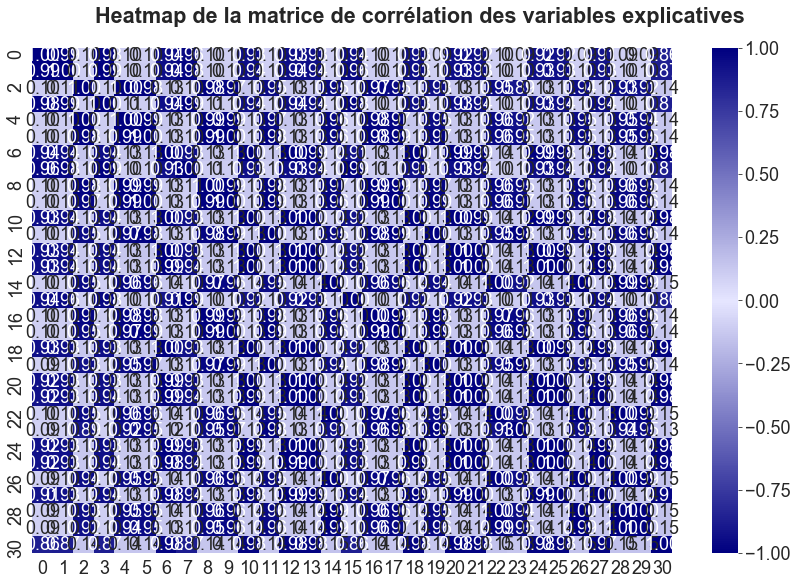

In [26]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
#mygraph.set_axe('y', tick_labels=variables, rotation=0)
#mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

La matrice de corrélation permet de regrouper toutes les données en 2 catégories, avec une forte corrélation intra-catégorie mais une faible corrélation inter-catégorie :
- catégorie 1 : toutes les variables seules, toutes les interactions par 3 variables et l'interaction des 5 variables : somme_signaux, total_5, total_10, total_15, total_20, somme_signaux:total_5:total_10, somme_signaux:total_5:total_15, somme_signaux:total_10:total_15, total_5:total_10:total_15, somme_signaux:total_5:total_20, somme_signaux:total_10:total_20, total_5:total_10:total_20, somme_signaux:total_15:total_20, total_5:total_15:total_20, total_10:total_15:total_20, somme_signaux:total_5:total_10:total_15:total_20 ;
- catégorie 2 : toutes les interactions par paire de variables et par 4 variables : somme_signaux:total_5, somme_signaux:total_10, total_5:total_10, somme_signaux:total_15, total_5:total_15, total_10:total_15, somme_signaux:total_20, total_5:total_20, total_10:total_20, total_15:total_20, somme_signaux:total_5:total_10:total_15, somme_signaux:total_5:total_10:total_20, somme_signaux:total_5:total_15:total_20, somme_signaux:total_10:total_15:total_20, total_5:total_10:total_15:total_20

In [27]:
cat2 = ["somme_signaux:total_5","somme_signaux:total_10","total_5:total_10","somme_signaux:total_15","total_5:total_15",\
        "total_10:total_15","somme_signaux:total_20","total_5:total_20","total_10:total_20","total_15:total_20",\
        "somme_signaux:total_5:total_10:total_15","somme_signaux:total_5:total_10:total_20","somme_signaux:total_5:total_15:total_20",\
        "somme_signaux:total_10:total_15:total_20","total_5:total_10:total_15:total_20"]

In [28]:
table_anova = sm.stats.anova_lm(anova, typ=3)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df  \
Intercept                                         16511.736553      1.0   
somme_signaux                                         0.026829      1.0   
total_5                                               0.118615      1.0   
somme_signaux:total_5                                70.449885      1.0   
total_10                                              0.039741      1.0   
somme_signaux:total_10                                2.554255      1.0   
total_5:total_10                                      3.921045      1.0   
somme_signaux:total_5:total_10                        0.007987      1.0   
total_15                                              0.047490      1.0   
somme_signaux:total_15                                0.057795      1.0   
total_5:total_15                                      0.118508      1.0   
somme_signaux:total_5:total_15                        0.043521      1.0   
total_10:total_15                                     0.215031      1.0   
somme_signaux:total_10:total_15                       0.017933      1.0   
total_5:total_10:total_15                             0.342858      1.0   
somme_signaux:total_5:total_10:total_15              10.131508      1.0   
total_20                                              0.014767      1.0   
somme_signaux:total_20                                0.411302      1.0   
total_5:total_20                                      0.983863      1.0   
somme_signaux:total_5:total_20                        0.062443      1.0   
total_10:total_20                                     0.113177      1.0   
somme_signaux:total_10:total_20                       0.013056      1.0   
total_5:total_10:total_20                             0.098287      1.0   
somme_signaux:total_5:total_10:total_20               3.592866      1.0   
total_15:total_20                                     3.508039      1.0   
somme_signaux:total_15:total_20                       0.006223      1.0   
total_5:total_15:total_20                             0.006160      1.0   
somme_signaux:total_5:total_15:total_20               0.387789      1.0   
total_10:total_15:total_20                            0.008468      1.0   
somme_signaux:total_10:total_15:total_20              2.043980      1.0   
total_5:total_10:total_15:total_20                   20.772067      1.0   
somme_signaux:total_5:total_10:total_15:total_20      2.572802      1.0   
Residual                                          11330.950285  71658.0   
total                                             27965.375127  71690.0   

                                                              F        PR(>F)  \
Intercept                                         104421.781772  0.000000e+00   
somme_signaux                                          0.169670  6.804061e-01   
total_5                                                0.750131  3.864377e-01   
somme_signaux:total_5                                445.531730  1.353340e-98   
total_10                                               0.251324  6.161461e-01   
somme_signaux:total_10                                16.153349  5.847485e-05   
total_5:total_10                                      24.797059  6.384220e-07   
somme_signaux:total_5:total_10                         0.050509  8.221807e-01   
total_15                                               0.300331  5.836765e-01   
somme_signaux:total_15                                 0.365500  5.454693e-01   
total_5:total_15                                       0.749453  3.866523e-01   
somme_signaux:total_5:total_15                         0.275233  5.998447e-01   
total_10:total_15                                      1.359875  2.435631e-01   
somme_signaux:total_10:total_15                        0.113412  7.362936e-01   
total_5:total_10:total_15                              2.168269  1.408891e-01   
somme_signaux:total_5:total_10:total_15               64.072614  1.216997e-15   
total_20                                             

In [29]:
table_anova.sort_values(by="omega_squared", ascending=False)

sum_sq       df  \
Intercept                                         16511.736553      1.0   
somme_signaux:total_5                                70.449885      1.0   
total_5:total_10:total_15:total_20                   20.772067      1.0   
somme_signaux:total_5:total_10:total_15              10.131508      1.0   
total_5:total_10                                      3.921045      1.0   
somme_signaux:total_5:total_10:total_20               3.592866      1.0   
total_15:total_20                                     3.508039      1.0   
somme_signaux:total_5:total_10:total_15:total_20      2.572802      1.0   
somme_signaux:total_10                                2.554255      1.0   
somme_signaux:total_10:total_15:total_20              2.043980      1.0   
total_5:total_20                                      0.983863      1.0   
somme_signaux:total_20                                0.411302      1.0   
somme_signaux:total_5:total_15:total_20               0.387789      1.0   
total_5:total_10:total_15                             0.342858      1.0   
total_10:total_15                                     0.215031      1.0   
total_5                                               0.118615      1.0   
total_5:total_15                                      0.118508      1.0   
total_10:total_20                                     0.113177      1.0   
total_5:total_10:total_20                             0.098287      1.0   
somme_signaux:total_5:total_20                        0.062443      1.0   
somme_signaux:total_15                                0.057795      1.0   
total_15                                              0.047490      1.0   
somme_signaux:total_5:total_15                        0.043521      1.0   
total_10                                              0.039741      1.0   
somme_signaux                                         0.026829      1.0   
somme_signaux:total_10:total_15                       0.017933      1.0   
total_20                                              0.014767      1.0   
somme_signaux:total_10:total_20                       0.013056      1.0   
total_10:total_15:total_20                            0.008468      1.0   
somme_signaux:total_5:total_10                        0.007987      1.0   
somme_signaux:total_15:total_20                       0.006223      1.0   
total_5:total_15:total_20                             0.006160      1.0   
Residual                                          11330.950285  71658.0   
total                                             27965.375127  71690.0   

                                                              F        PR(>F)  \
Intercept                                         104421.781772  0.000000e+00   
somme_signaux:total_5                                445.531730  1.353340e-98   
total_5:total_10:total_15:total_20                   131.364516  2.190406e-30   
somme_signaux:total_5:total_10:total_15               64.072614  1.216997e-15   
total_5:total_10                                      24.797059  6.384220e-07   
somme_signaux:total_5:total_10:total_20               22.721626  1.876154e-06   
total_15:total_20                                     22.185172  2.480417e-06   
somme_signaux:total_5:total_10:total_15:total_20      16.270640  5.496501e-05   
somme_signaux:total_10                                16.153349  5.847485e-05   
somme_signaux:total_10:total_15:total_20              12.926324  3.242109e-04   
total_5:total_20                                       6.222041  1.261919e-02   
somme_signaux:total_20                                 2.601111  1.067932e-01   
somme_signaux:total_5:total_15:total_20                2.452413  1.173488e-01   
total_5:total_10:total_15                              2.168269  1.408891e-01   
total_10:total_15                                      1.359875  2.435631e-01   
total_5                                                0.750131  3.864377e-01   
total_5:total_15                                     

Je garde somme_signaux dans la première catégorie car c'est la variable avec le plus fort omega² et la plus faible p-value. Afin d'avoir la plus grande diversification parmi les exogènes conservées, je conserve l'interaction entre total_10 et total_20. Cela me permet de garder ainsi 3 variables regroupées en 2 exogènes, avec des écarts entre les sommes uniformément répartis.

In [30]:
anova = smf.ols(formula="tendance_cluster ~ somme_signaux:total_5 + somme_signaux:total_5:total_10:total_15:total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tendance_cluster   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                 1.521e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:45   Log-Likelihood:                -37804.
No. Observations:               71690   AIC:                         7.561e+04
Df Residuals:                   71687   BIC:                         7.564e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.9250      0.002    384.508      0.000       0.920       0.930
somme_signaux:total_5                            -3.941e-06   2.26e-08   -174.388      0.000   -3.99e-06    -3.9e-06
somme_signaux:total_5:total_10:total_15:total_20  5.423e-15   2.26e-16     23.946      0.000    4.98e-15    5.87e-15
==============================================================================
Omnibus:                     3433.895   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1383.765
Skew:                          -0.022   Prob(JB):                    3.31e-301
Kurtosis:                       2.321   Cond. No.                     1.08e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Variation à 2 mois**

In [31]:
data_model = time_alea_data42[["tendance_cluster","somme_signaux","total_5","total_10","total_15","total_20"]].copy()
len(data_model)

71494

In [32]:
anova = smf.ols(formula="tendance_cluster ~ somme_signaux * total_5 * total_10 * total_15 * total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tendance_cluster   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:46   Log-Likelihood:                -47075.
No. Observations:               71494   AIC:                         9.421e+04
Df Residuals:                   71462   BIC:                         9.451e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.6762      0.004    185.710      0.000       0.669       0.683
somme_signaux                                     1.163e-05   9.84e-05      0.118      0.906      -0.000       0.000
total_5                                          -7.668e-05      0.000     -0.427      0.670      -0.000       0.000
somme_signaux:total_5                            -5.515e-07   4.91e-07     -1.123      0.261   -1.51e-06    4.11e-07
total_10                                            -0.0003      0.000     -1.766      0.077      -0.001    3.72e-05
somme_signaux:total_10                            2.529e-06   2.58e-06      0.979      0.328   -2.54e-06    7.59e-06
total_5:total_10                                 -3.201e-06    2.7e-06     -1.185      0.236    -8.5e-06    2.09e-06
somme_signaux:total_5:total_10                        8e-09   2.31e-09      3.461      0.001    3.47e-09    1.25e-08
total_15                                             0.0004      0.000      1.921      0.055   -7.64e-06       0.001
somme_signaux:total_15                           -1.219e-05   4.23e-06     -2.883      0.004   -2.05e-05    -3.9e-06
total_5:total_15                                  1.783e-05   6.16e-06      2.895      0.004    5.76e-06    2.99e-05
somme_signaux:total_5:total_15                   -2.274e-08   1.08e-08     -2.113      0.035   -4.38e-08   -1.64e-09
total_10:total_15                                -3.376e-06   2.44e-06     -1.386      0.166   -8.15e-06     1.4e-06
somme_signaux:total_10:total_15                   3.643e-08   1.92e-08      1.901      0.057   -1.13e-09     7.4e-08
total_5:total_10:total_15                        -1.893e-08   1.28e-08     -1.483      0.138   -4.39e-08    6.09e-09
somme_signaux:total_5:total_10:total_15          -5.627e-12   6.14e-12     -0.917      0.359   -1.77e-11     6.4e-12
total_20                                            -0.0006      0.000     -5.432      0.000      -0.001      -0.000
somme_signaux:total_20                            7.689e-06   2.55e-06      3.021      0.003     2.7e-06    1.27e-05
total_5:total_20                                 -1.232e-05   4.27e-06     -2.882      0.004   -2.07e-05   -3.94e-06
somme_signaux:total_5:total_20                    3.649e-08      1e-08      3.642      0.000    1.69e-08    5.61e-08
total_10:total_20                                  3.81e-06   2.55e-06      1.493      0.135   -1.19e-06    8.81e-06
somme_signaux:total_10:total_20                  -5.969e-08   2.45e-08     -2.432      0.015   -1.08e-07   -1.16e-08
total_5:total_10:total_20                          2.65e-08   1.76e-08      1.505      0.132   -8.02e-09     6.1e-08
somme_signaux:total_5:total_10:total_20  

In [33]:
table_anova = sm.stats.anova_lm(anova, typ=3)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova.sort_values(by="omega_squared", ascending=False)

sum_sq       df  \
Intercept                                          7538.996453      1.0   
somme_signaux:total_5:total_10:total_15:total_20     53.540860      1.0   
total_20                                              6.449586      1.0   
total_10:total_15:total_20                            6.379393      1.0   
somme_signaux:total_5:total_20                        2.900277      1.0   
somme_signaux:total_5:total_10                        2.618871      1.0   
somme_signaux:total_20                                1.995216      1.0   
total_5:total_15                                      1.831735      1.0   
somme_signaux:total_15                                1.816421      1.0   
total_5:total_20                                      1.815690      1.0   
somme_signaux:total_10:total_20                       1.292725      1.0   
somme_signaux:total_5:total_15                        0.975525      1.0   
total_15                                              0.806998      1.0   
somme_signaux:total_10:total_15                       0.789787      1.0   
total_5:total_15:total_20                             0.720126      1.0   
total_10                                              0.681443      1.0   
total_15:total_20                                     0.561941      1.0   
total_5:total_10:total_20                             0.494890      1.0   
total_10:total_20                                     0.487210      1.0   
total_5:total_10:total_15                             0.480784      1.0   
somme_signaux:total_15:total_20                       0.444577      1.0   
total_10:total_15                                     0.420138      1.0   
total_5:total_10                                      0.307060      1.0   
somme_signaux:total_5                                 0.275727      1.0   
somme_signaux:total_10                                0.209440      1.0   
somme_signaux:total_5:total_10:total_15               0.183667      1.0   
somme_signaux:total_5:total_10:total_20               0.182862      1.0   
somme_signaux:total_5:total_15:total_20               0.123332      1.0   
total_5:total_10:total_15:total_20                    0.108743      1.0   
somme_signaux:total_10:total_15:total_20              0.051974      1.0   
total_5                                               0.039778      1.0   
somme_signaux                                         0.003053      1.0   
Residual                                          15621.253021  71462.0   
total                                             23249.239304  71494.0   

                                                             F        PR(>F)  \
Intercept                                         34488.383473  0.000000e+00   
somme_signaux:total_5:total_10:total_15:total_20    244.931500  4.084537e-55   
total_20                                             29.504694  5.596292e-08   
total_10:total_15:total_20                           29.183587  6.604423e-08   
somme_signaux:total_5:total_20                       13.267794  2.701955e-04   
somme_signaux:total_5:total_10                       11.980460  5.379272e-04   
somme_signaux:total_20                                9.127445  2.518922e-03   
total_5:total_15                                      8.379574  3.795762e-03   
somme_signaux:total_15                                8.309518  3.944962e-03   
total_5:total_20                                      8.306174  3.952229e-03   
somme_signaux:total_10:total_20                       5.913784  1.502531e-02   
somme_signaux:total_5:total_15                        4.462701  3.464613e-02   
total_15                                              3.691743  5.468640e-02   
somme_signaux:total_10:total_15                       3.613010  5.733328e-02   
total_5:total_15:total_20                             3.294336  6.952339e-02   
total_10                                              3.117373  7.746585e-02   
total_15:total_20                                     2.570692  1.0886

In [34]:
anova = smf.ols(formula="tendance_cluster ~ somme_signaux:total_20 + somme_signaux:total_5:total_10:total_15:total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tendance_cluster   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2959.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:46   Log-Likelihood:                -47538.
No. Observations:               71494   AIC:                         9.508e+04
Df Residuals:                   71491   BIC:                         9.511e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.6834      0.003    255.603      0.000       0.678       0.689
somme_signaux:total_20                           -1.255e-06    2.6e-08    -48.168      0.000   -1.31e-06    -1.2e-06
somme_signaux:total_5:total_10:total_15:total_20  1.758e-14   2.62e-16     67.112      0.000    1.71e-14    1.81e-14
==============================================================================
Omnibus:                   428242.601   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9213.202
Skew:                          -0.456   Prob(JB):                         0.00
Kurtosis:                       1.496   Cond. No.                     1.04e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Variation à 3 mois**

In [35]:
data_model = time_alea_data64[["tendance_cluster","somme_signaux","total_5","total_10","total_15","total_20"]].copy()
len(data_model)

71252

In [36]:
anova = smf.ols(formula="tendance_cluster ~ somme_signaux * total_5 * total_10 * total_15 * total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tendance_cluster   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     248.2
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:47   Log-Likelihood:                -36133.
No. Observations:               71252   AIC:                         7.233e+04
Df Residuals:                   71220   BIC:                         7.262e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.7370      0.003    235.316      0.000       0.731       0.743
somme_signaux                                        0.0002   8.64e-05      2.806      0.005     7.3e-05       0.000
total_5                                           9.185e-05      0.000      0.582      0.561      -0.000       0.000
somme_signaux:total_5                            -1.204e-06   4.47e-07     -2.697      0.007   -2.08e-06   -3.29e-07
total_10                                            -0.0003      0.000     -1.621      0.105      -0.001    5.68e-05
somme_signaux:total_10                            4.679e-06   2.28e-06      2.056      0.040    2.19e-07    9.14e-06
total_5:total_10                                 -3.595e-06   2.34e-06     -1.534      0.125   -8.19e-06    9.97e-07
somme_signaux:total_5:total_10                    1.997e-09   1.84e-09      1.087      0.277    -1.6e-09     5.6e-09
total_15                                             0.0001      0.000      0.726      0.468      -0.000       0.000
somme_signaux:total_15                           -6.645e-07   3.65e-06     -0.182      0.856   -7.83e-06     6.5e-06
total_5:total_15                                  5.187e-06   5.32e-06      0.974      0.330   -5.25e-06    1.56e-05
somme_signaux:total_5:total_15                    -4.96e-09   9.14e-09     -0.542      0.588   -2.29e-08     1.3e-08
total_10:total_15                                 7.106e-08   2.14e-06      0.033      0.973   -4.11e-06    4.26e-06
somme_signaux:total_10:total_15                   1.779e-08   1.65e-08      1.079      0.281   -1.45e-08    5.01e-08
total_5:total_10:total_15                         -1.71e-08   1.09e-08     -1.571      0.116   -3.84e-08    4.24e-09
somme_signaux:total_5:total_10:total_15          -3.218e-11   5.45e-12     -5.904      0.000   -4.29e-11   -2.15e-11
total_20                                             0.0002   9.05e-05      1.730      0.084   -2.08e-05       0.000
somme_signaux:total_20                           -5.107e-06    2.2e-06     -2.319      0.020   -9.42e-06    -7.9e-07
total_5:total_20                                  4.449e-07   3.71e-06      0.120      0.905   -6.83e-06    7.72e-06
somme_signaux:total_5:total_20                   -3.675e-09   8.59e-09     -0.428      0.669   -2.05e-08    1.32e-08
total_10:total_20                                 2.163e-06   2.21e-06      0.977      0.329   -2.18e-06     6.5e-06
somme_signaux:total_10:total_20                   -2.51e-08    2.1e-08     -1.193      0.233   -6.63e-08    1.61e-08
total_5:total_10:total_20                         3.282e-08   1.52e-08      2.155      0.031    2.97e-09    6.27e-08
somme_signaux:total_5:total_10:total_20  

### 3.6.2. Appartenance au top_cluster

**Variation à 1 mois**

In [37]:
data_model = time_alea_data21[["top_cluster","somme_signaux","total_5","total_10","total_15","total_20"]].copy()
len(data_model)

71690

In [38]:
anova = smf.ols(formula="top_cluster ~ somme_signaux * total_5 * total_10 * total_15 * total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            top_cluster   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     209.9
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:47   Log-Likelihood:                 4773.0
No. Observations:               71690   AIC:                            -9482.
Df Residuals:                   71658   BIC:                            -9188.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.0115      0.002      6.541      0.000       0.008       0.015
somme_signaux                                        0.0002   4.69e-05      3.956      0.000    9.36e-05       0.000
total_5                                              0.0001   8.62e-05      1.192      0.233   -6.62e-05       0.000
somme_signaux:total_5                              9.73e-07   2.43e-07      4.006      0.000    4.97e-07    1.45e-06
total_10                                         -3.807e-05   9.29e-05     -0.410      0.682      -0.000       0.000
somme_signaux:total_10                            3.865e-07    1.2e-06      0.322      0.747   -1.96e-06    2.74e-06
total_5:total_10                                 -7.538e-07   1.23e-06     -0.615      0.539   -3.16e-06    1.65e-06
somme_signaux:total_5:total_10                   -2.648e-10   9.43e-10     -0.281      0.779   -2.11e-09    1.58e-09
total_15                                          -2.79e-06    9.6e-05     -0.029      0.977      -0.000       0.000
somme_signaux:total_15                            1.545e-06   1.96e-06      0.786      0.432   -2.31e-06    5.39e-06
total_5:total_15                                  -2.11e-06   2.87e-06     -0.735      0.462   -7.74e-06    3.52e-06
somme_signaux:total_5:total_15                    2.628e-10   4.85e-09      0.054      0.957   -9.25e-09    9.77e-09
total_10:total_15                                 7.904e-07   1.17e-06      0.674      0.500   -1.51e-06    3.09e-06
somme_signaux:total_10:total_15                  -2.555e-09   8.93e-09     -0.286      0.775   -2.01e-08     1.5e-08
total_5:total_10:total_15                         3.297e-09   5.96e-09      0.553      0.580   -8.39e-09     1.5e-08
somme_signaux:total_5:total_10:total_15          -3.609e-13   3.13e-12     -0.115      0.908   -6.49e-12    5.77e-12
total_20                                         -1.033e-05      5e-05     -0.207      0.836      -0.000    8.76e-05
somme_signaux:total_20                           -9.611e-07   1.21e-06     -0.796      0.426   -3.33e-06    1.41e-06
total_5:total_20                                   1.69e-06   2.03e-06      0.831      0.406    -2.3e-06    5.68e-06
somme_signaux:total_5:total_20                    2.292e-09   4.63e-09      0.495      0.621   -6.78e-09    1.14e-08
total_10:total_20                                -8.464e-07   1.22e-06     -0.695      0.487   -3.23e-06    1.54e-06
somme_signaux:total_10:total_20                  -4.866e-09   1.13e-08     -0.429      0.668   -2.71e-08    1.73e-08
total_5:total_10:total_20                        -2.662e-10   8.23e-09     -0.032      0.974   -1.64e-08    1.59e-08
somme_signaux:total_5:total_10:total_20  

In [39]:
table_anova = sm.stats.anova_lm(anova, typ=3)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova.sort_values(by="omega_squared", ascending=False)

sum_sq       df  \
Intercept                                            2.193905      1.0   
total_5:total_10:total_15:total_20                   1.132993      1.0   
somme_signaux:total_5                                0.822921      1.0   
somme_signaux                                        0.802228      1.0   
somme_signaux:total_5:total_10:total_15:total_20     0.433284      1.0   
total_10:total_15:total_20                           0.255770      1.0   
somme_signaux:total_5:total_10:total_20              0.089154      1.0   
somme_signaux:total_10:total_15:total_20             0.073696      1.0   
total_5                                              0.072845      1.0   
total_5:total_15:total_20                            0.048153      1.0   
total_5:total_20                                     0.035382      1.0   
somme_signaux:total_20                               0.032492      1.0   
somme_signaux:total_15:total_20                      0.032425      1.0   
somme_signaux:total_15                               0.031707      1.0   
total_5:total_15                                     0.027682      1.0   
total_10:total_20                                    0.024775      1.0   
total_10:total_15                                    0.023316      1.0   
total_5:total_10                                     0.019390      1.0   
total_5:total_10:total_15                            0.015675      1.0   
somme_signaux:total_5:total_20                       0.012564      1.0   
somme_signaux:total_10:total_20                      0.009454      1.0   
total_10                                             0.008611      1.0   
somme_signaux:total_10                               0.005326      1.0   
somme_signaux:total_10:total_15                      0.004197      1.0   
somme_signaux:total_5:total_10                       0.004037      1.0   
total_20                                             0.002192      1.0   
total_15:total_20                                    0.000971      1.0   
somme_signaux:total_5:total_10:total_15              0.000683      1.0   
somme_signaux:total_5:total_15                       0.000150      1.0   
somme_signaux:total_5:total_15:total_20              0.000131      1.0   
total_5:total_10:total_20                            0.000054      1.0   
total_15                                             0.000043      1.0   
Residual                                          3674.130001  71658.0   
total                                             3680.346206  71690.0   

                                                          F        PR(>F)  \
Intercept                                         42.788599  6.139534e-11   
total_5:total_10:total_15:total_20                22.097213  2.596670e-06   
somme_signaux:total_5                             16.049744  6.176222e-05   
somme_signaux                                     15.646167  7.644060e-05   
somme_signaux:total_5:total_10:total_15:total_20   8.450515  3.650519e-03   
total_10:total_15:total_20                         4.988388  2.552105e-02   
somme_signaux:total_5:total_10:total_20            1.738812  1.872936e-01   
somme_signaux:total_10:total_15:total_20           1.437314  2.305785e-01   
total_5                                            1.420715  2.332896e-01   
total_5:total_15:total_20                          0.939157  3.324981e-01   
total_5:total_20                                   0.690078  4.061406e-01   
somme_signaux:total_20                             0.633698  4.260049e-01   
somme_signaux:total_15:total_20                    0.632391  4.264821e-01   
somme_signaux:total_15                             0.618386  4.316501e-01   
total_5:total_15                                   0.539891  4.624802e-01   
total_10:total_20                                  0.483195  4.869810e-01   
total_10:total_15                                  0.454746  5.000920e-01   
total_5:total_10                                   0.378162  5.385903e-01   
t

In [40]:
anova = smf.ols(formula="top_cluster ~ somme_signaux + total_5:total_10:total_15:total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            top_cluster   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3017.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:47   Log-Likelihood:                 4554.1
No. Observations:               71690   AIC:                            -9102.
Df Residuals:                   71687   BIC:                            -9075.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.0296      0.001     25.939      0.000       0.027       0.032
somme_signaux                          0.0002   2.98e-06     69.380      0.000       0.000       0.000
total_5:total_10:total_15:total_20  1.916e-12   6.77e-14     28.315      0.000    1.78e-12    2.05e-12
==============================================================================
Omnibus:                    47256.725   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           420174.965
Skew:                           3.257   Prob(JB):                         0.00
Kurtosis:                      12.911   Cond. No.                     2.27e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Variation à 2 mois**

In [41]:
data_model = time_alea_data42[["top_cluster","somme_signaux","total_5","total_10","total_15","total_20"]].copy()
len(data_model)

71494

In [42]:
anova = smf.ols(formula="top_cluster ~ somme_signaux * total_5 * total_10 * total_15 * total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            top_cluster   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     88.50
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:48   Log-Likelihood:                 5079.7
No. Observations:               71494   AIC:                        -1.010e+04
Df Residuals:                   71462   BIC:                            -9802.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.0560      0.002     31.907      0.000       0.053       0.059
somme_signaux                                        0.0004   4.74e-05      7.673      0.000       0.000       0.000
total_5                                           1.479e-05   8.67e-05      0.171      0.864      -0.000       0.000
somme_signaux:total_5                             1.655e-07   2.37e-07      0.699      0.484   -2.99e-07     6.3e-07
total_10                                         -5.897e-05   9.22e-05     -0.640      0.522      -0.000       0.000
somme_signaux:total_10                           -1.918e-06   1.25e-06     -1.540      0.124   -4.36e-06    5.24e-07
total_5:total_10                                  1.972e-06    1.3e-06      1.514      0.130   -5.81e-07    4.52e-06
somme_signaux:total_5:total_10                   -5.319e-10   1.11e-09     -0.477      0.633   -2.72e-09    1.65e-09
total_15                                           1.12e-05   9.54e-05      0.117      0.907      -0.000       0.000
somme_signaux:total_15                            7.249e-06   2.04e-06      3.557      0.000    3.25e-06    1.12e-05
total_5:total_15                                 -9.748e-06   2.97e-06     -3.283      0.001   -1.56e-05   -3.93e-06
somme_signaux:total_5:total_15                     -7.1e-09   5.19e-09     -1.368      0.171   -1.73e-08    3.07e-09
total_10:total_15                                 1.127e-06   1.17e-06      0.960      0.337   -1.17e-06    3.43e-06
somme_signaux:total_10:total_15                   1.723e-08   9.24e-09      1.865      0.062   -8.77e-10    3.53e-08
total_5:total_10:total_15                        -1.112e-08   6.15e-09     -1.807      0.071   -2.32e-08     9.4e-10
somme_signaux:total_5:total_10:total_15           9.331e-12   2.96e-12      3.152      0.002    3.53e-12    1.51e-11
total_20                                          5.522e-05   4.97e-05      1.112      0.266   -4.21e-05       0.000
somme_signaux:total_20                           -3.633e-06   1.23e-06     -2.960      0.003   -6.04e-06   -1.23e-06
total_5:total_20                                  5.965e-06   2.06e-06      2.894      0.004    1.93e-06       1e-05
somme_signaux:total_5:total_20                    8.145e-09   4.83e-09      1.686      0.092   -1.32e-09    1.76e-08
total_10:total_20                                -2.197e-06   1.23e-06     -1.785      0.074   -4.61e-06    2.15e-07
somme_signaux:total_10:total_20                  -2.735e-08   1.18e-08     -2.311      0.021   -5.05e-08   -4.15e-09
total_5:total_10:total_20                          1.66e-08   8.49e-09      1.955      0.051   -3.98e-11    3.32e-08
somme_signaux:total_5:total_10:total_20  

### 3.6.3. Estimation de la somme des signaux à partir des sommes de signaux passées

**Avec les données de l'échantillon basé sur la variation à 1 mois**

In [43]:
data_model = signed_data21[["somme_signaux","total_5","total_10","total_15","total_20"]].copy()
len(data_model)

71690

In [44]:
anova = smf.ols(formula="somme_signaux ~  total_5 * total_10 * total_15 * total_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.411e+05
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:48   Log-Likelihood:            -3.3324e+05
No. Observations:               71690   AIC:                         6.665e+05
Df Residuals:                   71674   BIC:                         6.667e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.9724      0.190     10.405      0.000       1.601       2.344
total_5                                1.4602      0.005    285.873      0.000       1.450       1.470
total_10                              -0.3371      0.009    -39.025      0.000      -0.354      -0.320
total_5:total_10                      -0.0002   2.33e-05     -7.031      0.000      -0.000      -0.000
total_15                              -0.1114      0.009    -12.742      0.000      -0.129      -0.094
total_5:total_15                    9.947e-05      0.000      0.991      0.322   -9.73e-05       0.000
total_10:total_15                   9.651e-05   9.29e-05      1.038      0.299   -8.56e-05       0.000
total_5:total_10:total_15          -2.365e-07   7.81e-08     -3.026      0.002    -3.9e-07   -8.33e-08
total_20                              -0.0239      0.005     -4.634      0.000      -0.034      -0.014
total_5:total_20                    3.579e-05   8.69e-05      0.412      0.681      -0.000       0.000
total_10:total_20                   -1.77e-06      0.000     -0.017      0.986      -0.000       0.000
total_5:total_10:total_20           7.969e-07    1.4e-07      5.693      0.000    5.23e-07    1.07e-06
total_15:total_20                  -8.064e-05   2.29e-05     -3.526      0.000      -0.000   -3.58e-05
total_5:total_15:total_20           2.876e-08   1.32e-07      0.218      0.828    -2.3e-07    2.88e-07
total_10:total_15:total_20         -5.835e-07   6.36e-08     -9.169      0.000   -7.08e-07   -4.59e-07
total_5:total_10:total_15:total_20  4.875e-11   3.15e-11      1.545      0.122   -1.31e-11    1.11e-10
==============================================================================
Omnibus:                    15051.230   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           618824.443
Skew:                           0.030   Prob(JB):                         0.00
Kurtosis:                      17.393   Cond. No.                     3.39e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

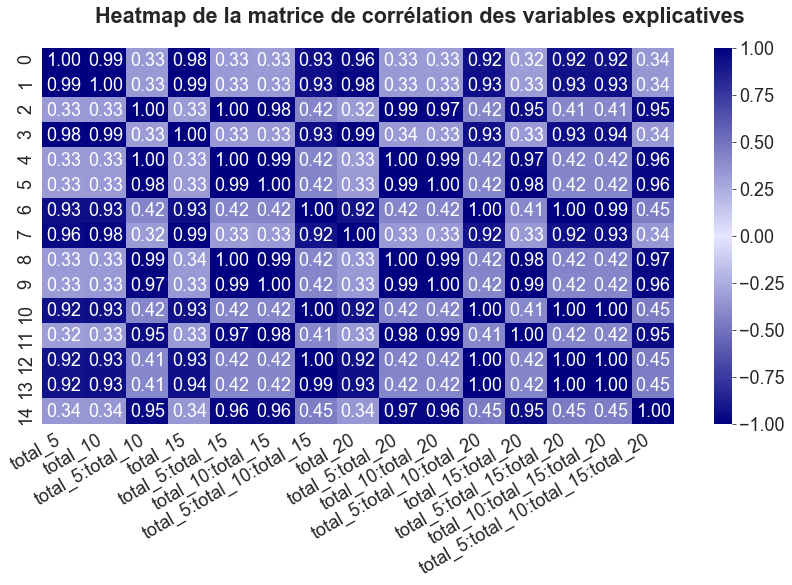

In [45]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
#mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [46]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova.sort_values(by="omega_squared", ascending=False)

sum_sq       df              F  \
total_5                             1.001300e+08      1.0  156820.724949   
total_10                            1.785823e+06      1.0    2796.906587   
total_15                            2.681647e+05      1.0     419.991993   
total_10:total_15:total_20          5.310787e+04      1.0      83.176058   
total_5:total_10                    2.754052e+04      1.0      43.133186   
total_5:total_10:total_20           2.068365e+04      1.0      32.394161   
total_15:total_20                   1.349776e+04      1.0      21.139806   
total_20                            5.842505e+03      1.0       9.150368   
total_5:total_10:total_15           5.681138e+03      1.0       8.897640   
total_5:total_10:total_15:total_20  1.524748e+03      1.0       2.388018   
total_5:total_15                    6.478523e+02      1.0       1.014648   
total_10:total_15                   2.071497e+02      1.0       0.324432   
total_5:total_20                    1.662368e+02      1.0       0.260355   
total_10:total_20                   1.448216e+02      1.0       0.226816   
total_5:total_15:total_20           2.512323e+01      1.0       0.039347   
Residual                            4.576381e+07  71674.0            NaN   
total                               1.480768e+08  71689.0            NaN   

                                          PR(>F)   eta_squared  omega_squared  
total_5                             0.000000e+00  6.762027e-01       0.676179  
total_10                            0.000000e+00  1.206011e-02       0.012046  
total_15                            4.535468e-93  1.810983e-03       0.001797  
total_10:total_15:total_20          7.693761e-20  3.586508e-04       0.000345  
total_5:total_10                    5.148560e-11  1.859880e-04       0.000172  
total_5:total_10:total_20           1.263537e-08  1.396819e-04       0.000126  
total_15:total_20                   4.276943e-06  9.115373e-05       0.000077  
total_20                            2.487561e-03  3.945591e-05       0.000026  
total_5:total_10:total_15           2.856356e-03  3.836616e-05       0.000024  
total_5:total_10:total_15:total_20  1.222730e-01  1.029701e-05      -0.000004  
total_5:total_15                    3.137953e-01  4.375109e-06      -0.000010  
total_10:total_15                   5.689580e-01  1.398934e-06      -0.000013  
total_5:total_20                    6.098777e-01  1.122639e-06      -0.000013  
total_10:total_20                   6.338966e-01  9.780168e-07      -0.000013  
total_5:total_15:total_20           8.427628e-01  1.696635e-07      -0.000014  
Residual                                     NaN           NaN            NaN  
total                                        NaN           NaN            NaN

In [47]:
anova = smf.ols(formula="somme_signaux ~  total_5 + total_5:total_10", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.537e+06
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:28:50   Log-Likelihood:            -3.4989e+05
No. Observations:               71690   AIC:                         6.998e+05
Df Residuals:                   71687   BIC:                         6.998e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2116      0.187      6.483      0.000       0.845       1.578
total_5              0.9942      0.000   2126.876      0.000       0.993       0.995
total_5:total_10  -8.94e-06   1.84e-06     -4.846      0.000   -1.26e-05   -5.32e-06
==============================================================================
Omnibus:                    10981.601   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195702.805
Skew:                          -0.021   Prob(JB):                         0.00
Kurtosis:                      11.094   Cond. No.                     1.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

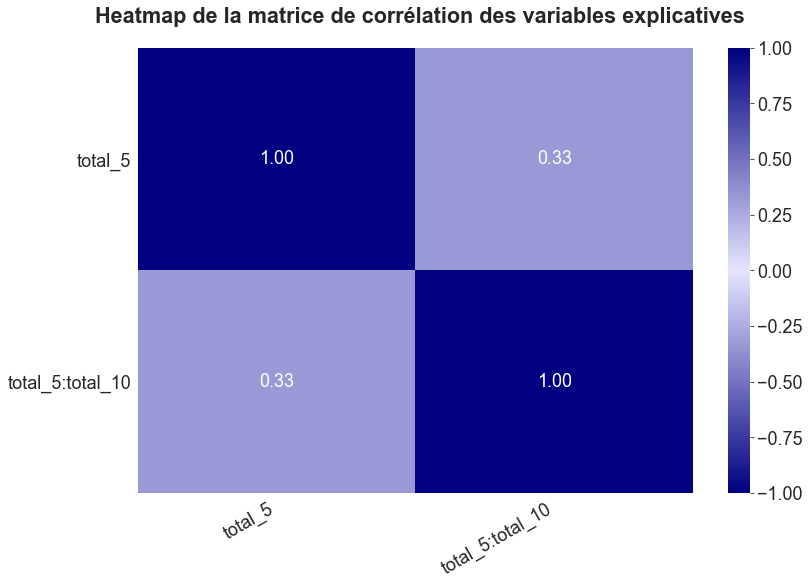

In [48]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [49]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
total_5           1.123562
total_5:total_10  1.123562

In [50]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df             F    PR(>F)  eta_squared  \
total_5           5.155007e+09      1.0  5.074873e+06  0.000000     0.986066   
total_5:total_10  2.385362e+04      1.0  2.348282e+01  0.000001     0.000005   
Residual          7.281897e+07  71687.0           NaN       NaN          NaN   
total             5.227850e+09  71689.0           NaN       NaN          NaN   

                  omega_squared  
total_5                0.986039  
total_5:total_10      -0.000009  
Residual                    NaN  
total                       NaN

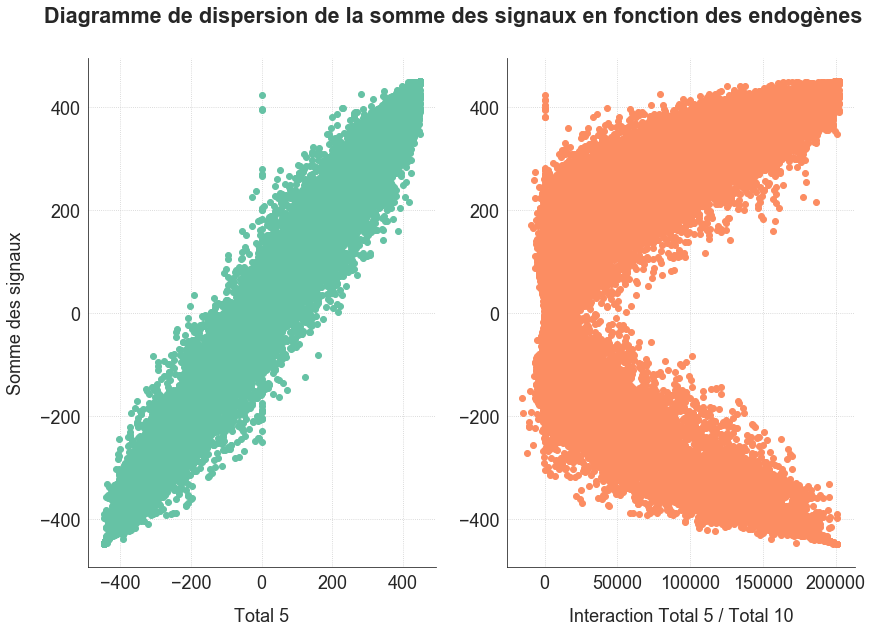

In [56]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["total_5:total_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

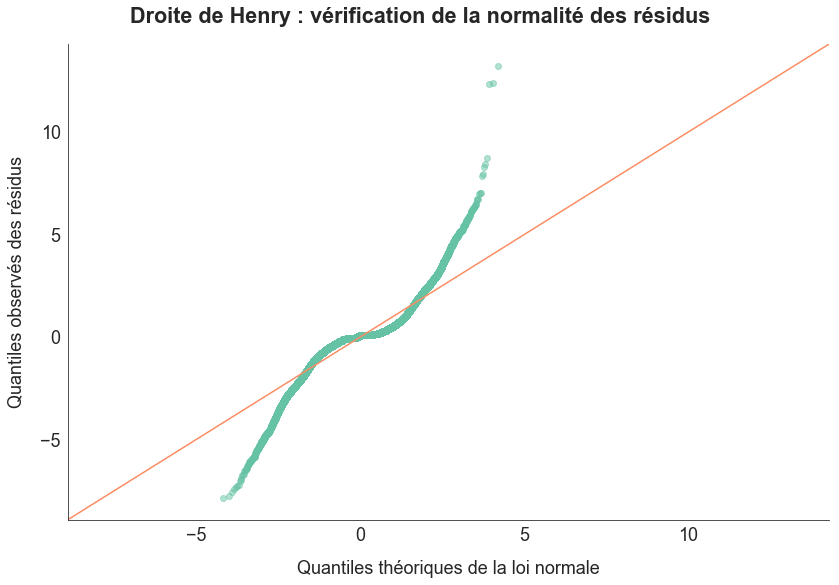

In [51]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

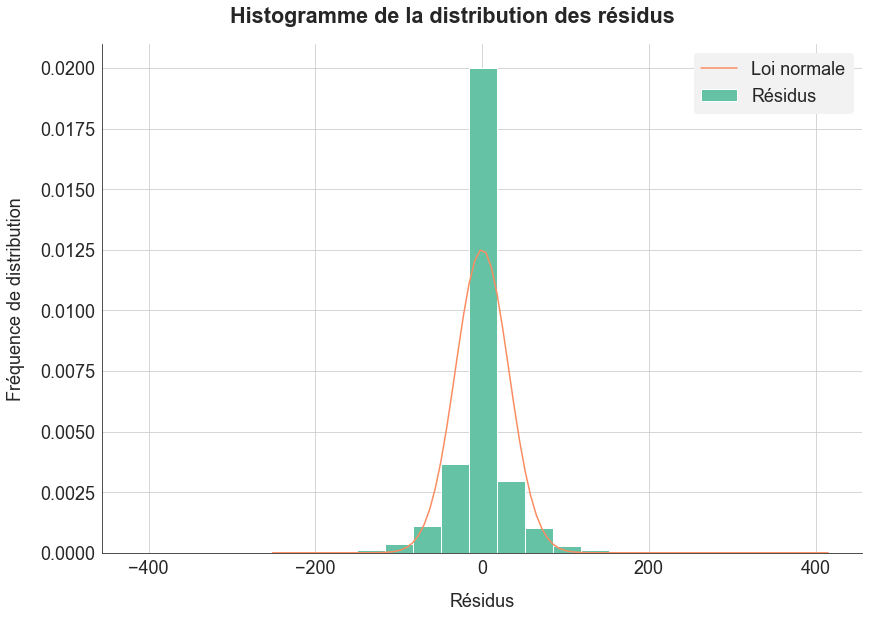

In [52]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova04_01_distribution_residus.png")
plt.show()

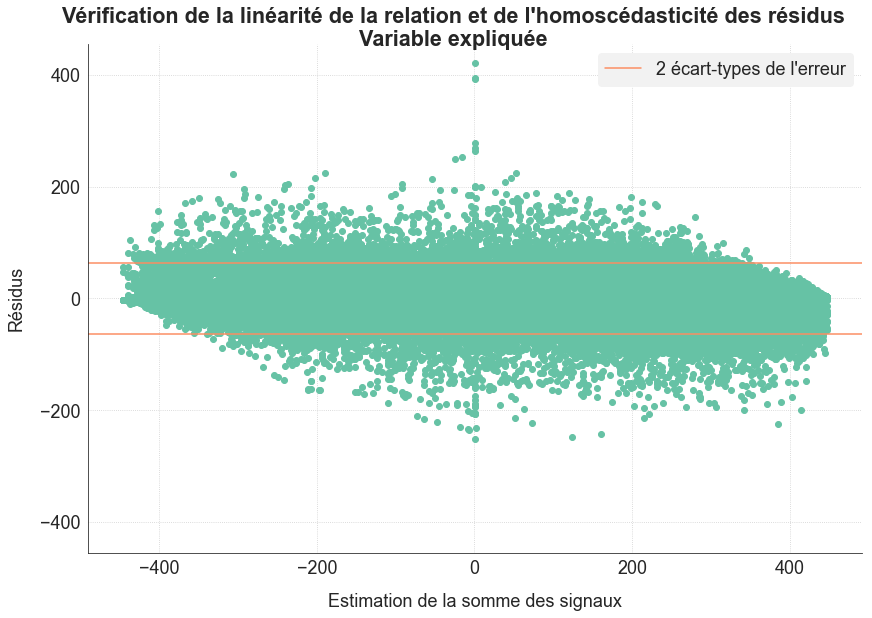

In [59]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

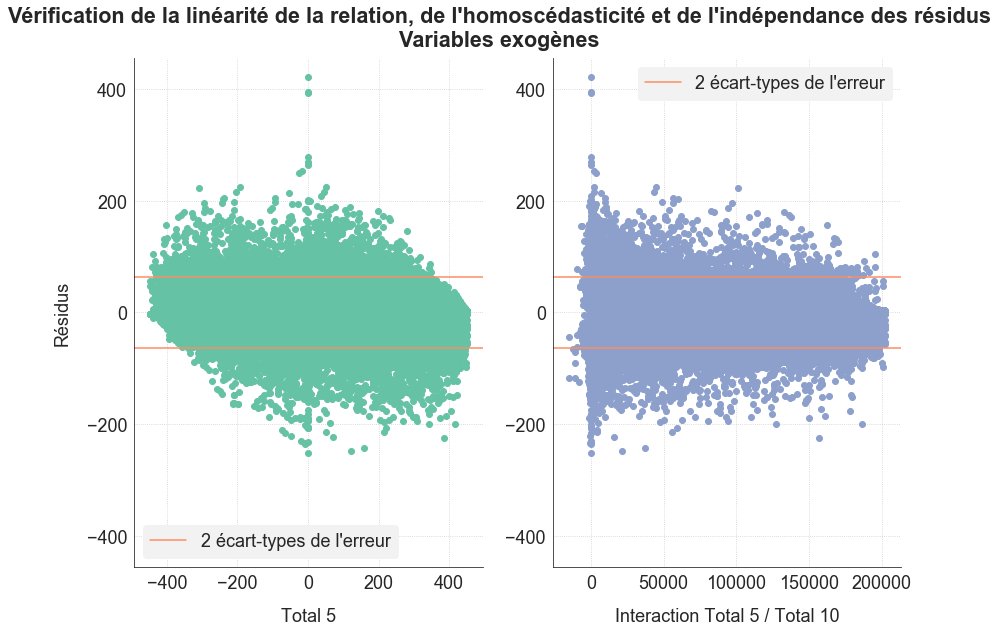

In [60]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["total_5:total_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

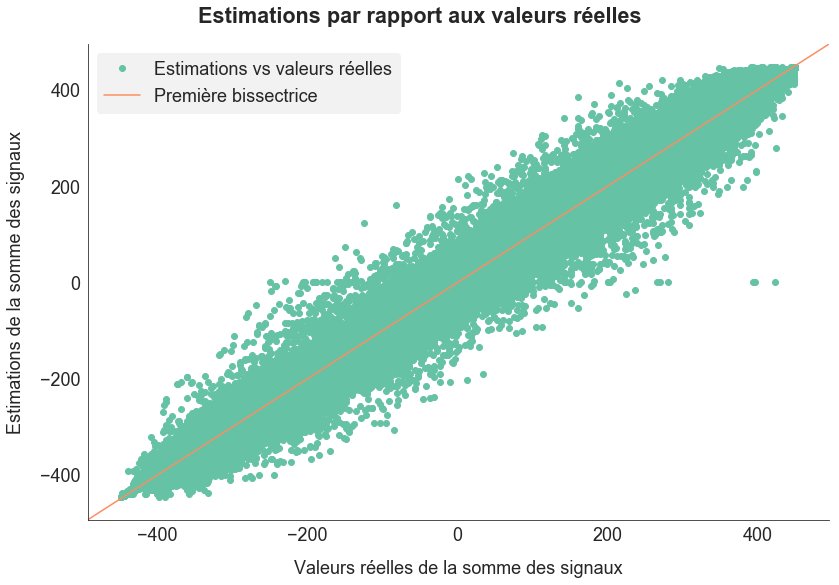

In [62]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [64]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [65]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [67]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (296 sur 71690)


observation_name    levier  outlier  cook_distance  influence
163                 163  0.000138     True       0.000197       True
175                 175  0.000092     True       0.000680       True
356                 358  0.000091     True       0.000093       True
408                 410  0.000091     True       0.000154       True
588                 590  0.000116     True       0.000171       True
590                 592  0.000138     True       0.000304       True
754                 757  0.000090     True       0.000276       True
1241               1244  0.000085     True       0.000136       True
1357               1360  0.000145     True       0.000096       True
1473               1476  0.000093     True       0.000145       True
1521               1524  0.000128     True       0.000205       True
1970               1975  0.000102     True       0.000194       True
2108               2113  0.000103     True       0.000190       True
2302               2307  0.000117     True       0.000129       True
2415               2420  0.000096     True       0.000620       True
2642               2647  0.000103     True       0.000098       True
2653               2658  0.000111     True       0.000228       True
2687               2692  0.000095     True       0.000066       True
2889               2894  0.000113     True       0.000207       True
3252               3258  0.000112     True       0.000081       True
3292               3298  0.000085     True       0.000263       True
3796               3804  0.000113     True       0.000899       True
4074               4082  0.000112     True       0.000258       True
4206               4214  0.000112     True       0.000115       True
4216               4224  0.000090     True       0.000136       True
4564               4573  0.000100     True       0.000200       True
4816               4825  0.000145     True       0.000065       True
4934               4943  0.000099     True       0.000183       True
5214               5224  0.000125     True       0.000256       True
5222               5232  0.000103     True       0.000215       True
...                 ...       ...      ...            ...        ...
63549             63731  0.000090     True       0.000096       True
63603             63785  0.000090     True       0.000188       True
63989             64171  0.000095     True       0.000108       True
64885             65070  0.000084     True       0.000305       True
64953             65138  0.000087     True       0.000063       True
65051             65236  0.000091     True       0.000210       True
65154             65339  0.000148     True       0.000251       True
65289             65474  0.000147     True       0.000093       True
65564             65751  0.000086     True       0.000530       True
66243             66433  0.000133     True       0.000141       True
66312             66502  0.000111     True       0.000080       True
66596             66786  0.000100     True       0.000214       True
66732             66922  0.000125     True       0.000158       True
67007             67197  0.000099     True       0.000081       True
67275             67466  0.000087     True       0.000309       True
68782             68975  0.000085     True       0.000122       True
69525             69720  0.000121     True       0.000070       True
70027             70223  0.000086     True       0.000088       True
70084             70280  0.000123     True       0.000117       True
70116             70312  0.000097     True       0.000220       True
70132             70328  0.000131     True       0.000217       True
70211             70407  0.000114     True       0.000154       True
70430             70627  0.000120     True       0.000623       True
70437             70634  0.000134     True       0.000077       True
70893             71091  0.000136     True       0.000071       True
70953             71152  0.000107     True       0.000059       True
71025

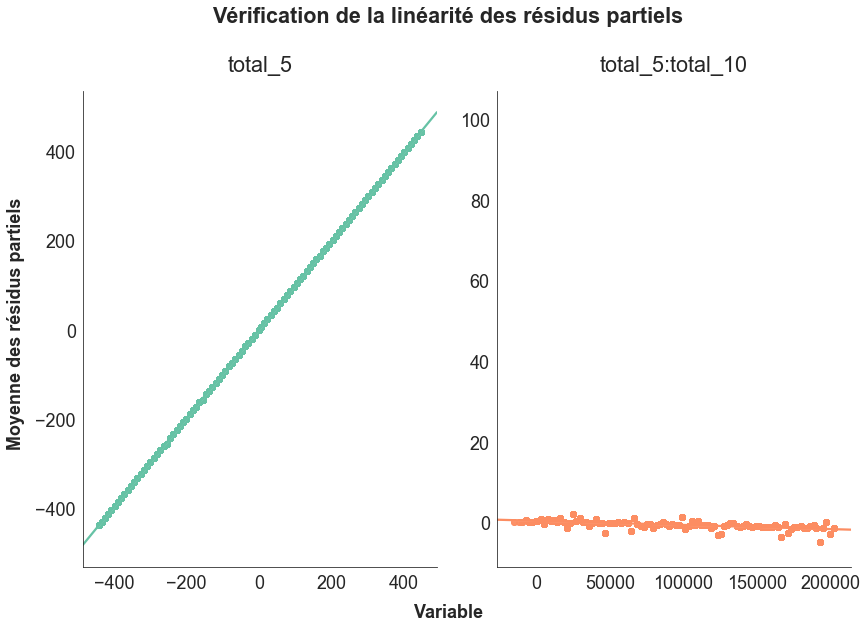

In [68]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=1, nbcol=2, is_mono=False)
cpt = 0
for variable in ["total_5","total_5:total_10"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

J'essaie d'améliorer la normalité des résidus en utilisant la fonction cube sur les exogènes, du fait de la forme de la courbe de la Droite de Henry.

In [181]:
data_model = signed_data21[["somme_signaux","total_5","total_10","total_15","total_20"]].copy()
data_model["cube_total_5"] = np.power(data_model.total_5, 3)
data_model["cube_total_10"] = np.power(data_model.total_10, 3)
data_model["cube_total_15"] = np.power(data_model.total_15, 3)
data_model["cube_total_20"] = np.power(data_model.total_20, 3)
len(data_model)

71690

In [182]:
anova = smf.ols(formula="somme_signaux ~ cube_total_5 + cube_total_5:cube_total_10", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 4.858e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:13:16   Log-Likelihood:            -4.2956e+05
No. Observations:               71690   AIC:                         8.591e+05
Df Residuals:                   71688   BIC:                         8.591e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.713e-15   2.62e-18    654.728      0.000    1.71e-15    1.72e-15
cube_total_5                6.656e-06   1.02e-08    654.728      0.000    6.64e-06    6.68e-06
cube_total_5:cube_total_10 -7.473e-15   1.47e-16    -50.666      0.000   -7.76e-15   -7.18e-15
==============================================================================
Omnibus:                     3211.191   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1412.543
Skew:                          -0.100   Prob(JB):                    1.86e-307
Kurtosis:                       2.342   Cond. No.                     3.71e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

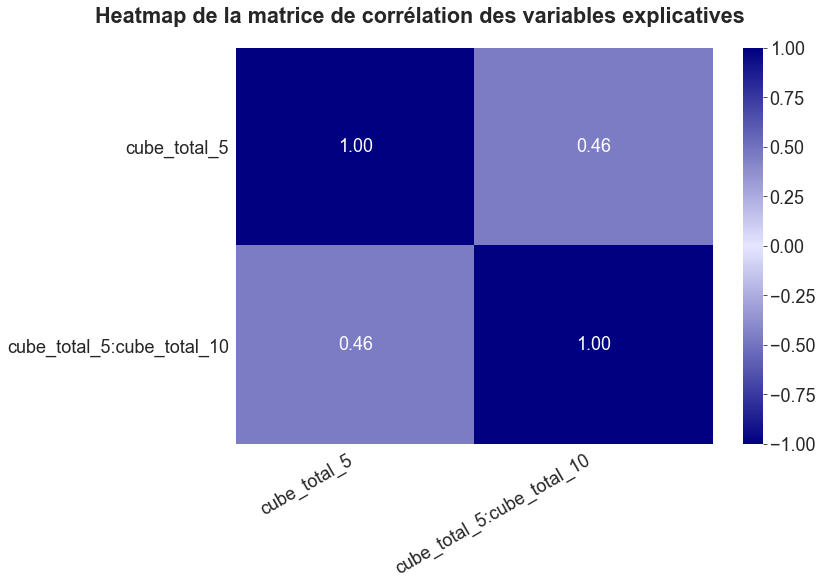

In [183]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [184]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
cube_total_5                1.262772
cube_total_5:cube_total_10  1.262942

In [185]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df              F  PR(>F)  \
cube_total_5                5.277112e+09      1.0  562742.418281     0.0   
cube_total_5:cube_total_10  2.407268e+07      1.0    2567.070882     0.0   
Residual                    6.722536e+08  71688.0            NaN     NaN   
total                       5.973438e+09  71690.0            NaN     NaN   

                            eta_squared  omega_squared  
cube_total_5                    0.88343       0.883403  
cube_total_5:cube_total_10      0.00403       0.004016  
Residual                            NaN            NaN  
total                               NaN            NaN

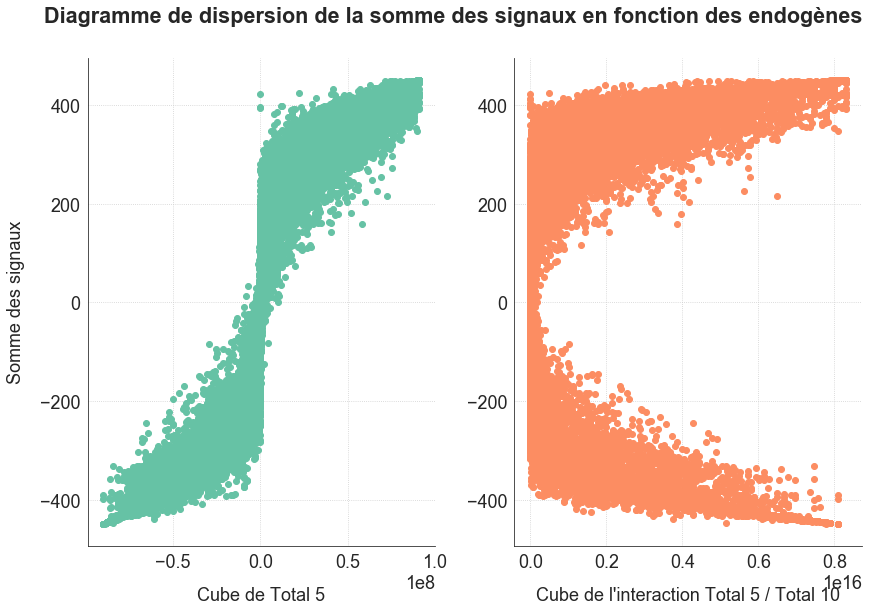

In [186]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["cube_total_5:cube_total_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Cube de l'interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

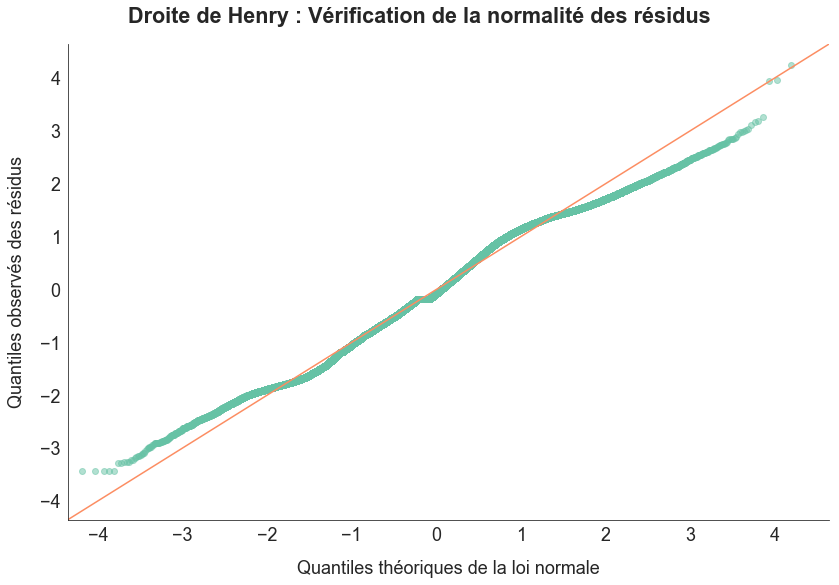

In [187]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

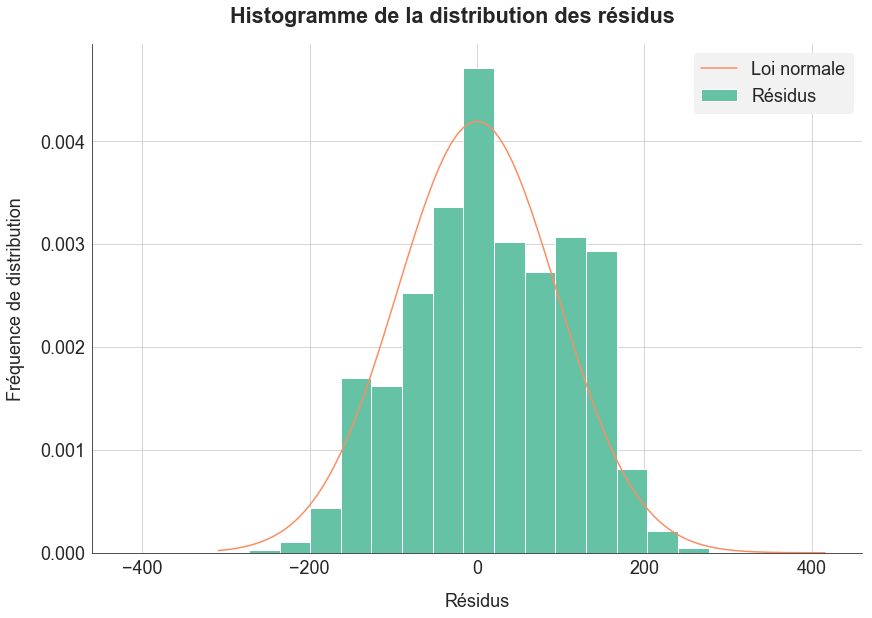

In [188]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova04_01_distribution_residus.png")
plt.show()

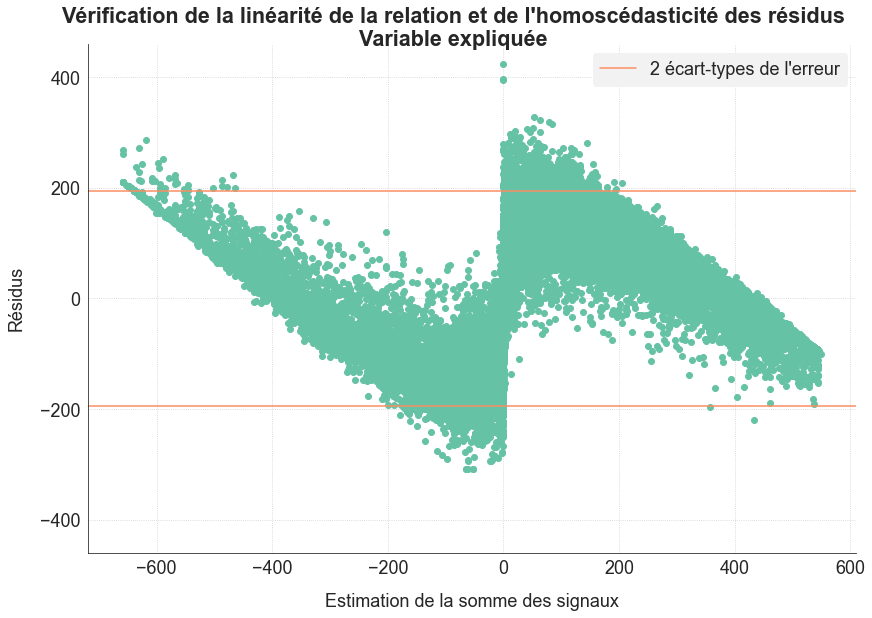

In [189]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

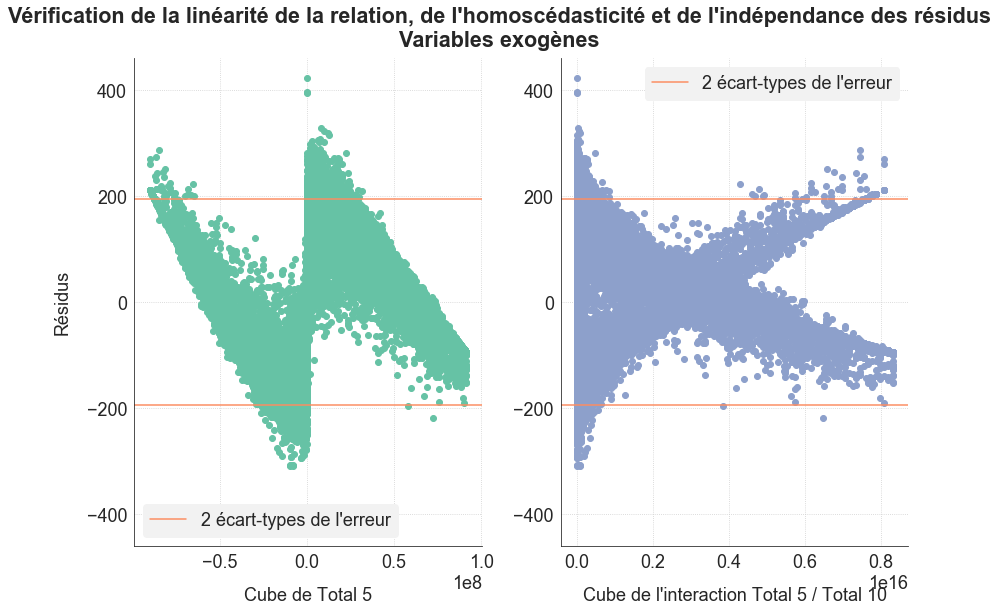

In [190]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["cube_total_5:cube_total_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Cube de l'interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

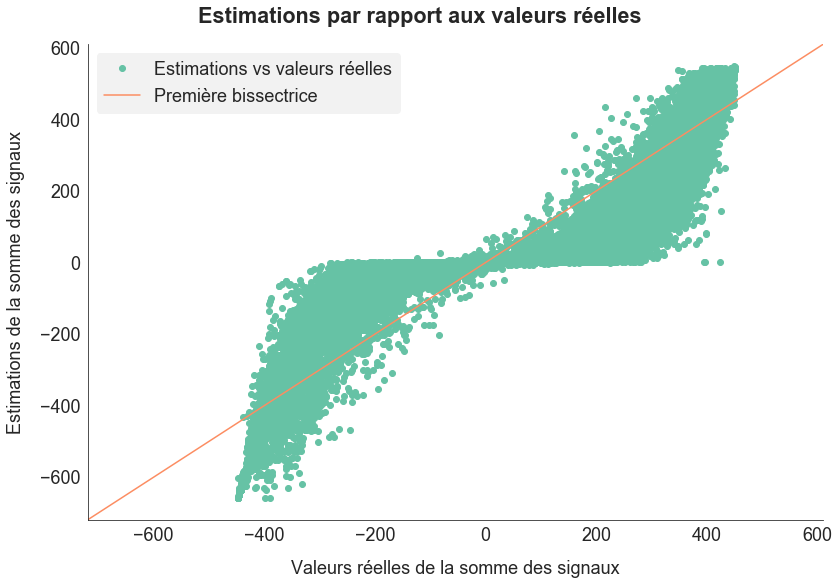

In [191]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [192]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [193]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [194]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (1953 sur 71690)


observation_name    levier  outlier  cook_distance  influence
6                     6  0.000243     True       0.000171       True
55                   55  0.000230     True       0.000145       True
67                   67  0.000197     True       0.000087       True
75                   75  0.000230     True       0.000148       True
76                   76  0.000215     True       0.000117       True
81                   81  0.000202     True       0.000092       True
163                 163  0.000240     True       0.000368       True
193                 193  0.000240     True       0.000167       True
214                 214  0.000181     True       0.000063       True
230                 230  0.000215     True       0.000117       True
305                 306  0.000206     True       0.000101       True
315                 317  0.000235     True       0.000161       True
339                 341  0.000243     True       0.000174       True
354                 356  0.000235     True       0.000153       True
376                 378  0.000202     True       0.000093       True
397                 399  0.000251     True       0.000188       True
404                 406  0.000271     True       0.000246       True
411                 413  0.000197     True       0.000130       True
432                 434  0.000215     True       0.000122       True
444                 446  0.000215     True       0.000117       True
472                 474  0.000338     True       0.000461       True
588                 590  0.000148     True       0.000089       True
590                 592  0.000240     True       0.000427       True
767                 770  0.000208     True       0.000163       True
782                 785  0.000285     True       0.000283       True
801                 804  0.000197     True       0.000087       True
834                 837  0.000262     True       0.000218       True
839                 842  0.000193     True       0.000080       True
899                 902  0.000173     True       0.000058       True
915                 918  0.000231     True       0.000155       True
...                 ...       ...      ...            ...        ...
70633             70830  0.000178     True       0.000058       True
70641             70838  0.000273     True       0.000246       True
70737             70935  0.000235     True       0.000220       True
70780             70978  0.000181     True       0.000063       True
70893             71091  0.000229     True       0.000194       True
70921             71119  0.000185     True       0.000068       True
70971             71170  0.000244     True       0.000225       True
70992             71191  0.000152     True       0.000063       True
71025             71224  0.000139     True       0.000103       True
71072             71271  0.000096     True       0.000068       True
71073             71272  0.000240     True       0.000397       True
71131             71331  0.000235     True       0.000156       True
71135             71335  0.000235     True       0.000156       True
71158             71358  0.000254     True       0.000202       True
71173             71373  0.000174     True       0.000064       True
71212             71412  0.000240     True       0.000167       True
71227             71427  0.000228     True       0.000139       True
71234             71435  0.000262     True       0.000218       True
71275             71476  0.000336     True       0.000456       True
71278             71479  0.000188     True       0.000072       True
71284             71485  0.000331     True       0.000445       True
71310             71511  0.000291     True       0.000301       True
71339             71540  0.000192     True       0.000076       True
71364             71565  0.000215     True       0.000117       True
71385             71586  0.000273     True       0.000246       True
71413             71614  0.000185     True       0.000096       True
71433

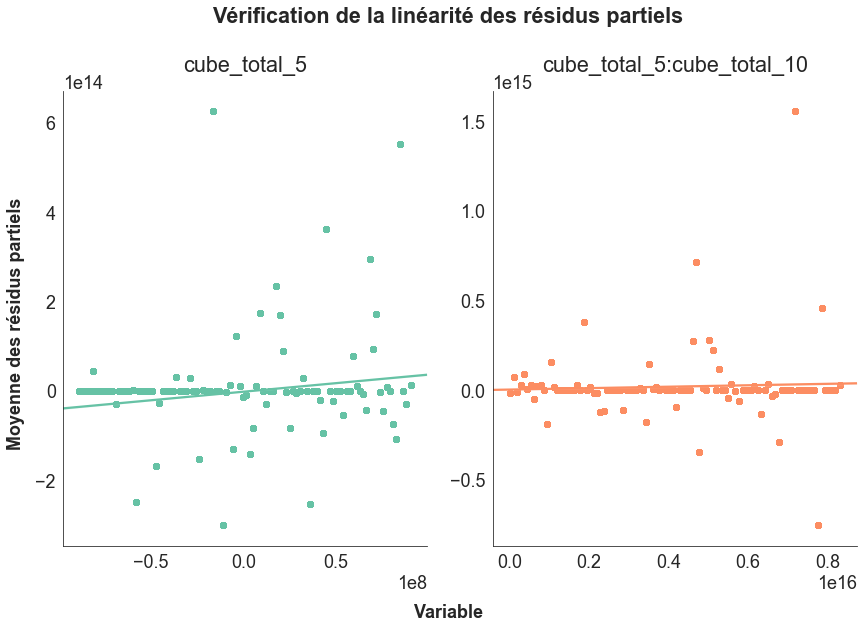

In [196]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=1, nbcol=2, is_mono=False)
cpt = 0
for variable in ["cube_total_5","cube_total_5:cube_total_10"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

En utilisant la fonction cube, la normalité des résidus s'améliore mais j'ai plus d'observations à la fois atypiques et influentes, et la linéarité des résidus partiels se dégrade. Je teste en cumulant la valeur cubée de total 5 et la valeur normale de l'interaction.

In [203]:
anova = smf.ols(formula="somme_signaux ~ cube_total_5 + total_5:total_10", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 2.445e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:24:21   Log-Likelihood:            -4.2935e+05
No. Observations:               71690   AIC:                         8.587e+05
Df Residuals:                   71687   BIC:                         8.587e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.1921      0.569     53.095      0.000      29.078      31.307
cube_total_5      6.491e-06   9.91e-09    654.990      0.000    6.47e-06    6.51e-06
total_5:total_10    -0.0003   5.79e-06    -48.361      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     3552.706   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1568.870
Skew:                          -0.133   Prob(JB):                         0.00
Kurtosis:                       2.326   Cond. No.                     6.71e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

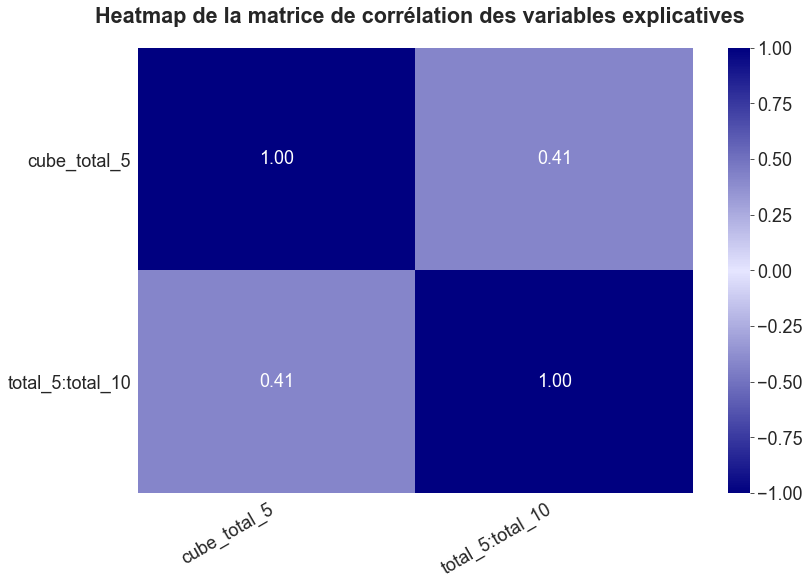

In [204]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [205]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
cube_total_5      1.207311
total_5:total_10  1.207311

In [206]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df              F  PR(>F)  eta_squared  \
cube_total_5      3.999537e+09      1.0  429011.728347     0.0     0.852842   
total_5:total_10  2.180363e+07      1.0    2338.774166     0.0     0.004649   
Residual          6.683146e+08  71687.0            NaN     NaN          NaN   
total             4.689655e+09  71689.0            NaN     NaN          NaN   

                  omega_squared  
cube_total_5           0.852817  
total_5:total_10       0.004635  
Residual                    NaN  
total                       NaN

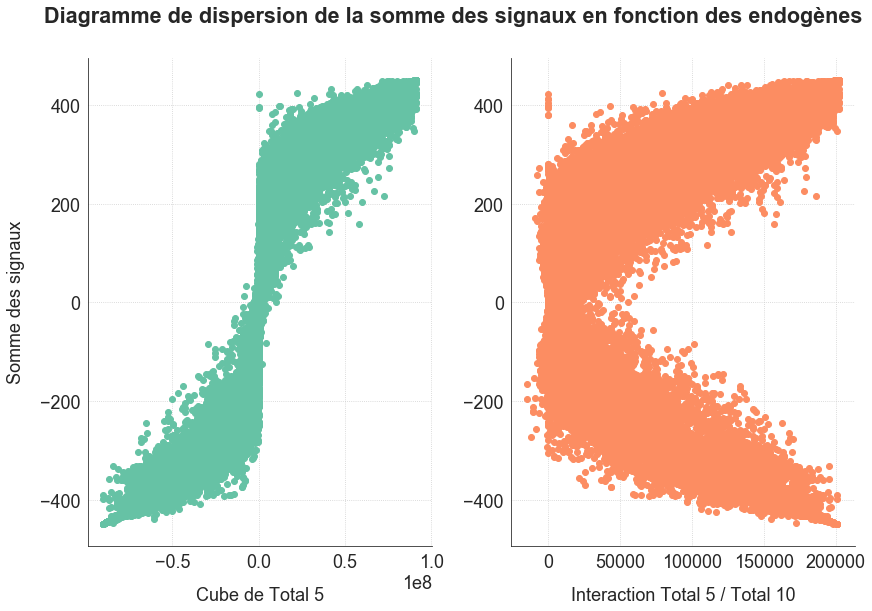

In [207]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["total_5:total_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

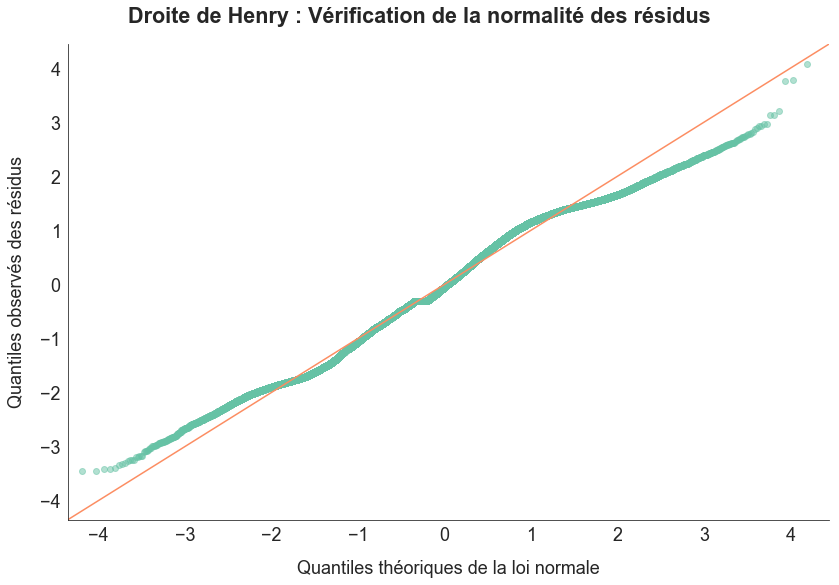

In [208]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

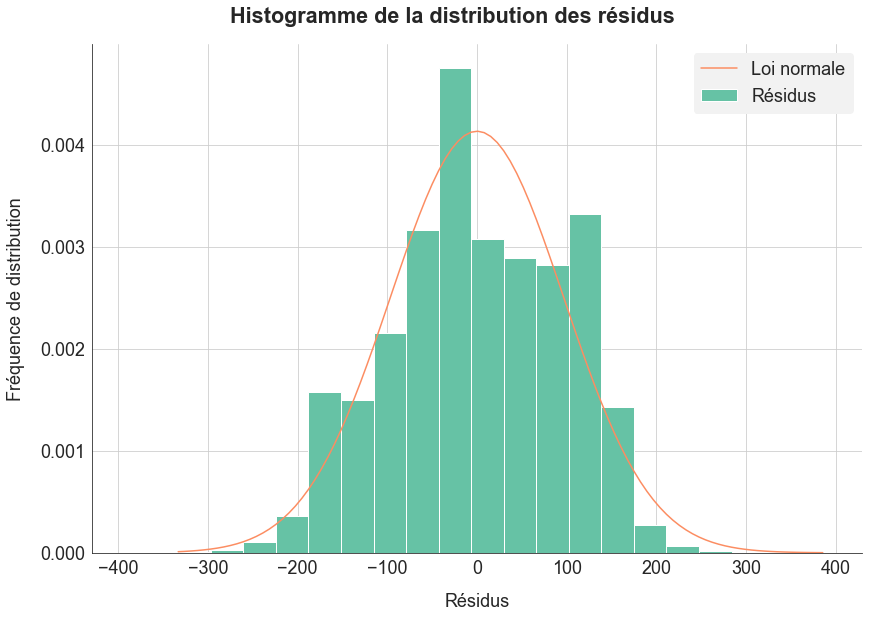

In [209]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova04_01_distribution_residus.png")
plt.show()

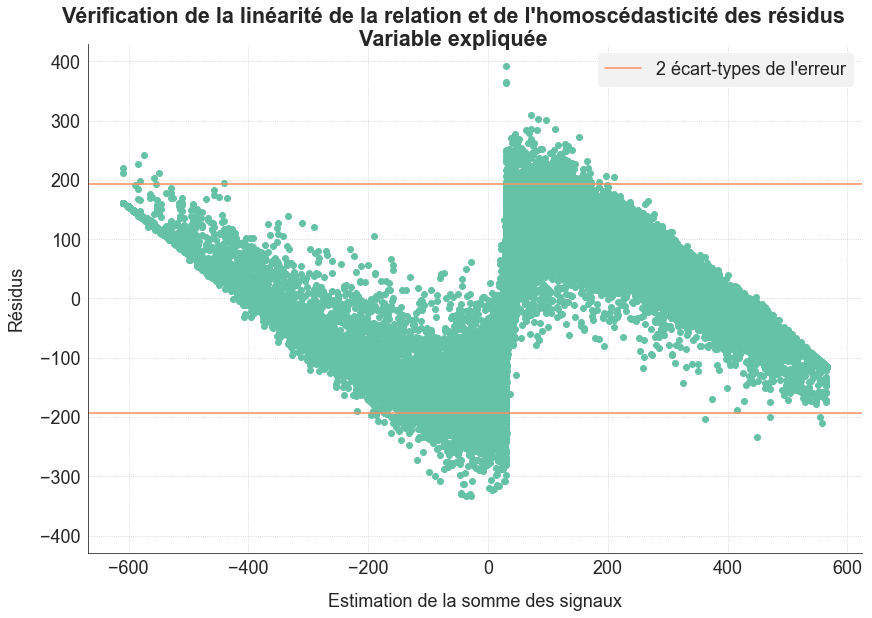

In [210]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

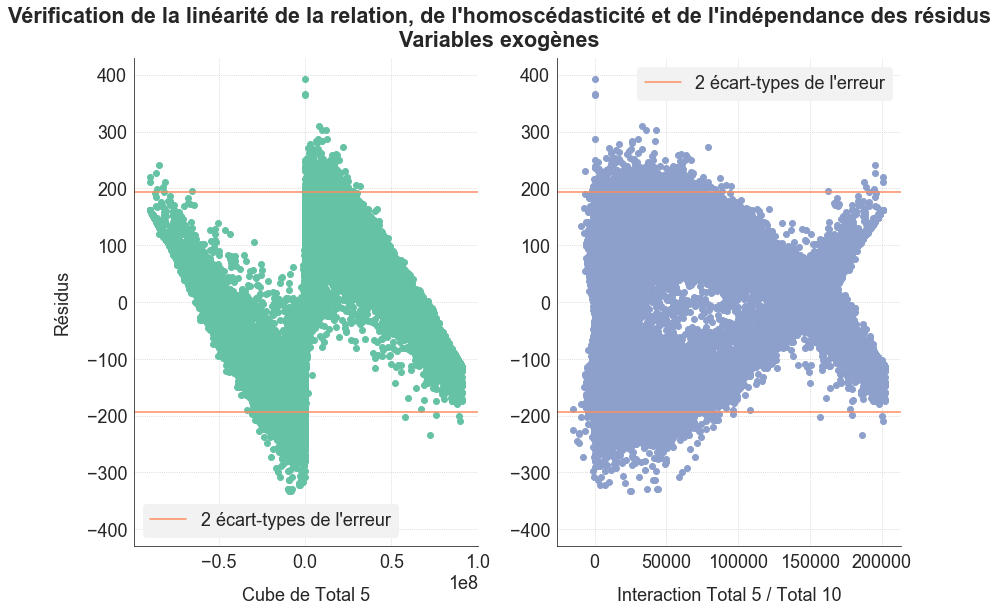

In [212]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["total_5:total_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

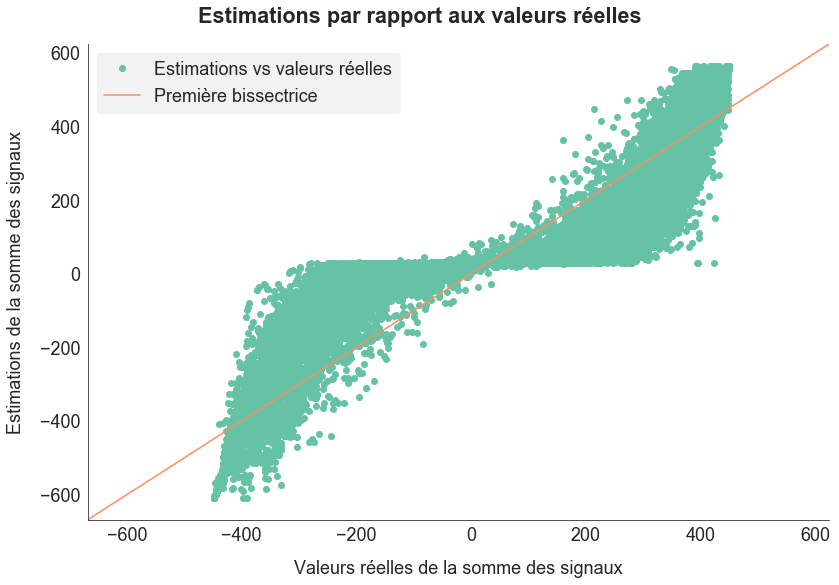

In [213]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [214]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [215]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [216]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (971 sur 71690)


observation_name    levier  outlier  cook_distance  influence
6                     6  0.000191     True       0.000072       True
55                   55  0.000184     True       0.000061       True
75                   75  0.000185     True       0.000064       True
163                 163  0.000189     True       0.000196       True
175                 175  0.000096     True       0.000056       True
193                 193  0.000189     True       0.000070       True
315                 317  0.000188     True       0.000069       True
339                 341  0.000191     True       0.000074       True
354                 356  0.000187     True       0.000065       True
397                 399  0.000194     True       0.000079       True
404                 406  0.000203     True       0.000103       True
411                 413  0.000169     True       0.000063       True
472                 474  0.000231     True       0.000184       True
590                 592  0.000189     True       0.000234       True
767                 770  0.000183     True       0.000086       True
782                 785  0.000209     True       0.000117       True
834                 837  0.000199     True       0.000092       True
915                 918  0.000187     True       0.000067       True
1008               1011  0.000201     True       0.000097       True
1026               1029  0.000188     True       0.000073       True
1224               1227  0.000187     True       0.000066       True
1236               1239  0.000214     True       0.000132       True
1357               1360  0.000204     True       0.000202       True
1385               1388  0.000209     True       0.000117       True
1438               1441  0.000189     True       0.000069       True
1521               1524  0.000168     True       0.000134       True
1693               1696  0.000187     True       0.000066       True
1749               1754  0.000228     True       0.000174       True
1804               1809  0.000204     True       0.000104       True
1840               1845  0.000201     True       0.000097       True
...                 ...       ...      ...            ...        ...
69781             69976  0.000184     True       0.000061       True
69882             70078  0.000225     True       0.000165       True
70084             70280  0.000158     True       0.000082       True
70119             70315  0.000187     True       0.000066       True
70132             70328  0.000163     True       0.000097       True
70270             70466  0.000189     True       0.000070       True
70430             70627  0.000147     True       0.000155       True
70435             70632  0.000196     True       0.000086       True
70437             70634  0.000180     True       0.000117       True
70511             70708  0.000182     True       0.000057       True
70641             70838  0.000204     True       0.000102       True
70737             70935  0.000187     True       0.000105       True
70893             71091  0.000176     True       0.000087       True
70971             71170  0.000189     True       0.000102       True
71025             71224  0.000134     True       0.000066       True
71073             71272  0.000189     True       0.000215       True
71131             71331  0.000187     True       0.000066       True
71135             71335  0.000187     True       0.000066       True
71158             71358  0.000196     True       0.000085       True
71212             71412  0.000189     True       0.000070       True
71227             71427  0.000184     True       0.000059       True
71234             71435  0.000199     True       0.000092       True
71275             71476  0.000230     True       0.000183       True
71284             71485  0.000229     True       0.000181       True
71310             71511  0.000212     True       0.000124       True
71385             71586  0.000204     True       0.000102       True
71433

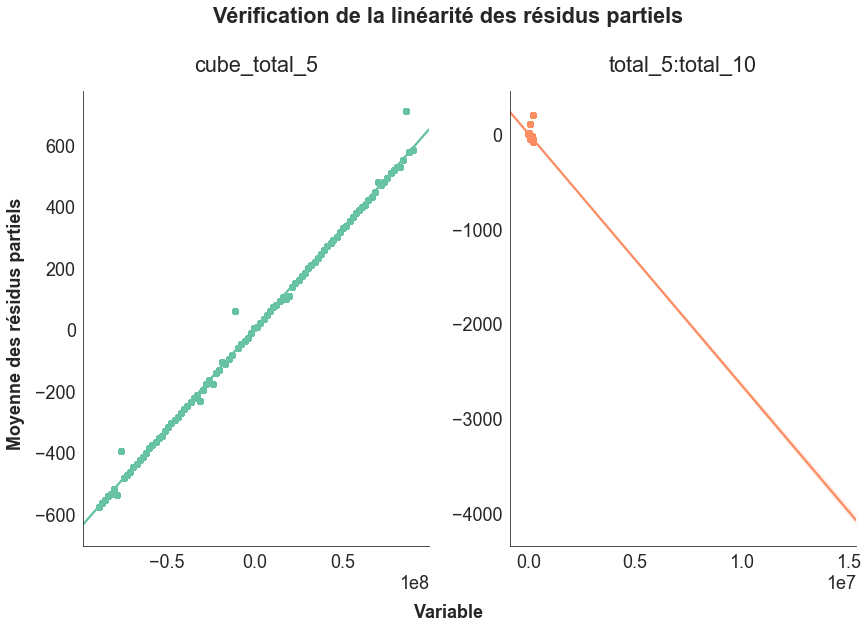

In [218]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=1, nbcol=2, is_mono=False)
cpt = 0
for variable in ["cube_total_5","total_5:total_10"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

Ce modèle est meilleur avec une bonne normalité des résidus, peu de valeurs à la fois atypiques et influentes, et un bon respect des différentes hypothèses.

### 3.6.4. Estimation de la somme des signaux à partir de la dernière somme connue et des variations passées

**Avec les données de l'échantillon basé sur la variation à 1 mois**

In [153]:
data_model = signed_data21[["somme_signaux","total_5","diff_5_10","diff_10_15","diff_15_20"]].copy()
len(data_model)

71690

In [154]:
anova = smf.ols(formula="somme_signaux ~  total_5 + diff_5_10 + diff_10_15 + diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.021e+06
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:47:44   Log-Likelihood:            -3.3339e+05
No. Observations:               71690   AIC:                         6.668e+05
Df Residuals:                   71685   BIC:                         6.668e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1126      0.101     10.983      0.000       0.914       1.311
total_5        0.9873      0.000   2770.147      0.000       0.987       0.988
diff_5_10      0.5072      0.004    135.300      0.000       0.500       0.515
diff_10_15     0.1496      0.004     35.855      0.000       0.141       0.158
diff_15_20     0.0107      0.004      2.839      0.005       0.003       0.018
==============================================================================
Omnibus:                    15017.273   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           613423.394
Skew:                           0.026   Prob(JB):                         0.00
Kurtosis:                      17.330   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

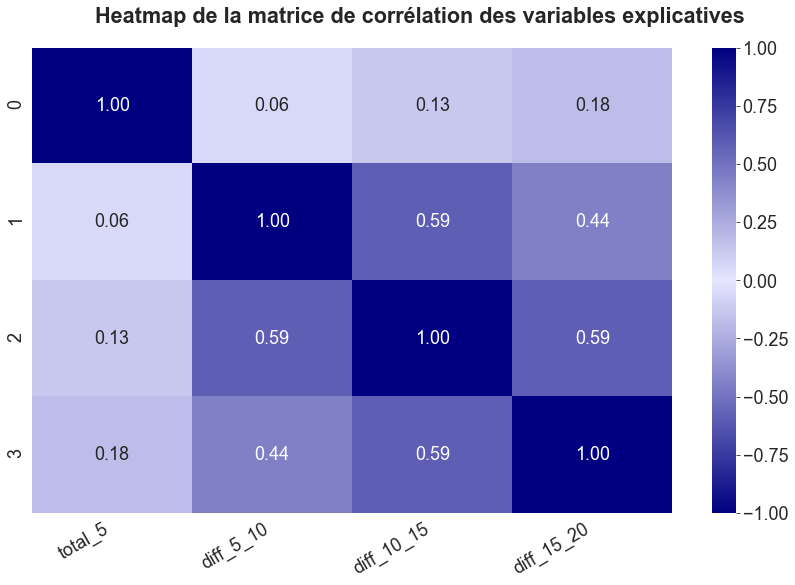

In [155]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
#mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [156]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
total_5     1.035172
diff_5_10   1.578594
diff_10_15  1.943961
diff_15_20  1.592137

In [157]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df             F         PR(>F)  eta_squared  \
total_5     4.919164e+09      1.0  7.673716e+06   0.000000e+00     0.988244   
diff_5_10   1.173487e+07      1.0  1.830596e+04   0.000000e+00     0.002357   
diff_10_15  8.241127e+05      1.0  1.285586e+03  4.604645e-279     0.000166   
diff_15_20  5.165842e+03      1.0  8.058526e+00   4.530275e-03     0.000001   
Residual    4.595300e+07  71685.0           NaN            NaN          NaN   
total       4.977681e+09  71689.0           NaN            NaN          NaN   

            omega_squared  
total_5          0.988216  
diff_5_10        0.002344  
diff_10_15       0.000152  
diff_15_20      -0.000013  
Residual              NaN  
total                 NaN

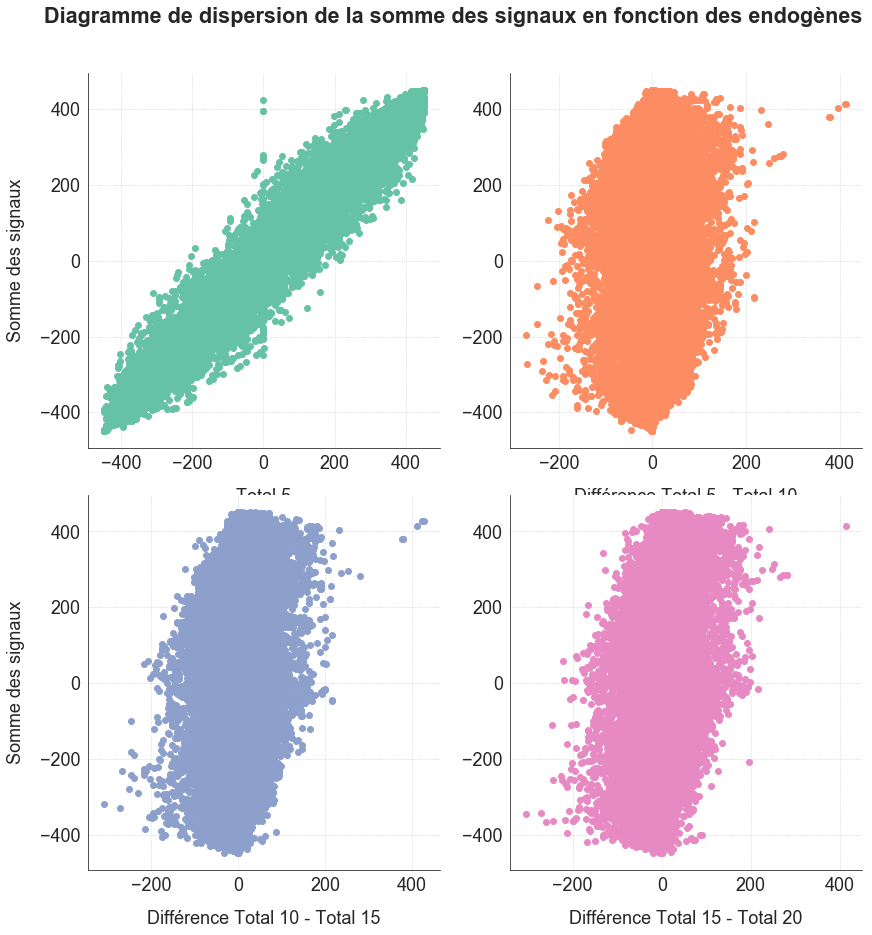

In [158]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[2], markerfacecolor=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[3], markerfacecolor=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=4)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
mygraph.set_axe('y', label="Somme des signaux", multi_index=3)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

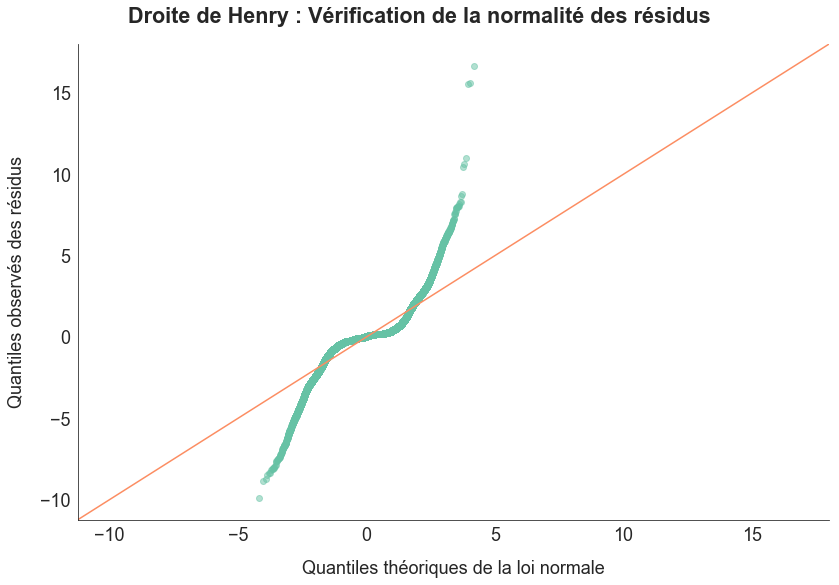

In [159]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

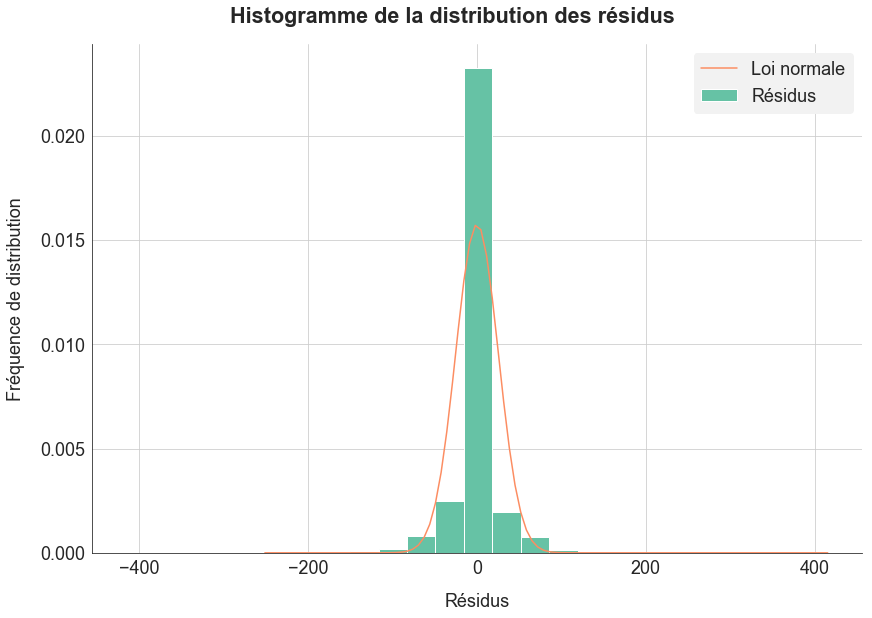

In [160]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova04_01_distribution_residus.png")
plt.show()

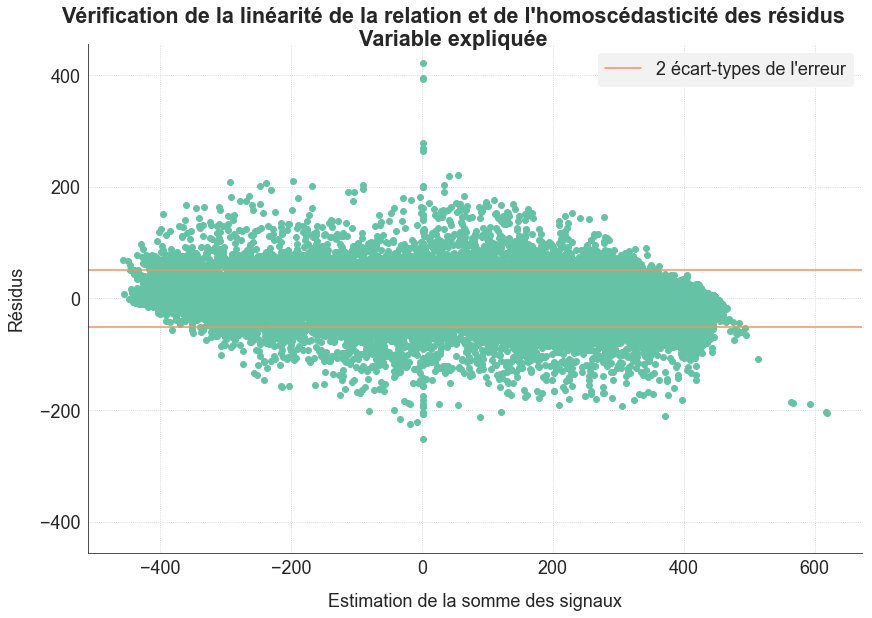

In [161]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

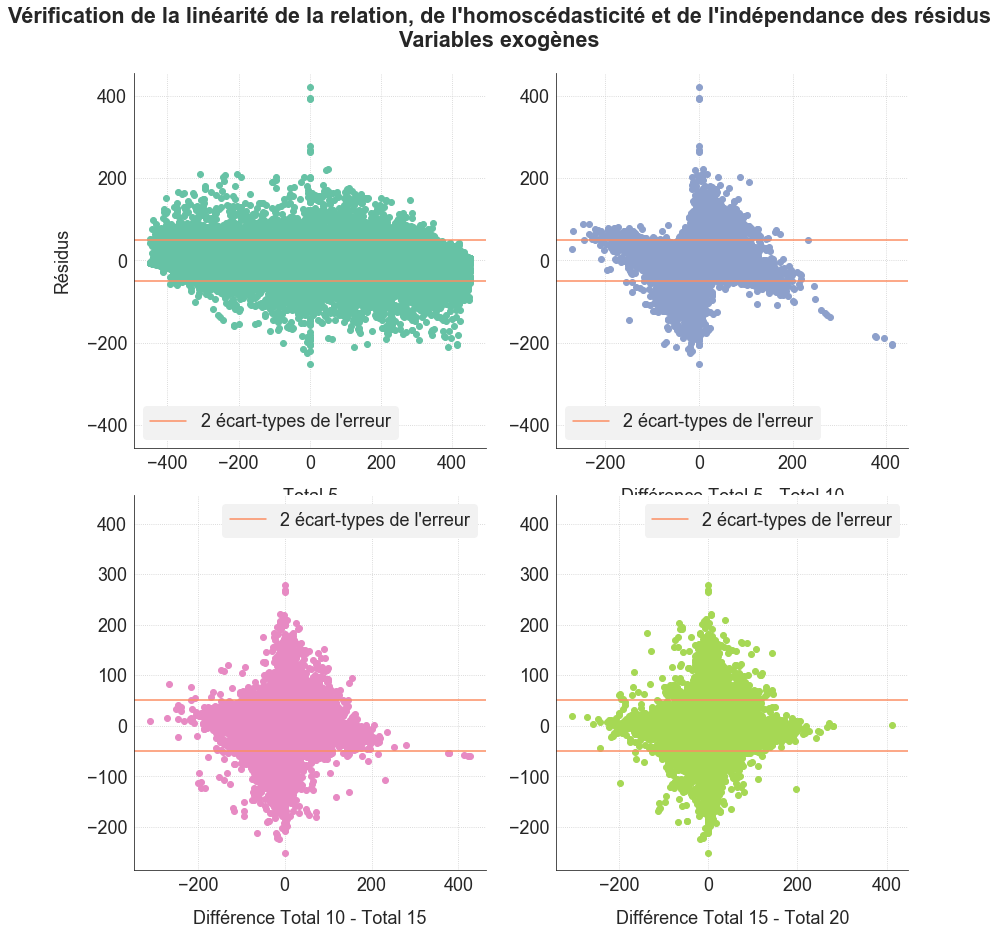

In [162]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[4], linestyle='', with_grid='both', grid_style=":", multi_index=4)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=4)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=4)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

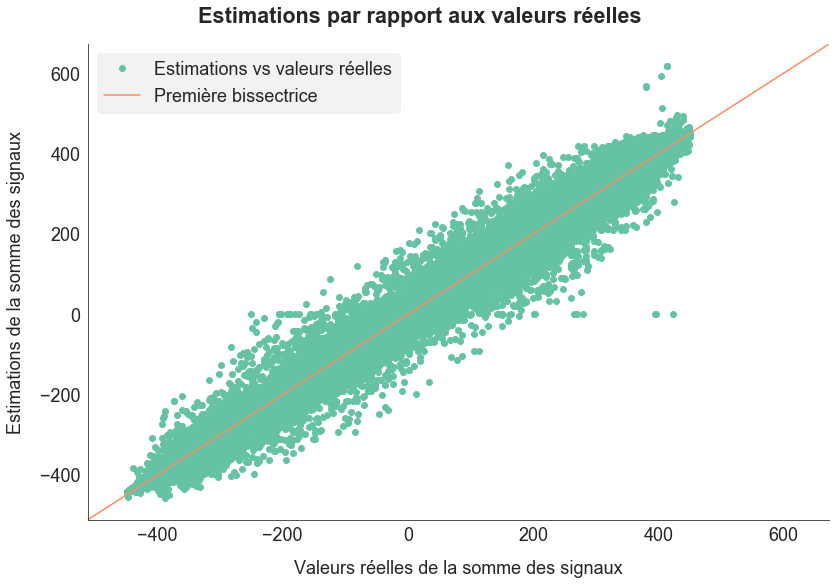

In [163]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [98]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [99]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [100]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (2175 sur 71690)


observation_name    levier  outlier  cook_distance  influence
21                   21  0.000229     True       0.000061       True
41                   41  0.000295     True       0.000078       True
51                   51  0.000246     True       0.000070       True
84                   84  0.000242     True       0.000121       True
127                 127  0.000413     True       0.000130       True
139                 139  0.000502     True       0.003342       True
195                 195  0.000268     True       0.000093       True
223                 223  0.000425     True       0.000383       True
280                 281  0.000143     True       0.000136       True
289                 290  0.000578     True       0.002177       True
300                 301  0.000231     True       0.000101       True
360                 362  0.000200     True       0.000185       True
393                 395  0.000153     True       0.000324       True
396                 398  0.000237     True       0.000130       True
413                 415  0.000155     True       0.000508       True
488                 490  0.000351     True       0.000334       True
524                 526  0.000340     True       0.000214       True
576                 578  0.000397     True       0.000311       True
595                 597  0.000225     True       0.000195       True
660                 662  0.000267     True       0.000073       True
690                 692  0.000315     True       0.000107       True
745                 748  0.000315     True       0.000099       True
783                 786  0.000367     True       0.000211       True
785                 788  0.000195     True       0.000123       True
806                 809  0.000153     True       0.000106       True
809                 812  0.000348     True       0.000319       True
816                 819  0.000397     True       0.000103       True
846                 849  0.000271     True       0.000065       True
989                 992  0.000197     True       0.000118       True
1112               1115  0.000334     True       0.000090       True
...                 ...       ...      ...            ...        ...
70720             70918  0.000156     True       0.000085       True
70733             70931  0.000192     True       0.000091       True
70736             70934  0.000407     True       0.000067       True
70765             70963  0.000840     True       0.000297       True
70855             71053  0.000611     True       0.000114       True
70862             71060  0.000206     True       0.000063       True
70868             71066  0.000329     True       0.000571       True
70897             71095  0.000165     True       0.000107       True
70961             71160  0.000174     True       0.000084       True
70986             71185  0.000202     True       0.000062       True
71014             71213  0.000163     True       0.000096       True
71060             71259  0.000236     True       0.000144       True
71063             71262  0.000559     True       0.000074       True
71066             71265  0.000185     True       0.001318       True
71084             71283  0.000157     True       0.000139       True
71168             71368  0.000486     True       0.000418       True
71223             71423  0.000242     True       0.000086       True
71257             71458  0.000161     True       0.000078       True
71357             71558  0.000751     True       0.000093       True
71502             71703  0.000180     True       0.000131       True
71515             71716  0.000345     True       0.000163       True
71539             71741  0.000244     True       0.000198       True
71554             71756  0.000147     True       0.000109       True
71560             71762  0.000427     True       0.000086       True
71571             71773  0.000850     True       0.000101       True
71594             71796  0.000160     True       0.000091       True
71615

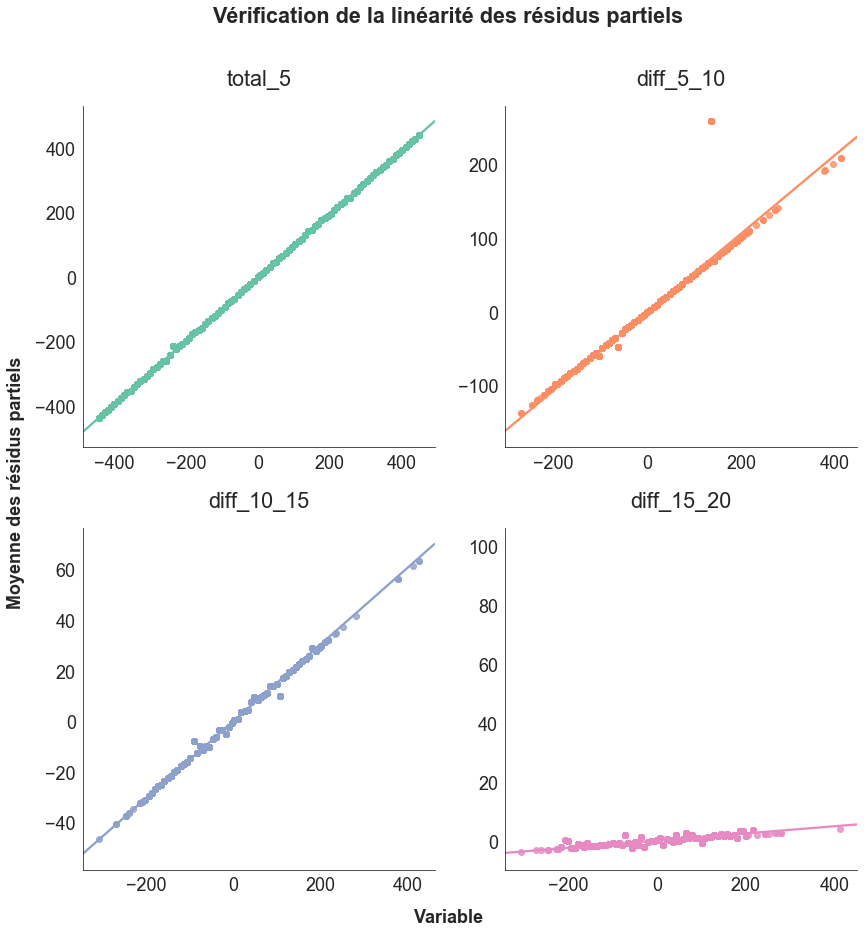

In [102]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=2, nbcol=2, is_mono=False)
cpt = 0
for variable in ["total_5","diff_5_10","diff_10_15","diff_15_20"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

Tentative avec toutes les interactions

In [103]:
anova = smf.ols(formula="somme_signaux ~  total_5 * diff_5_10 * diff_10_15 * diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.473e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:00:11   Log-Likelihood:            -3.3284e+05
No. Observations:               71690   AIC:                         6.657e+05
Df Residuals:                   71674   BIC:                         6.659e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.3956      0.114     12.279      0.000       1.173       1.618
total_5                                     0.9877      0.000   2642.922      0.000       0.987       0.988
diff_5_10                                   0.5367      0.004    133.533      0.000       0.529       0.545
total_5:diff_5_10                       -8.997e-05   1.82e-05     -4.947      0.000      -0.000   -5.43e-05
diff_10_15                                  0.1806      0.005     39.403      0.000       0.172       0.190
total_5:diff_10_15                      -4.976e-05   2.01e-05     -2.470      0.014   -8.92e-05   -1.03e-05
diff_5_10:diff_10_15                     6.232e-05   7.76e-05      0.803      0.422   -8.97e-05       0.000
total_5:diff_5_10:diff_10_15            -6.128e-06   3.85e-07    -15.930      0.000   -6.88e-06   -5.37e-06
diff_15_20                                  0.0411      0.004      9.450      0.000       0.033       0.050
total_5:diff_15_20                        1.34e-06   1.91e-05      0.070      0.944    -3.6e-05    3.87e-05
diff_5_10:diff_15_20                     6.369e-05      0.000      0.574      0.566      -0.000       0.000
total_5:diff_5_10:diff_15_20            -3.094e-06   5.37e-07     -5.761      0.000   -4.15e-06   -2.04e-06
diff_10_15:diff_15_20                      -0.0003   9.39e-05     -3.586      0.000      -0.001      -0.000
total_5:diff_10_15:diff_15_20            4.531e-06   4.44e-07     10.206      0.000    3.66e-06     5.4e-06
diff_5_10:diff_10_15:diff_15_20         -3.684e-05   1.62e-06    -22.699      0.000      -4e-05   -3.37e-05
total_5:diff_5_10:diff_10_15:diff_15_20   2.43e-08   8.26e-09      2.943      0.003    8.12e-09    4.05e-08
==============================================================================
Omnibus:                    15175.896   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           642172.655
Skew:                           0.012   Prob(JB):                         0.00
Kurtosis:                      17.662   Cond. No.                     1.91e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

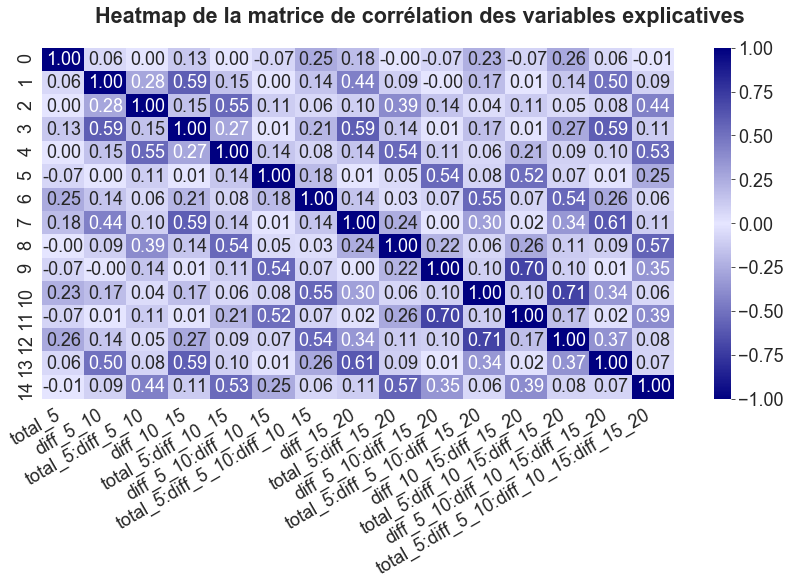

In [104]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
#mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [105]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
total_5                                  1.155694
diff_5_10                                1.842284
total_5:diff_5_10                        1.677533
diff_10_15                               2.383716
total_5:diff_10_15                       2.086548
diff_5_10:diff_10_15                     1.637576
total_5:diff_5_10:diff_10_15             1.713183
diff_15_20                               2.129919
total_5:diff_15_20                       1.874717
diff_5_10:diff_15_20                     2.271732
total_5:diff_5_10:diff_15_20             2.310992
diff_10_15:diff_15_20                    2.305648
total_5:diff_10_15:diff_15_20            2.422474
diff_5_10:diff_10_15:diff_15_20          2.093142
total_5:diff_5_10:diff_10_15:diff_15_20  1.919273

In [106]:
anova = smf.ols(formula="somme_signaux ~  total_5 * diff_5_10 * diff_10_15 * diff_15_20 - total_5:diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.864e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:00:20   Log-Likelihood:            -3.3284e+05
No. Observations:               71690   AIC:                         6.657e+05
Df Residuals:                   71675   BIC:                         6.658e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.3970      0.112     12.488      0.000       1.178       1.616
total_5                                     0.9877      0.000   2645.227      0.000       0.987       0.988
diff_5_10                                   0.5367      0.004    133.580      0.000       0.529       0.545
total_5:diff_5_10                       -8.989e-05   1.81e-05     -4.954      0.000      -0.000   -5.43e-05
diff_10_15                                  0.1806      0.005     39.575      0.000       0.172       0.190
total_5:diff_10_15                      -4.933e-05   1.92e-05     -2.571      0.010   -8.69e-05   -1.17e-05
diff_5_10:diff_10_15                     6.123e-05    7.6e-05      0.806      0.421   -8.78e-05       0.000
total_5:diff_5_10:diff_10_15            -6.128e-06   3.85e-07    -15.933      0.000   -6.88e-06   -5.37e-06
diff_15_20                                  0.0411      0.004      9.778      0.000       0.033       0.049
diff_5_10:diff_15_20                     6.443e-05      0.000      0.583      0.560      -0.000       0.000
total_5:diff_5_10:diff_15_20            -3.096e-06   5.37e-07     -5.770      0.000   -4.15e-06   -2.04e-06
diff_10_15:diff_15_20                      -0.0003   9.37e-05     -3.589      0.000      -0.001      -0.000
total_5:diff_10_15:diff_15_20            4.532e-06   4.44e-07     10.214      0.000    3.66e-06     5.4e-06
diff_5_10:diff_10_15:diff_15_20         -3.685e-05   1.62e-06    -22.730      0.000      -4e-05   -3.37e-05
total_5:diff_5_10:diff_10_15:diff_15_20   2.45e-08   7.78e-09      3.148      0.002    9.25e-09    3.97e-08
==============================================================================
Omnibus:                    15175.910   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           642179.459
Skew:                           0.012   Prob(JB):                         0.00
Kurtosis:                      17.662   Cond. No.                     1.88e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
anova = smf.ols(formula="somme_signaux ~  total_5 * diff_5_10 * diff_10_15 * diff_15_20 - total_5:diff_15_20 - diff_5_10:diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.315e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:00:21   Log-Likelihood:            -3.3284e+05
No. Observations:               71690   AIC:                         6.657e+05
Df Residuals:                   71676   BIC:                         6.658e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.4016      0.112     12.561      0.000       1.183       1.620
total_5                                     0.9877      0.000   2645.761      0.000       0.987       0.988
diff_5_10                                   0.5366      0.004    133.764      0.000       0.529       0.544
total_5:diff_5_10                       -8.863e-05    1.8e-05     -4.919      0.000      -0.000   -5.33e-05
diff_10_15                                  0.1808      0.005     39.739      0.000       0.172       0.190
total_5:diff_10_15                      -5.129e-05   1.89e-05     -2.715      0.007   -8.83e-05   -1.43e-05
diff_5_10:diff_10_15                     7.372e-05   7.29e-05      1.011      0.312   -6.92e-05       0.000
total_5:diff_5_10:diff_10_15            -6.135e-06   3.84e-07    -15.961      0.000   -6.89e-06   -5.38e-06
diff_15_20                                  0.0411      0.004      9.765      0.000       0.033       0.049
total_5:diff_5_10:diff_15_20            -3.071e-06   5.35e-07     -5.741      0.000   -4.12e-06   -2.02e-06
diff_10_15:diff_15_20                      -0.0003   7.81e-05     -3.920      0.000      -0.000      -0.000
total_5:diff_10_15:diff_15_20            4.519e-06   4.43e-07     10.197      0.000    3.65e-06    5.39e-06
diff_5_10:diff_10_15:diff_15_20         -3.686e-05   1.62e-06    -22.739      0.000      -4e-05   -3.37e-05
total_5:diff_5_10:diff_10_15:diff_15_20  2.508e-08   7.72e-09      3.250      0.001    9.96e-09    4.02e-08
==============================================================================
Omnibus:                    15176.144   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           642236.156
Skew:                           0.012   Prob(JB):                         0.00
Kurtosis:                      17.663   Cond. No.                     1.88e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
anova = smf.ols(formula="somme_signaux ~  total_5 * diff_5_10 * diff_10_15 * diff_15_20 - total_5:diff_15_20 - diff_5_10:diff_15_20 - diff_5_10:diff_10_15", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.841e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:00:34   Log-Likelihood:            -3.3284e+05
No. Observations:               71690   AIC:                         6.657e+05
Df Residuals:                   71677   BIC:                         6.658e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.4243      0.109     13.031      0.000       1.210       1.639
total_5                                     0.9877      0.000   2652.135      0.000       0.987       0.988
diff_5_10                                   0.5364      0.004    133.783      0.000       0.529       0.544
total_5:diff_5_10                       -8.788e-05    1.8e-05     -4.882      0.000      -0.000   -5.26e-05
diff_10_15                                  0.1808      0.005     39.734      0.000       0.172       0.190
total_5:diff_10_15                      -5.161e-05   1.89e-05     -2.732      0.006   -8.86e-05   -1.46e-05
total_5:diff_5_10:diff_10_15            -6.052e-06   3.75e-07    -16.117      0.000   -6.79e-06   -5.32e-06
diff_15_20                                  0.0412      0.004      9.807      0.000       0.033       0.049
total_5:diff_5_10:diff_15_20            -3.073e-06   5.35e-07     -5.746      0.000   -4.12e-06   -2.03e-06
diff_10_15:diff_15_20                      -0.0003   6.88e-05     -3.908      0.000      -0.000      -0.000
total_5:diff_10_15:diff_15_20            4.477e-06   4.41e-07     10.147      0.000    3.61e-06    5.34e-06
diff_5_10:diff_10_15:diff_15_20         -3.688e-05   1.62e-06    -22.755      0.000   -4.01e-05   -3.37e-05
total_5:diff_5_10:diff_10_15:diff_15_20  2.542e-08   7.71e-09      3.297      0.001    1.03e-08    4.05e-08
==============================================================================
Omnibus:                    15175.678   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           642043.999
Skew:                           0.014   Prob(JB):                         0.00
Kurtosis:                      17.661   Cond. No.                     1.84e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df             F  \
total_5                                  4.857930e+09      1.0  7.694805e+06   
diff_5_10                                1.161541e+07      1.0  1.839844e+04   
total_5:diff_5_10                        1.136003e+04      1.0  1.799393e+01   
diff_10_15                               7.907671e+05      1.0  1.252550e+03   
total_5:diff_10_15                       2.527540e+03      1.0  4.003543e+00   
total_5:diff_5_10:diff_10_15             1.627080e+05      1.0  2.577243e+02   
diff_15_20                               4.022620e+03      1.0  6.371702e+00   
total_5:diff_5_10:diff_15_20             2.093638e+04      1.0  3.316255e+01   
diff_10_15:diff_15_20                    1.027135e+03      1.0  1.626949e+00   
total_5:diff_10_15:diff_15_20            6.366886e+04      1.0  1.008494e+02   
diff_5_10:diff_10_15:diff_15_20          3.240961e+05      1.0  5.133579e+02   
total_5:diff_5_10:diff_10_15:diff_15_20  6.863500e+03      1.0  1.087156e+01   
Residual                                 4.525155e+07  71677.0           NaN   
total                                    4.916185e+09  71689.0           NaN   

                                                PR(>F)   eta_squared  \
total_5                                   0.000000e+00  9.881504e-01   
diff_5_10                                 0.000000e+00  2.362689e-03   
total_5:diff_5_10                         2.218882e-05  2.310742e-06   
diff_10_15                               5.222519e-272  1.608498e-04   
total_5:diff_10_15                        4.540849e-02  5.141264e-07   
total_5:diff_5_10:diff_10_15              6.787643e-58  3.309640e-05   
diff_15_20                                1.159757e-02  8.182403e-07   
total_5:diff_5_10:diff_15_20              8.511244e-09  4.258664e-06   
diff_10_15:diff_15_20                     2.021297e-01  2.089293e-07   
total_5:diff_10_15:diff_15_20             1.029005e-23  1.295087e-05   
diff_5_10:diff_10_15:diff_15_20          2.954503e-113  6.592432e-05   
total_5:diff_5_10:diff_10_15:diff_15_20   9.769952e-04  1.396103e-06   
Residual                                           NaN           NaN   
total                                              NaN           NaN   

                                         omega_squared  
total_5                                   9.881226e-01  
diff_5_10                                 2.348707e-03  
total_5:diff_5_10                        -1.163824e-05  
diff_10_15                                1.468986e-04  
total_5:diff_10_15                       -1.343483e-05  
total_5:diff_5_10:diff_10_15              1.914699e-05  
diff_15_20                               -1.313072e-05  
total_5:diff_5_10:diff_15_20             -9.690342e-06  
diff_10_15:diff_15_20                    -1.374002e-05  
total_5:diff_10_15:diff_15_20            -9.982595e-07  
diff_5_10:diff_10_15:diff_15_20           5.197445e-05  
total_5:diff_5_10:diff_10_15:diff_15_20  -1.255286e-05  
Residual                                           NaN  
total                                              NaN

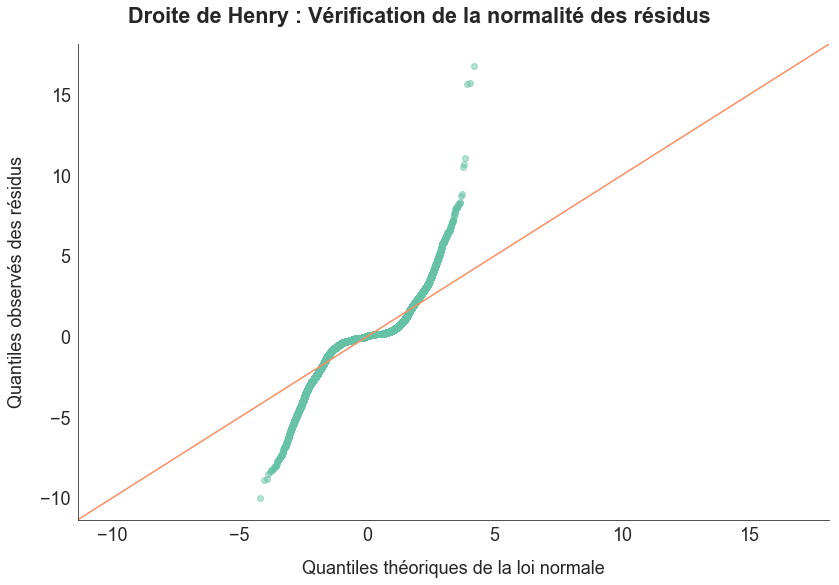

In [110]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

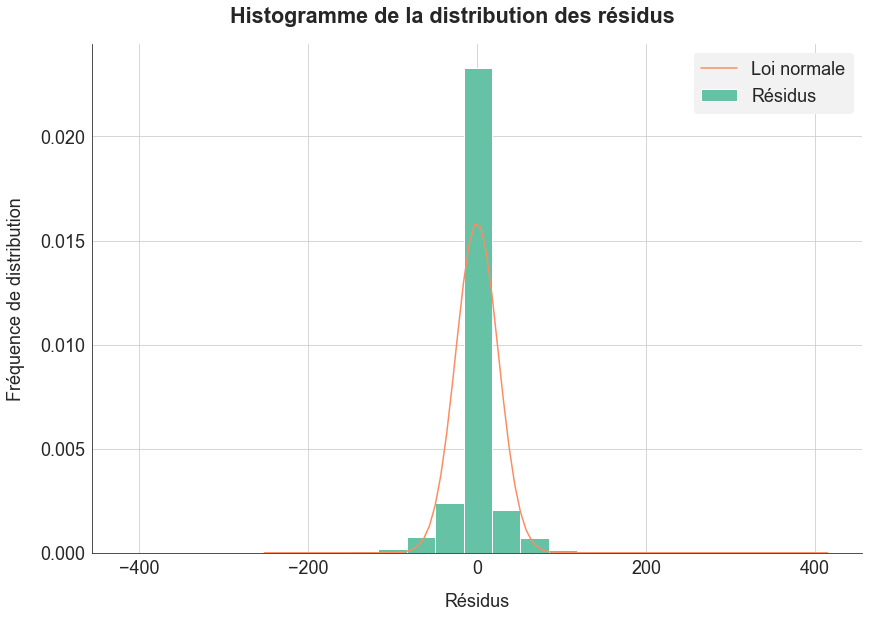

In [111]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova04_01_distribution_residus.png")
plt.show()

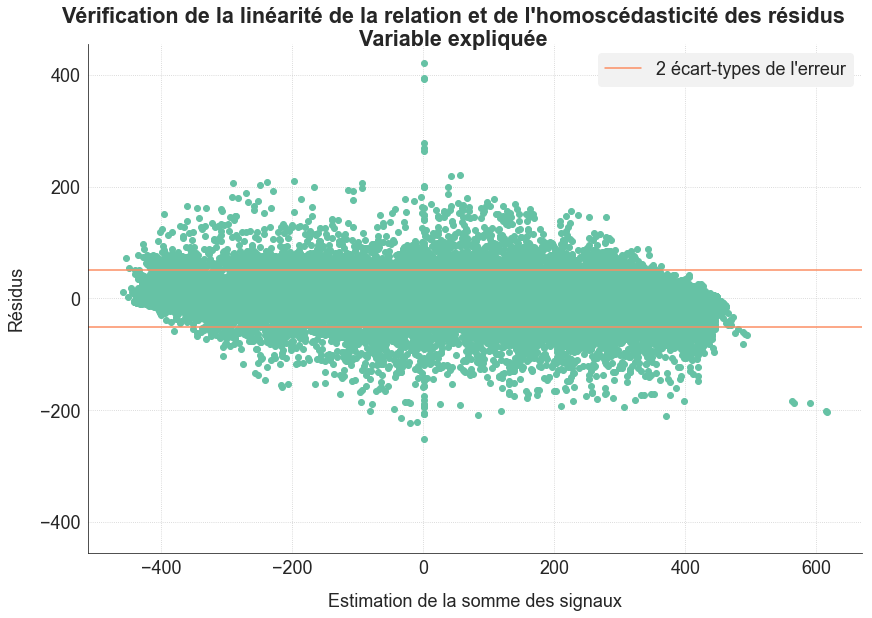

In [112]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

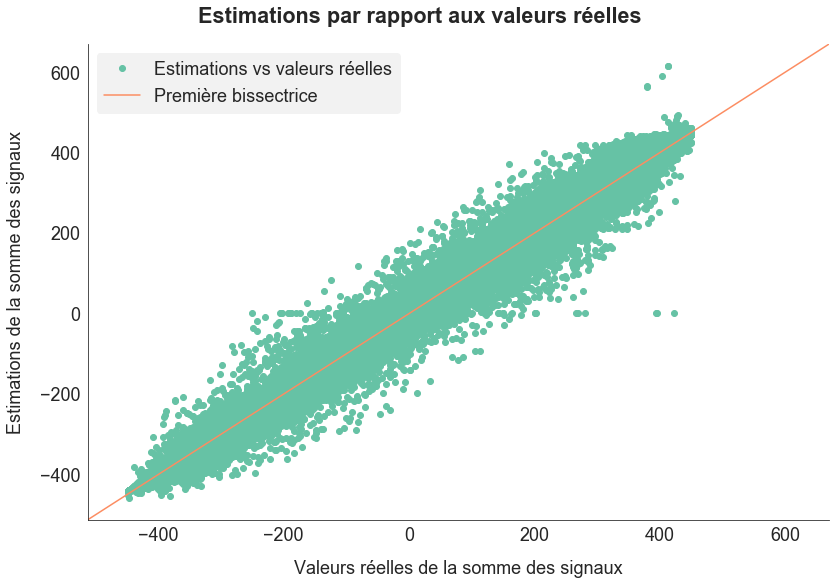

In [113]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [114]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [115]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [116]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (2208 sur 71690)


observation_name    levier  outlier  cook_distance  influence
41                   41  0.000508     True       0.000064       True
84                   84  0.001406     True       0.000063       True
111                 111  0.001084     True       0.000062       True
127                 127  0.000770     True       0.000098       True
139                 139  0.000553     True       0.001369       True
195                 195  0.002216     True       0.000502       True
223                 223  0.000801     True       0.000244       True
280                 281  0.000445     True       0.000138       True
289                 290  0.002179     True       0.004376       True
300                 301  0.002917     True       0.000921       True
393                 395  0.000506     True       0.000366       True
453                 455  0.001750     True       0.000099       True
488                 490  0.001600     True       0.000416       True
524                 526  0.001328     True       0.000585       True
567                 569  0.003386     True       0.000331       True
576                 578  0.000836     True       0.000174       True
621                 623  0.000694     True       0.000079       True
690                 692  0.000410     True       0.000063       True
745                 748  0.000667     True       0.000097       True
750                 753  0.001112     True       0.000186       True
764                 767  0.000388     True       0.000588       True
783                 786  0.000904     True       0.000133       True
785                 788  0.001863     True       0.000563       True
806                 809  0.000514     True       0.000097       True
809                 812  0.002179     True       0.000437       True
838                 841  0.000851     True       0.000106       True
931                 934  0.001858     True       0.000100       True
989                 992  0.000407     True       0.000114       True
1112               1115  0.000931     True       0.000113       True
1145               1148  0.000947     True       0.000337       True
...                 ...       ...      ...            ...        ...
70862             71060  0.000929     True       0.000165       True
70868             71066  0.000428     True       0.000316       True
70897             71095  0.000882     True       0.000210       True
70919             71117  0.000625     True       0.000122       True
70951             71150  0.000830     True       0.000202       True
70986             71185  0.000653     True       0.000063       True
71014             71213  0.000668     True       0.000085       True
71015             71214  0.000731     True       0.000736       True
71060             71259  0.001850     True       0.000523       True
71063             71262  0.000707     True       0.000071       True
71066             71265  0.001130     True       0.003443       True
71147             71347  0.001890     True       0.000112       True
71168             71368  0.001340     True       0.000298       True
71203             71403  0.002461     True       0.000122       True
71223             71423  0.001822     True       0.000291       True
71357             71558  0.001961     True       0.000066       True
71360             71561  0.003033     True       0.000208       True
71373             71574  0.001935     True       0.000072       True
71397             71598  0.001325     True       0.000065       True
71434             71635  0.000391     True       0.000070       True
71502             71703  0.000428     True       0.000115       True
71515             71716  0.000642     True       0.000076       True
71524             71725  0.000488     True       0.000187       True
71575             71777  0.002305     True       0.000320       True
71596             71798  0.000963     True       0.000103       True
71615             71817  0.001995     True       0.000150       True
71661

Le modèle est très compliqué. Je garde le modèle sans interaction qui est déjà très performant. Je vérifie si je peux améliorer la normalité des résidus. La droite de Henry semble avoir la forme de la fonction cube. Je corrige en conséquence l'endogène.

In [220]:
data_model = signed_data21[["somme_signaux","total_5","diff_5_10","diff_10_15","diff_15_20"]].copy()
data_model["cube_total_5"] = np.power(data_model.total_5, 3)
data_model["cube_diff_5_10"] = np.power(data_model.diff_5_10, 3)
data_model["cube_diff_10_15"] = np.power(data_model.diff_10_15, 3)
data_model["cube_diff_15_20"] = np.power(data_model.diff_15_20, 3)
len(data_model)

71690

In [165]:
anova = smf.ols(formula="somme_signaux ~ cube_total_5 + cube_diff_5_10 + cube_diff_10_15 + cube_diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.201e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:48:56   Log-Likelihood:            -4.2990e+05
No. Observations:               71690   AIC:                         8.598e+05
Df Residuals:                   71685   BIC:                         8.599e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.0428      0.387     25.950      0.000       9.284      10.801
cube_total_5     6.276e-06    9.1e-09    689.351      0.000    6.26e-06    6.29e-06
cube_diff_5_10       9e-06   5.12e-07     17.562      0.000       8e-06       1e-05
cube_diff_10_15  7.482e-06   4.73e-07     15.805      0.000    6.55e-06    8.41e-06
cube_diff_15_20  1.524e-05   6.44e-07     23.658      0.000     1.4e-05    1.65e-05
==============================================================================
Omnibus:                      788.540   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              507.371
Skew:                          -0.051   Prob(JB):                    6.69e-111
Kurtosis:                       2.601   Cond. No.                     4.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

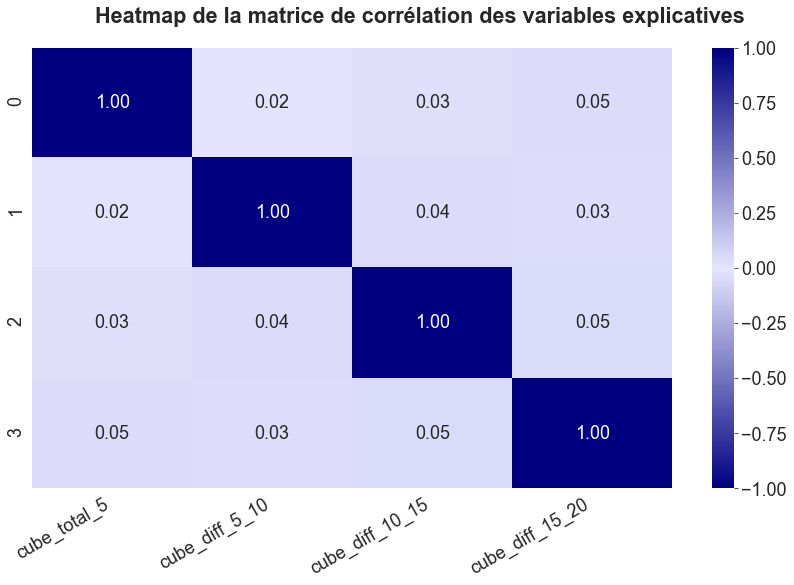

In [166]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
#mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [167]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
cube_total_5     1.003187
cube_diff_5_10   1.003103
cube_diff_10_15  1.005369
cube_diff_15_20  1.005638

In [168]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df              F         PR(>F)  \
cube_total_5     4.498838e+09      1.0  475204.450263   0.000000e+00   
cube_diff_5_10   2.919743e+06      1.0     308.407389   6.772464e-69   
cube_diff_10_15  2.365024e+06      1.0     249.813428   3.549522e-56   
cube_diff_15_20  5.298953e+06      1.0     559.719298  2.880139e-123   
Residual         6.786535e+08  71685.0            NaN            NaN   
total            5.188075e+09  71689.0            NaN            NaN   

                 eta_squared  omega_squared  
cube_total_5        0.867150       0.867124  
cube_diff_5_10      0.000563       0.000549  
cube_diff_10_15     0.000456       0.000442  
cube_diff_15_20     0.001021       0.001007  
Residual                 NaN            NaN  
total                    NaN            NaN

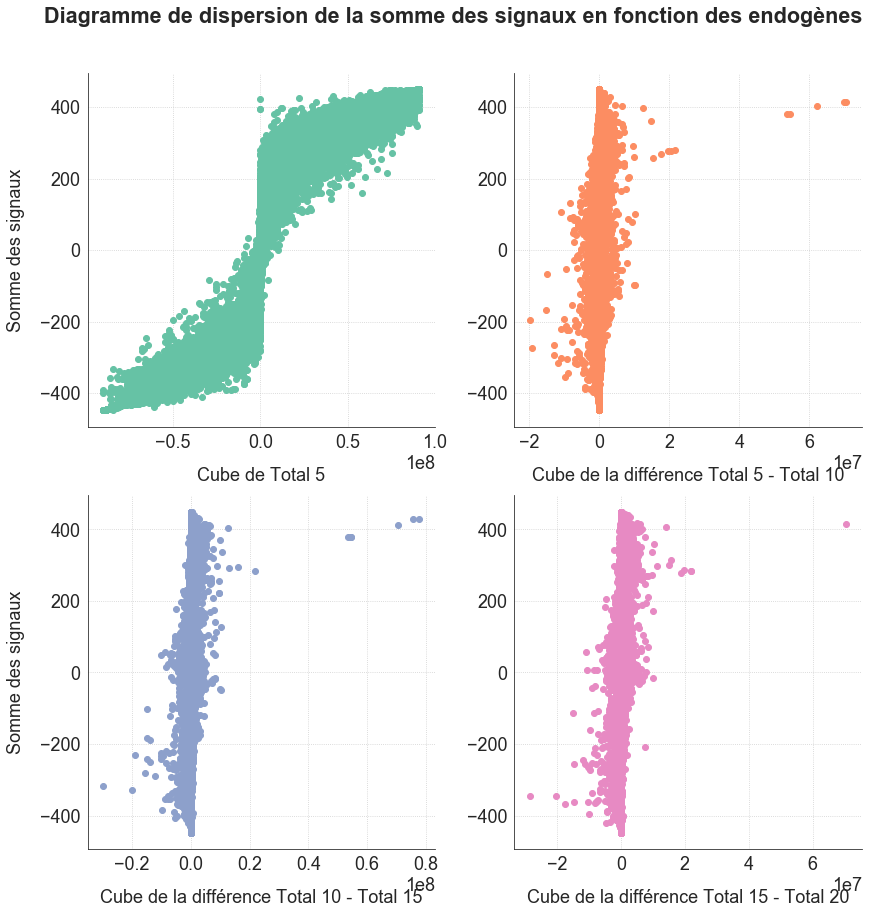

In [169]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["cube_diff_5_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["cube_diff_10_15"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[2], markerfacecolor=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["cube_diff_15_20"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[3], markerfacecolor=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=4)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Cube de la différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Cube de la différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Cube de la différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
mygraph.set_axe('y', label="Somme des signaux", multi_index=3)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

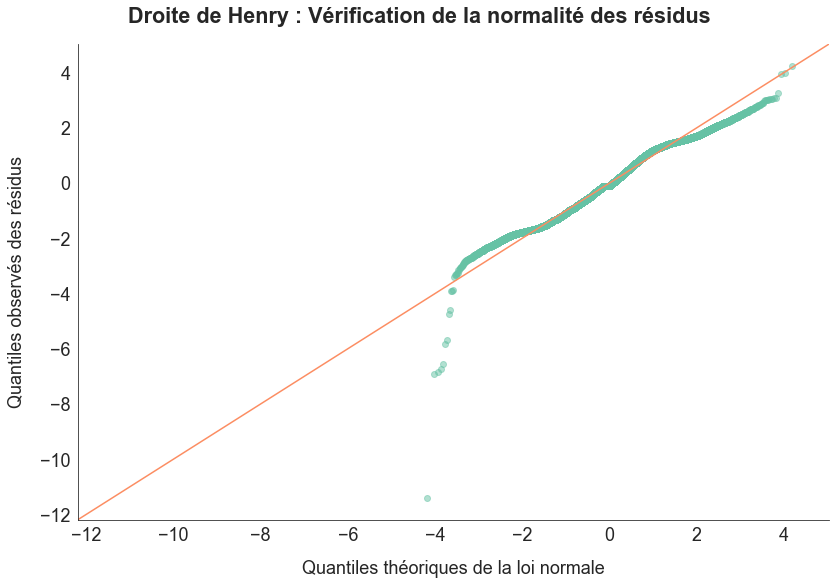

In [170]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

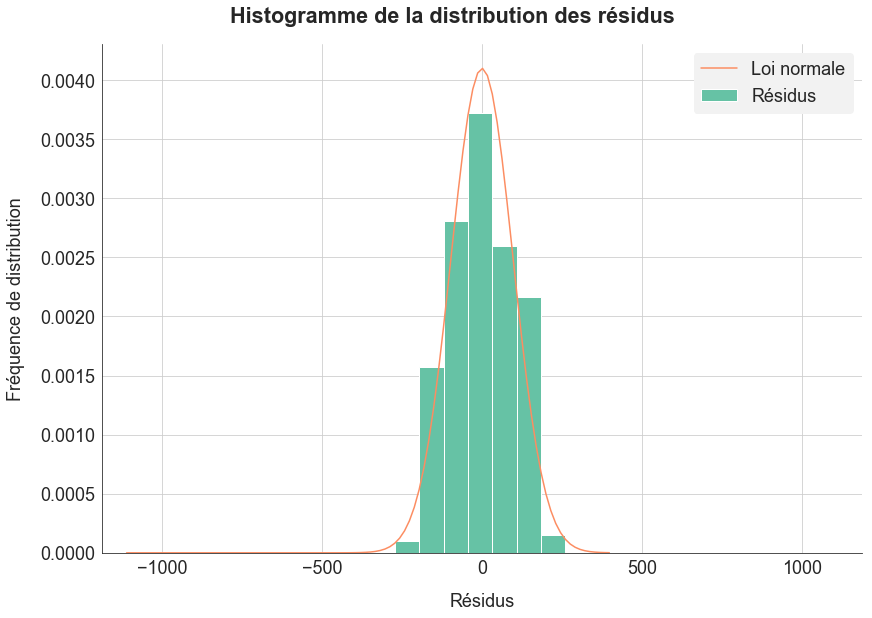

In [171]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_01_distribution_residus.png")
plt.show()

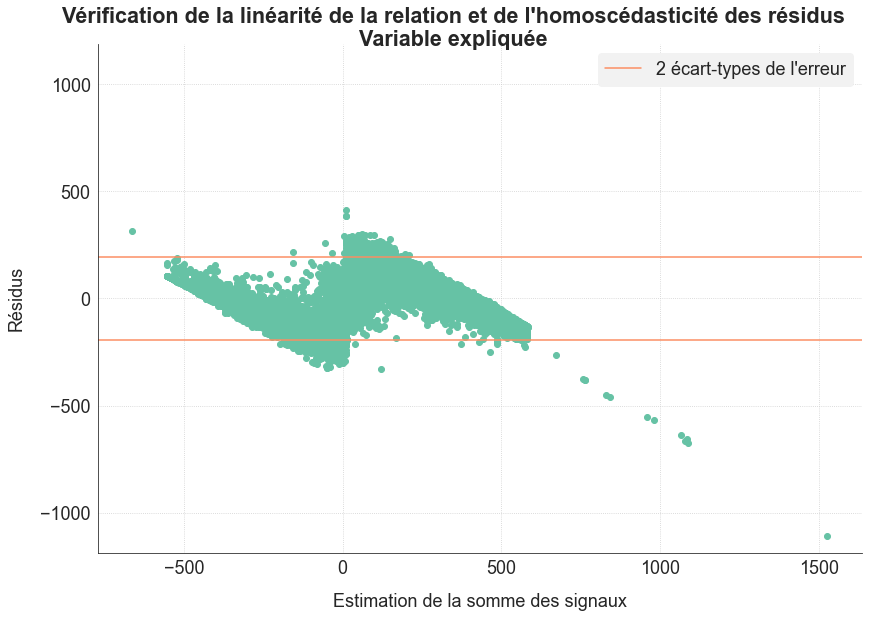

In [172]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

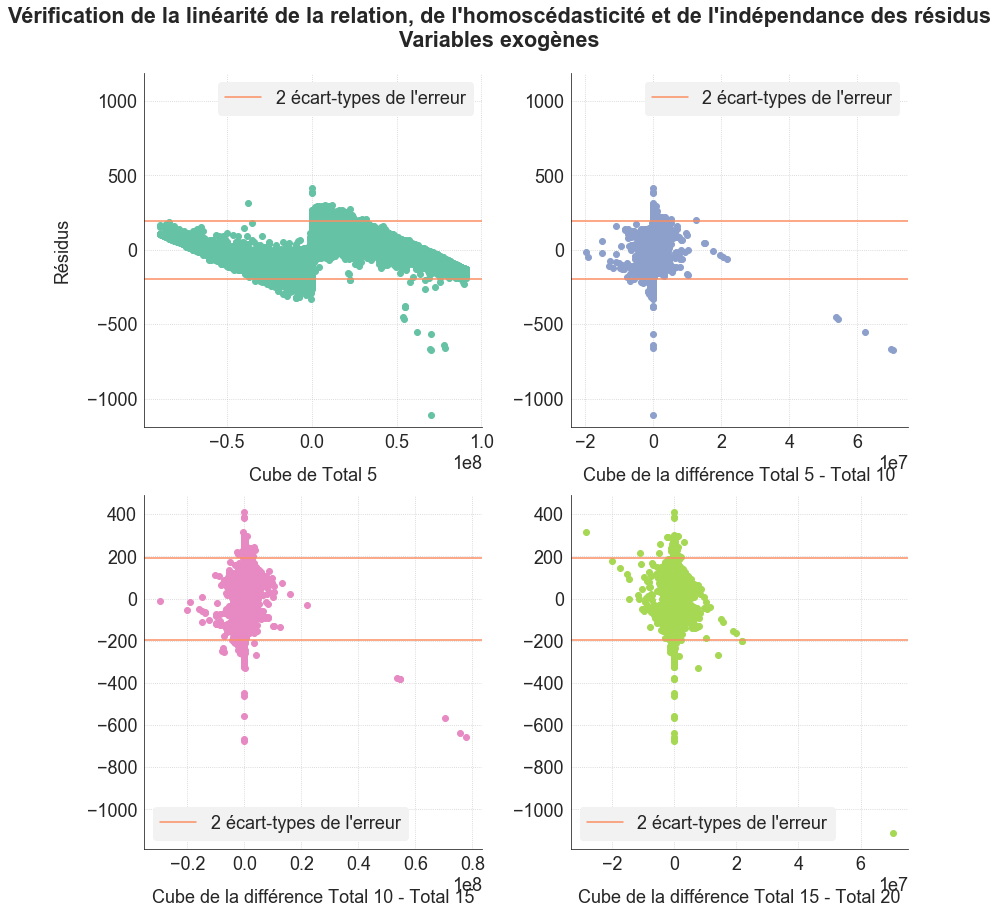

In [173]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["cube_diff_5_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["cube_diff_10_15"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["cube_diff_15_20"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[4], linestyle='', with_grid='both', grid_style=":", multi_index=4)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=4)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=4)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Cube de la différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Cube de la différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Cube de la différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

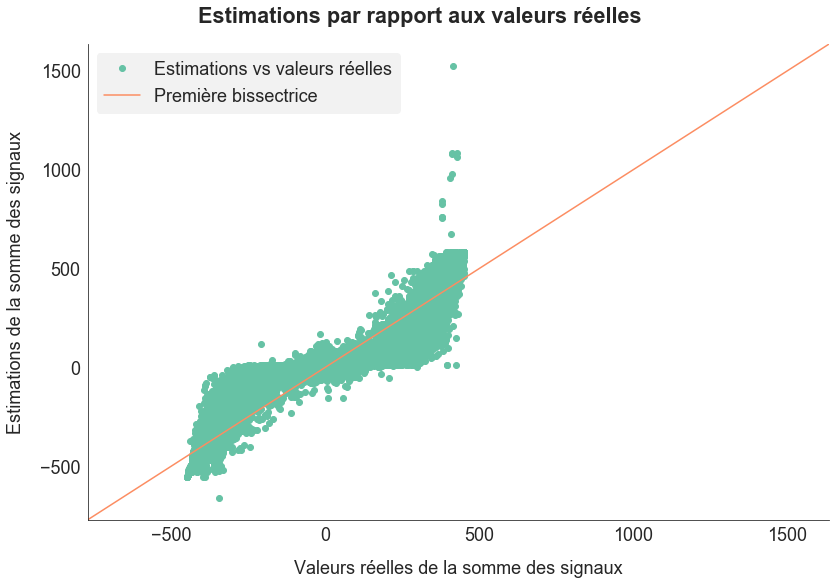

In [174]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [175]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [176]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [177]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (996 sur 71690)


observation_name    levier  outlier  cook_distance  influence
127                 127  0.000183     True       0.000060       True
139                 139  0.000332     True       0.000122       True
367                 369  0.000775     True       0.000090       True
503                 505  0.000405     True       0.000091       True
554                 556  0.002355     True       0.000876       True
664                 666  0.000342     True       0.000095       True
809                 812  0.000232     True       0.000108       True
816                 819  0.000241     True       0.000129       True
826                 829  0.001113     True       0.000114       True
931                 934  0.002551     True       0.000694       True
951                 954  0.000241     True       0.000135       True
1112               1115  0.000140     True       0.000093       True
1175               1178  0.000645     True       0.000069       True
1191               1194  0.000353     True       0.000184       True
1321               1324  0.001191     True       0.000153       True
1558               1561  0.000208     True       0.000092       True
1682               1685  0.000167     True       0.000068       True
1783               1788  0.000925     True       0.000247       True
2175               2180  0.000226     True       0.000134       True
2183               2188  0.000413     True       0.000149       True
2308               2313  0.000839     True       0.000065       True
2397               2402  0.001235     True       0.000607       True
2440               2445  0.000264     True       0.000071       True
2538               2543  0.000649     True       0.000412       True
2567               2572  0.000407     True       0.000134       True
2630               2635  0.000639     True       0.000208       True
2638               2643  0.002014     True       0.000695       True
2813               2818  0.000511     True       0.000062       True
2900               2905  0.000437     True       0.000271       True
2987               2992  0.002203     True       0.001336       True
...                 ...       ...      ...            ...        ...
69524             69719  0.000177     True       0.000071       True
69539             69734  0.000245     True       0.000074       True
69564             69759  0.000442     True       0.000094       True
69629             69824  0.000838     True       0.000227       True
69737             69932  0.000903     True       0.000368       True
69761             69956  0.000223     True       0.000096       True
69769             69964  0.000258     True       0.000078       True
69942             70138  0.015521     True       0.007880       True
70125             70321  0.001928     True       0.000467       True
70393             70590  0.000508     True       0.000170       True
70512             70709  0.000227     True       0.000082       True
70564             70761  0.000426     True       0.000207       True
70587             70784  0.001191     True       0.000134       True
70667             70864  0.000236     True       0.000082       True
70670             70867  0.000775     True       0.000152       True
70758             70956  0.000218     True       0.000102       True
70765             70963  0.000577     True       0.000117       True
70852             71050  0.000732     True       0.000068       True
70855             71053  0.000447     True       0.000129       True
70960             71159  0.000345     True       0.000193       True
71027             71226  0.000147     True       0.000071       True
71328             71529  0.000865     True       0.000155       True
71357             71558  0.001395     True       0.000163       True
71373             71574  0.000200     True       0.000057       True
71397             71598  0.000189     True       0.000063       True
71418             71619  0.000254     True       0.000067       True
71515

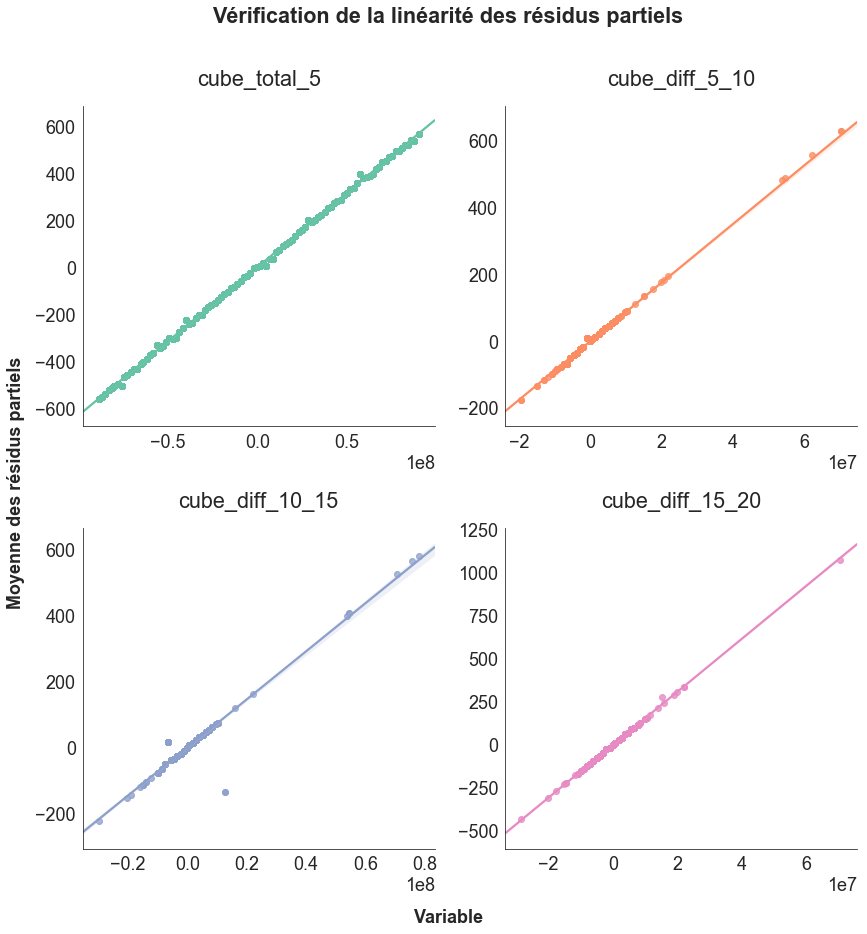

In [178]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=2, nbcol=2, is_mono=False)
cpt = 0
for variable in ["cube_total_5","cube_diff_5_10","cube_diff_10_15","cube_diff_15_20"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

J'ai un modèle satisfaisant, avec une bonne normalité et symétrie des résidus, qui explique 87% de la variance. Les autres hypothèses du modèle, comme la linéarité et l'homoscédasticité sont respectées.

Je tente de mixer le total 5 et le cube des différences.

In [228]:
anova = smf.ols(formula="somme_signaux ~ cube_total_5 + diff_5_10 + diff_10_15 + diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.277e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:38:00   Log-Likelihood:            -4.2798e+05
No. Observations:               71690   AIC:                         8.560e+05
Df Residuals:                   71685   BIC:                         8.560e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.9404      0.377     29.003      0.000      10.201      11.680
cube_total_5  6.216e-06   8.96e-09    694.055      0.000     6.2e-06    6.23e-06
diff_5_10        0.4239      0.014     30.228      0.000       0.396       0.451
diff_10_15       0.2190      0.016     14.037      0.000       0.188       0.250
diff_15_20       0.3367      0.014     23.844      0.000       0.309       0.364
==============================================================================
Omnibus:                     7144.427   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2074.699
Skew:                           0.002   Prob(JB):                         0.00
Kurtosis:                       2.167   Cond. No.                     4.54e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

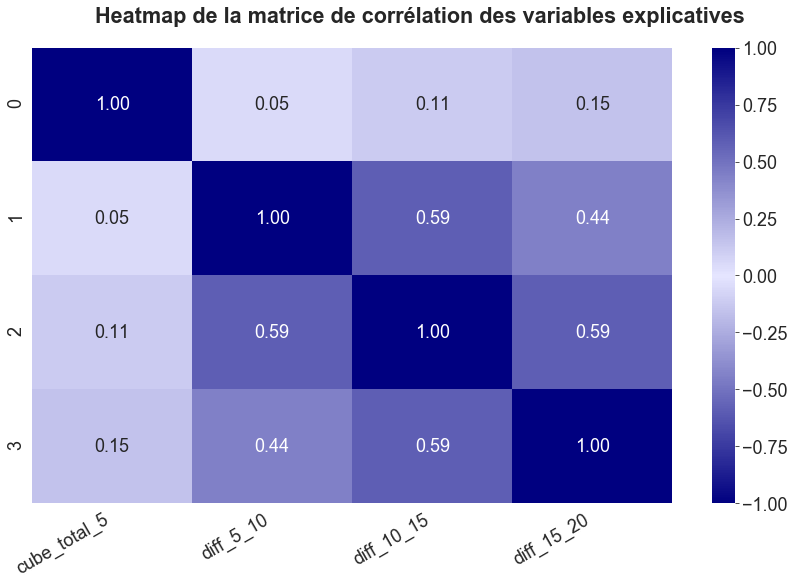

In [229]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
#mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [230]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
cube_total_5  1.024648
diff_5_10     1.577929
diff_10_15    1.943395
diff_15_20    1.582804

In [231]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df              F         PR(>F)  \
cube_total_5  4.321955e+09      1.0  481712.724950   0.000000e+00   
diff_5_10     8.197997e+06      1.0     913.725309  1.839748e-199   
diff_10_15    1.767919e+06      1.0     197.047243   1.055622e-44   
diff_15_20    5.100866e+06      1.0     568.527997  3.615859e-125   
Residual      6.431620e+08  71685.0            NaN            NaN   
total         4.980184e+09  71689.0            NaN            NaN   

              eta_squared  omega_squared  
cube_total_5     0.867830       0.867804  
diff_5_10        0.001646       0.001632  
diff_10_15       0.000355       0.000341  
diff_15_20       0.001024       0.001010  
Residual              NaN            NaN  
total                 NaN            NaN

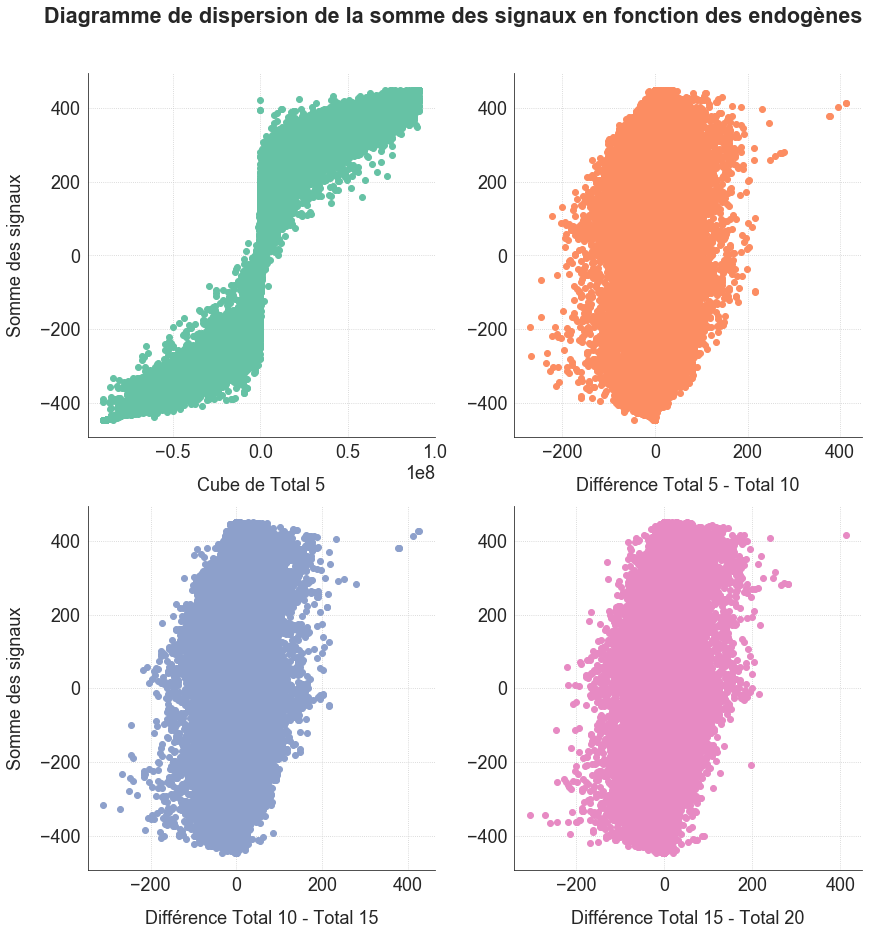

In [232]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[2], markerfacecolor=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[3], markerfacecolor=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=4)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
mygraph.set_axe('y', label="Somme des signaux", multi_index=3)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

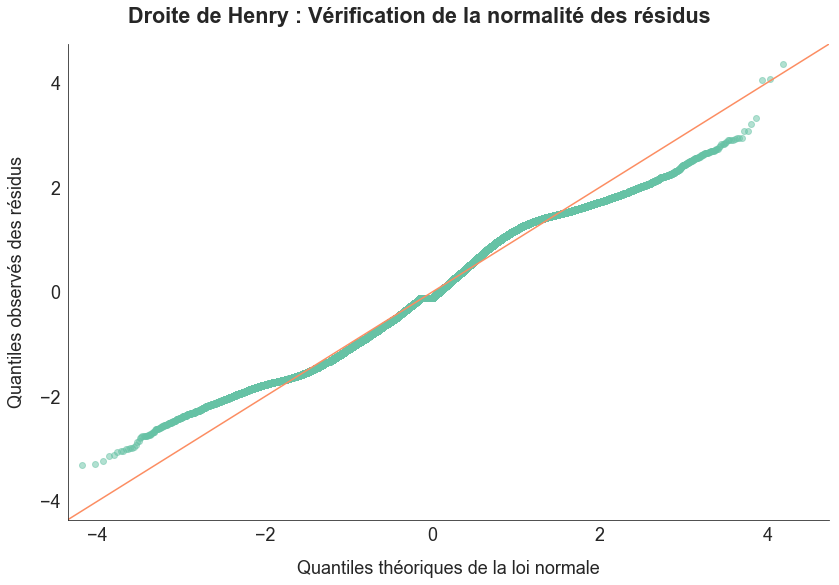

In [233]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

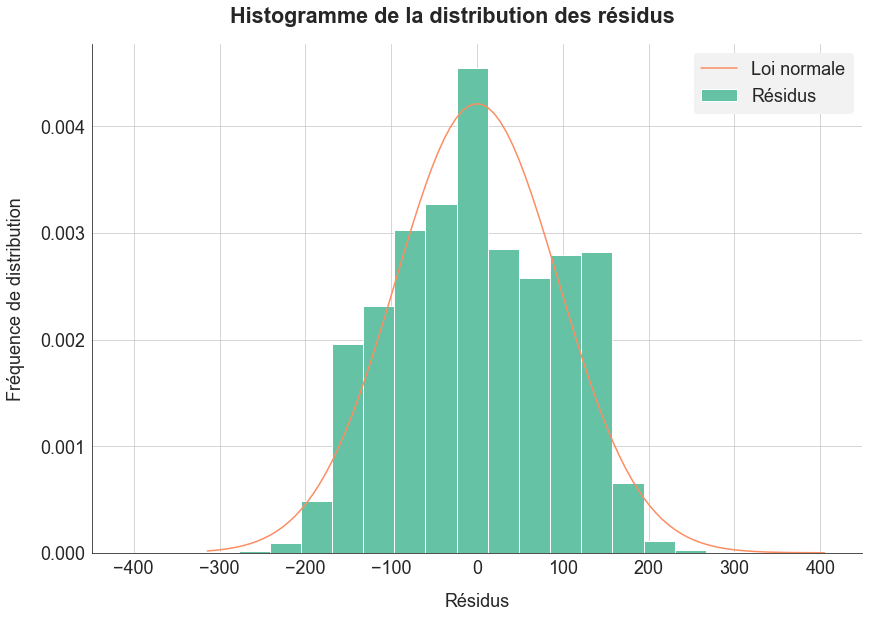

In [234]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_01_distribution_residus.png")
plt.show()

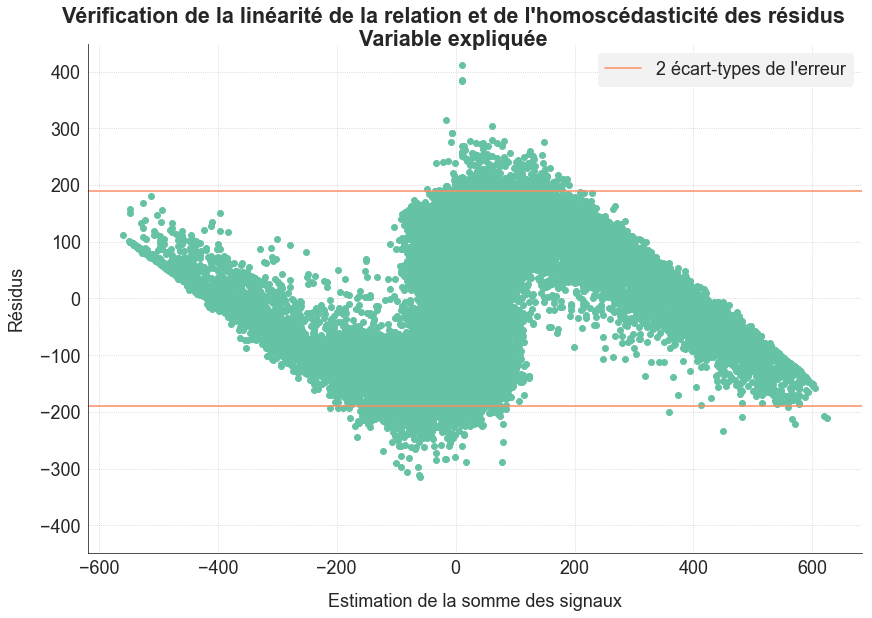

In [235]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

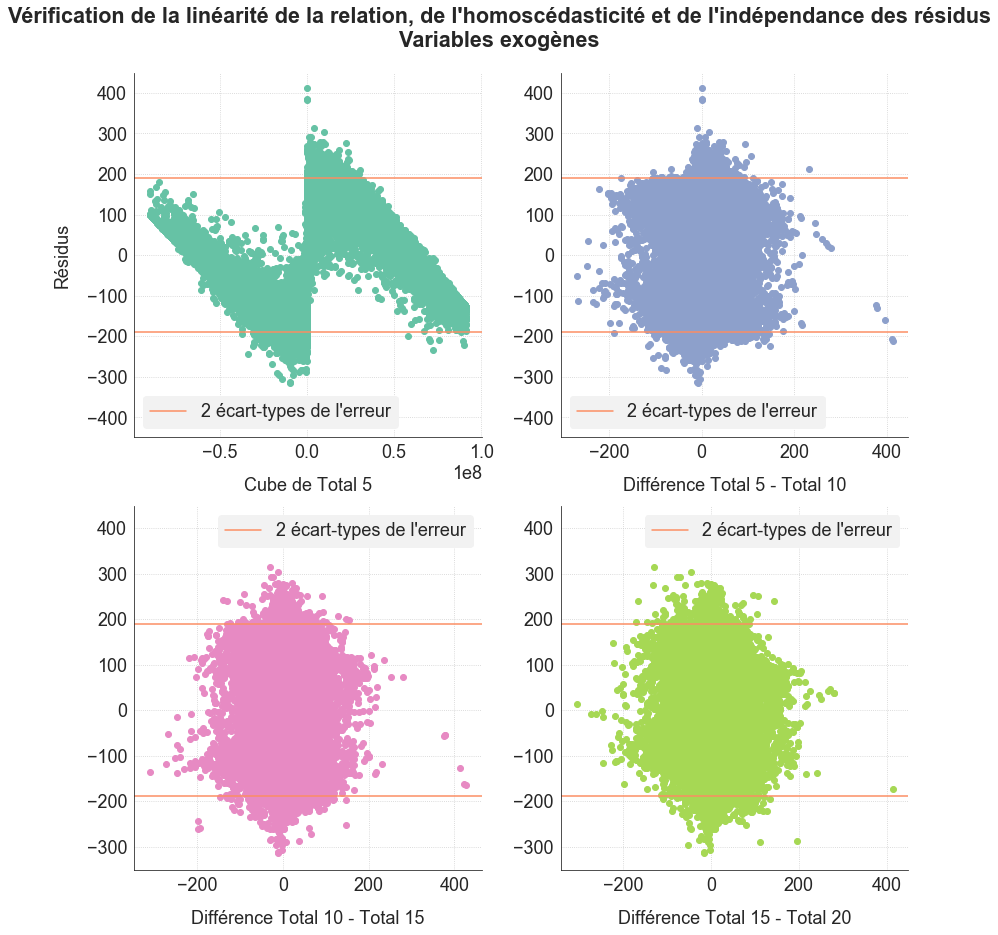

In [236]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["cube_total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[4], linestyle='', with_grid='both', grid_style=":", multi_index=4)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=4)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=4)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Cube de Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

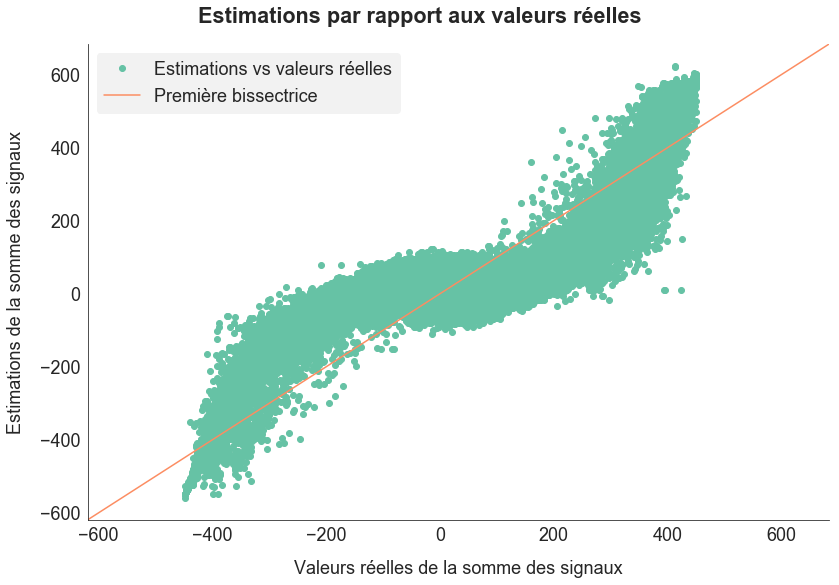

In [237]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [238]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [239]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [240]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (3094 sur 71690)


observation_name    levier  outlier  cook_distance  influence
21                   21  0.000226     True       0.000154       True
102                 102  0.000234     True       0.000061       True
111                 111  0.000226     True       0.000127       True
127                 127  0.000411     True       0.000234       True
134                 134  0.000315     True       0.000101       True
139                 139  0.000504     True       0.000106       True
149                 149  0.000195     True       0.000132       True
195                 195  0.000246     True       0.000108       True
223                 223  0.000423     True       0.000057       True
232                 232  0.000173     True       0.000057       True
254                 254  0.000252     True       0.000064       True
360                 362  0.000202     True       0.000111       True
364                 366  0.000248     True       0.000183       True
493                 495  0.000167     True       0.000093       True
498                 500  0.000236     True       0.000100       True
503                 505  0.000398     True       0.000076       True
524                 526  0.000340     True       0.000197       True
554                 556  0.000736     True       0.000163       True
595                 597  0.000229     True       0.000132       True
600                 602  0.000199     True       0.000076       True
607                 609  0.000222     True       0.000092       True
616                 618  0.000148     True       0.000097       True
621                 623  0.000168     True       0.000130       True
686                 688  0.000193     True       0.000162       True
720                 723  0.000164     True       0.000067       True
745                 748  0.000303     True       0.000084       True
746                 749  0.000206     True       0.000072       True
750                 753  0.000235     True       0.000142       True
783                 786  0.000358     True       0.000075       True
785                 788  0.000183     True       0.000063       True
...                 ...       ...      ...            ...        ...
71063             71262  0.000561     True       0.000066       True
71082             71281  0.000153     True       0.000069       True
71123             71322  0.000255     True       0.000071       True
71147             71347  0.001011     True       0.000132       True
71162             71362  0.000171     True       0.000057       True
71163             71363  0.000157     True       0.000061       True
71168             71368  0.000479     True       0.000095       True
71223             71423  0.000228     True       0.000184       True
71257             71458  0.000161     True       0.000112       True
71296             71497  0.000144     True       0.000123       True
71320             71521  0.000164     True       0.000124       True
71328             71529  0.000540     True       0.000107       True
71355             71556  0.000185     True       0.000074       True
71357             71558  0.000749     True       0.000137       True
71360             71561  0.000227     True       0.000086       True
71397             71598  0.000252     True       0.000146       True
71418             71619  0.000512     True       0.000095       True
71434             71635  0.000150     True       0.000082       True
71438             71639  0.000176     True       0.000081       True
71459             71660  0.000156     True       0.000104       True
71502             71703  0.000170     True       0.000057       True
71510             71711  0.000198     True       0.000083       True
71571             71773  0.000848     True       0.000101       True
71575             71777  0.000504     True       0.000259       True
71594             71796  0.000154     True       0.000132       True
71596             71798  0.000215     True       0.000090       True
71605

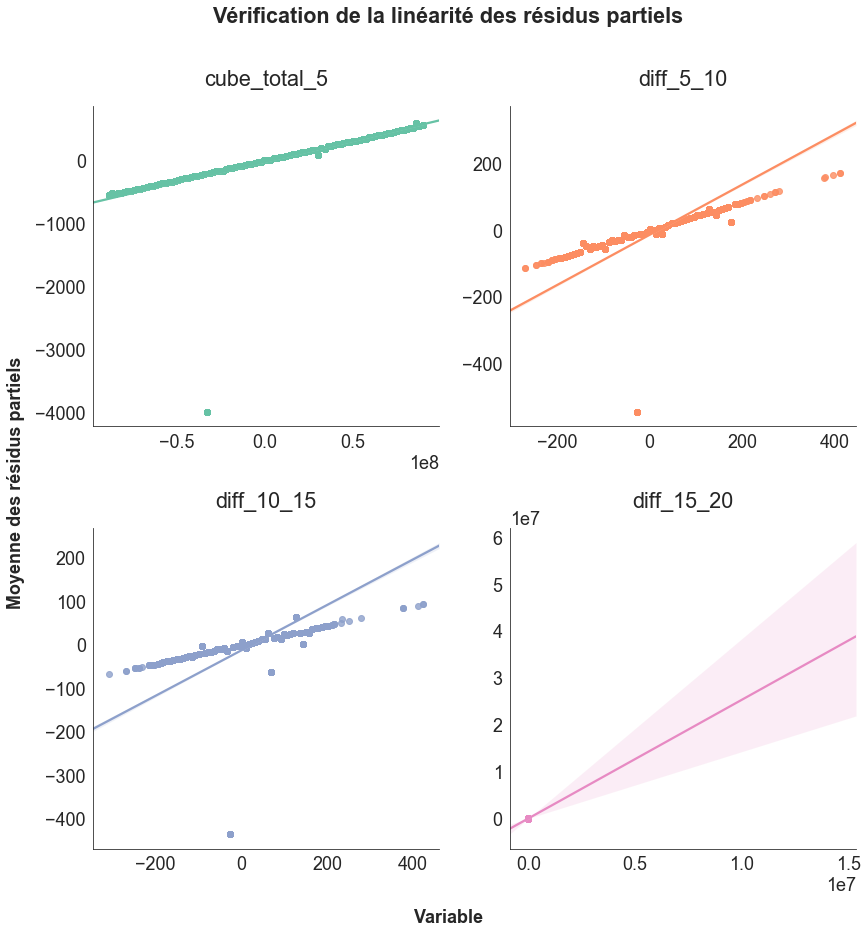

In [242]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=2, nbcol=2, is_mono=False)
cpt = 0
for variable in ["cube_total_5","diff_5_10","diff_10_15","diff_15_20"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

J'ai un modèle satisfaisant, avec une bonne normalité et symétrie des résidus, qui explique 87% de la variance. Les autres hypothèses du modèle, comme la linéarité et l'homoscédasticité sont respectées. Seul le nombre des observations atypiques et influentes augmente.

In [45]:
data_model = signed_data21[["diff_0_5","total_5","diff_5_10","diff_10_15","diff_15_20"]].copy()
len(data_model)

71690

In [46]:
data_model["cube_total_5"] = np.power(data_model.total_5, 3)
data_model["cube_diff_5_10"] = np.power(data_model.diff_5_10, 3)
data_model["cube_diff_10_15"] = np.power(data_model.diff_10_15, 3)
data_model["cube_diff_15_20"] = np.power(data_model.diff_15_20, 3)

In [26]:
anova = smf.ols(formula="diff_0_5 ~  total_5 + diff_5_10 + diff_10_15 + diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               diff_0_5   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 1.058e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:30:22   Log-Likelihood:            -3.3339e+05
No. Observations:               71690   AIC:                         6.668e+05
Df Residuals:                   71685   BIC:                         6.668e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1126      0.101     10.983      0.000       0.914       1.311
total_5       -0.0127      0.000    -35.556      0.000      -0.013      -0.012
diff_5_10      0.5072      0.004    135.300      0.000       0.500       0.515
diff_10_15     0.1496      0.004     35.855      0.000       0.141       0.158
diff_15_20     0.0107      0.004      2.839      0.005       0.003       0.018
==============================================================================
Omnibus:                    15017.273   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           613423.394
Skew:                           0.026   Prob(JB):                         0.00
Kurtosis:                      17.330   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

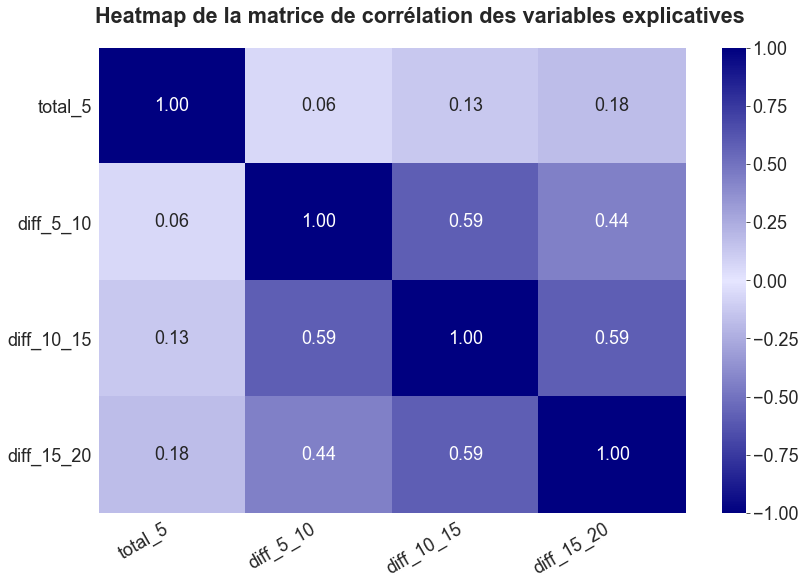

In [28]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [29]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


VIF
total_5     1.035172
diff_5_10   1.578594
diff_10_15  1.943961
diff_15_20  1.592137

In [30]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

sum_sq       df             F         PR(>F)  eta_squared  \
total_5     8.104354e+05      1.0   1264.249687  1.655269e-274     0.013660   
diff_5_10   1.173487e+07      1.0  18305.964169   0.000000e+00     0.197798   
diff_10_15  8.241127e+05      1.0   1285.585747  4.604645e-279     0.013891   
diff_15_20  5.165842e+03      1.0      8.058526   4.530275e-03     0.000087   
Residual    4.595300e+07  71685.0           NaN            NaN          NaN   
total       5.932758e+07  71689.0           NaN            NaN          NaN   

            omega_squared  
total_5          0.013646  
diff_5_10        0.197781  
diff_10_15       0.013877  
diff_15_20       0.000073  
Residual              NaN  
total                 NaN

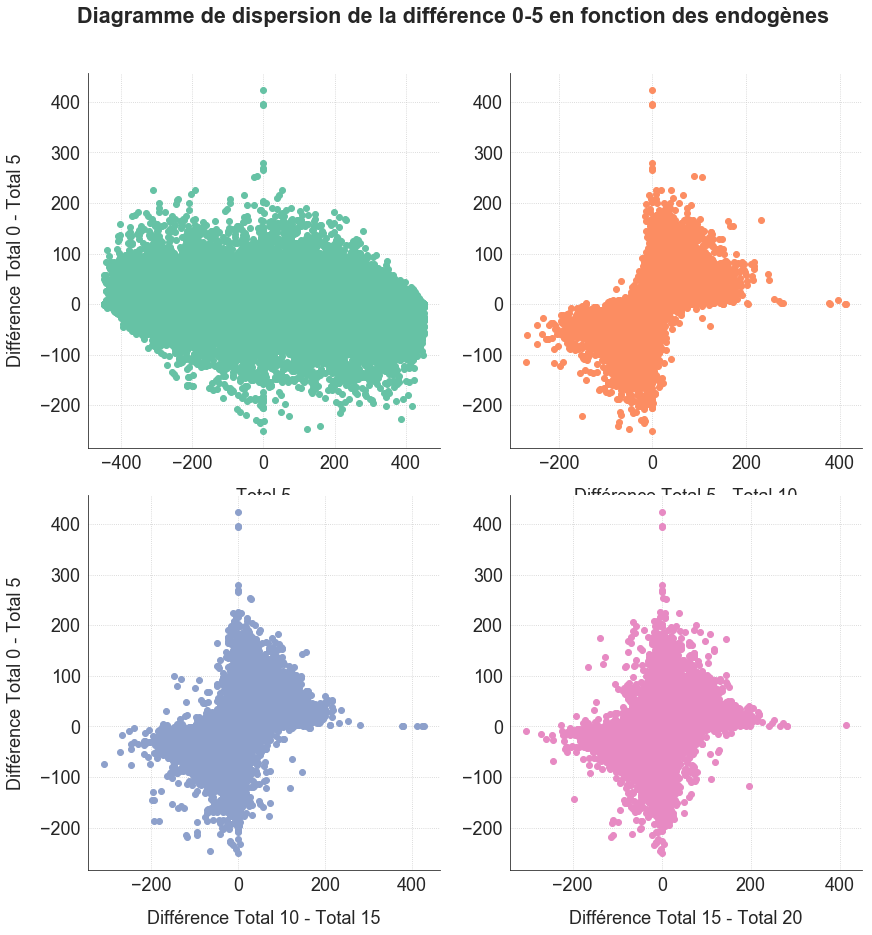

In [44]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la différence 0-5 en fonction des endogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], data_model.diff_0_5, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], data_model.diff_0_5, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], data_model.diff_0_5, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[2], markerfacecolor=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], data_model.diff_0_5, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[3], markerfacecolor=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=4)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Différence Total 0 - Total 5", multi_index=1)
mygraph.set_axe('y', label="Différence Total 0 - Total 5", multi_index=3)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

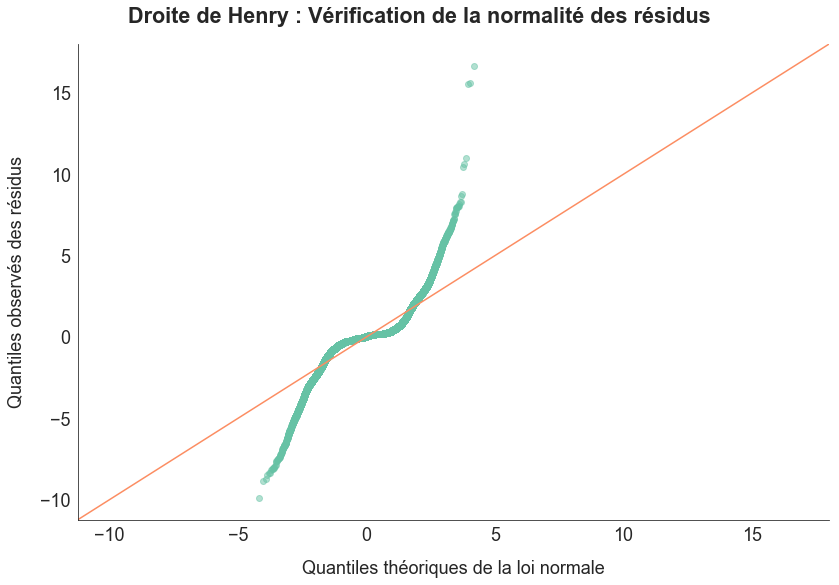

In [33]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

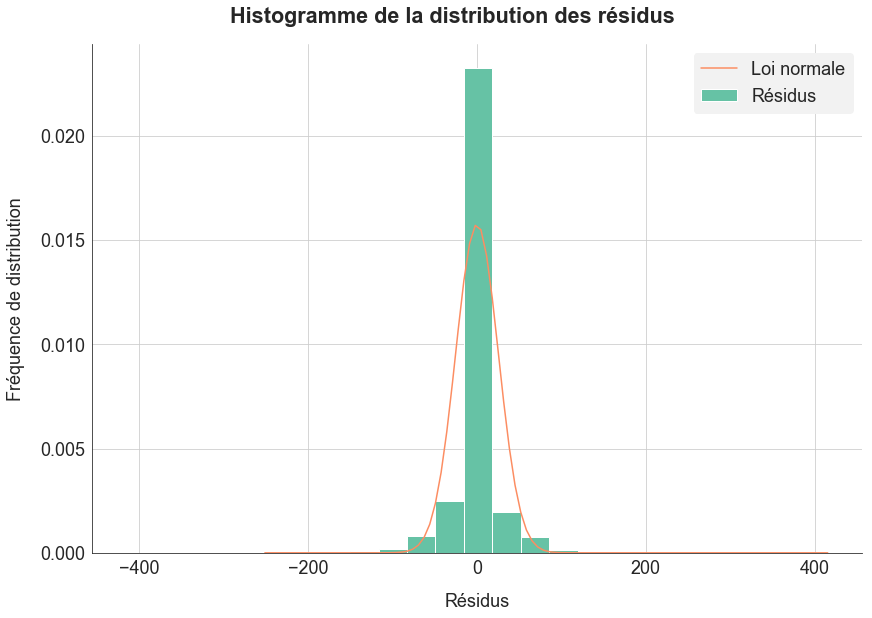

In [34]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_01_distribution_residus.png")
plt.show()

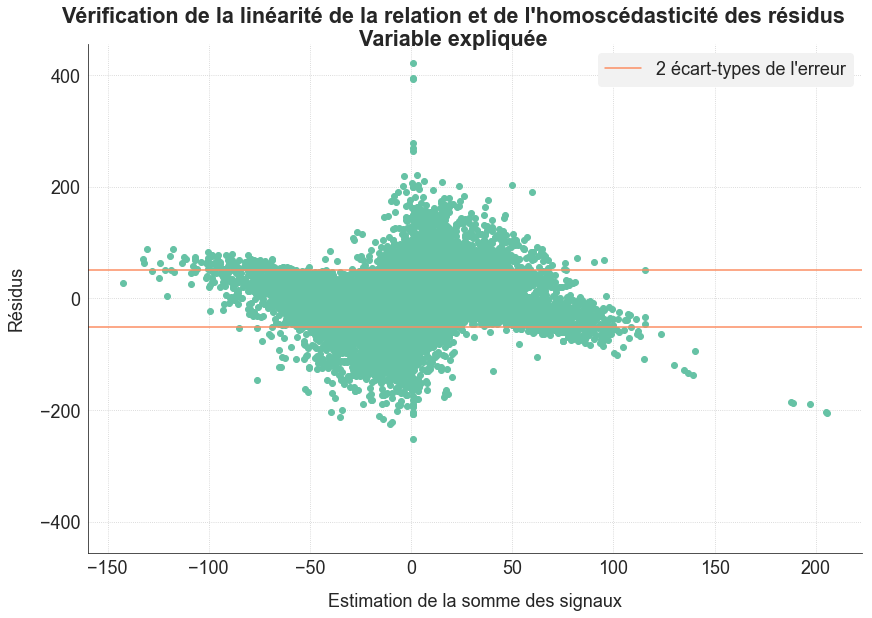

In [35]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

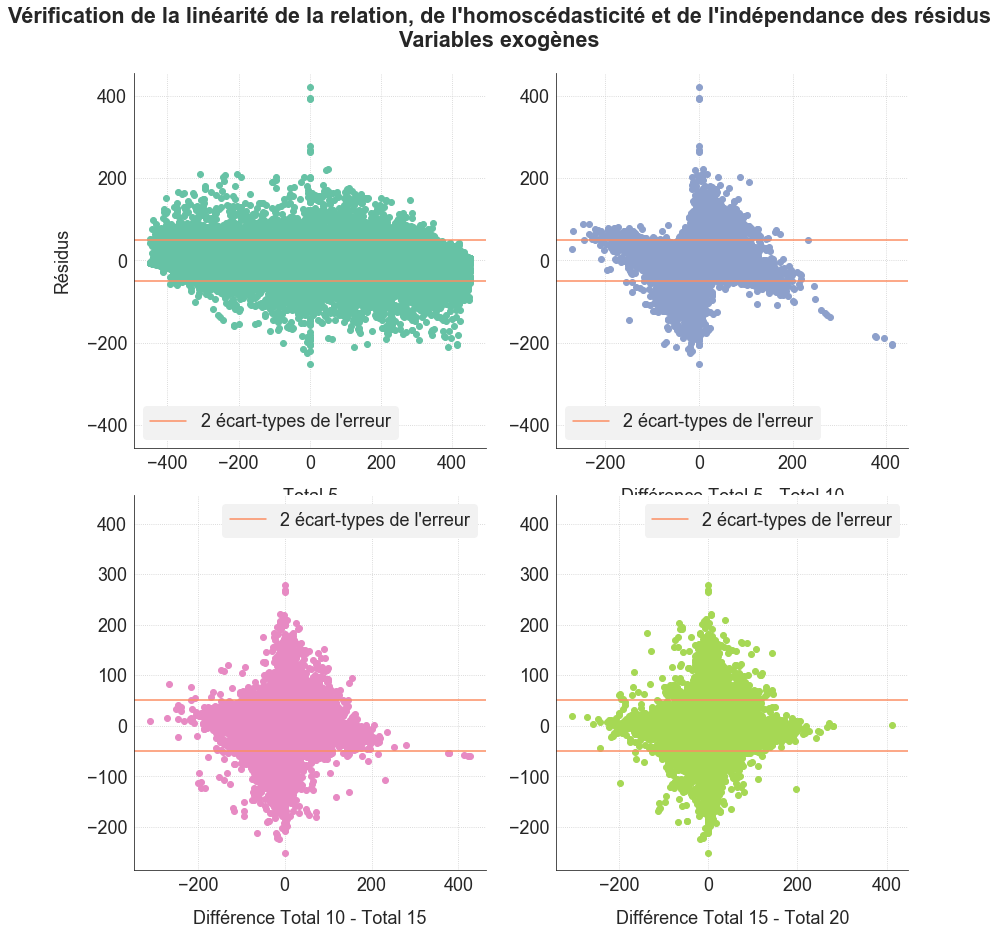

In [36]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[4], linestyle='', with_grid='both', grid_style=":", multi_index=4)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=4)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=4)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

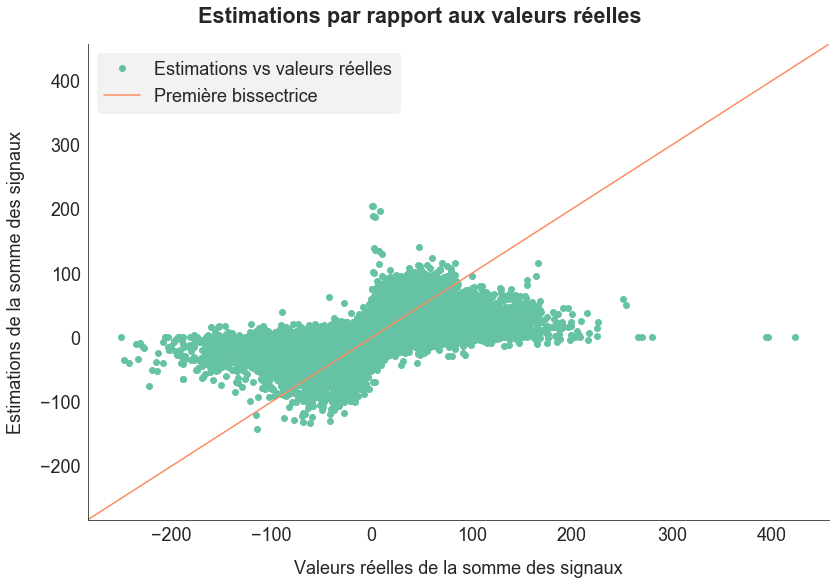

In [38]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.diff_0_5, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [39]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [40]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

In [41]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (2175 sur 71690)


observation_name    levier  outlier  cook_distance  influence
21                   21  0.000229     True       0.000061       True
41                   41  0.000295     True       0.000078       True
51                   51  0.000246     True       0.000070       True
84                   84  0.000242     True       0.000121       True
127                 127  0.000413     True       0.000130       True
139                 139  0.000502     True       0.003342       True
195                 195  0.000268     True       0.000093       True
223                 223  0.000425     True       0.000383       True
280                 281  0.000143     True       0.000136       True
289                 290  0.000578     True       0.002177       True
300                 301  0.000231     True       0.000101       True
360                 362  0.000200     True       0.000185       True
393                 395  0.000153     True       0.000324       True
396                 398  0.000237     True       0.000130       True
413                 415  0.000155     True       0.000508       True
488                 490  0.000351     True       0.000334       True
524                 526  0.000340     True       0.000214       True
576                 578  0.000397     True       0.000311       True
595                 597  0.000225     True       0.000195       True
660                 662  0.000267     True       0.000073       True
690                 692  0.000315     True       0.000107       True
745                 748  0.000315     True       0.000099       True
783                 786  0.000367     True       0.000211       True
785                 788  0.000195     True       0.000123       True
806                 809  0.000153     True       0.000106       True
809                 812  0.000348     True       0.000319       True
816                 819  0.000397     True       0.000103       True
846                 849  0.000271     True       0.000065       True
989                 992  0.000197     True       0.000118       True
1112               1115  0.000334     True       0.000090       True
...                 ...       ...      ...            ...        ...
70720             70918  0.000156     True       0.000085       True
70733             70931  0.000192     True       0.000091       True
70736             70934  0.000407     True       0.000067       True
70765             70963  0.000840     True       0.000297       True
70855             71053  0.000611     True       0.000114       True
70862             71060  0.000206     True       0.000063       True
70868             71066  0.000329     True       0.000571       True
70897             71095  0.000165     True       0.000107       True
70961             71160  0.000174     True       0.000084       True
70986             71185  0.000202     True       0.000062       True
71014             71213  0.000163     True       0.000096       True
71060             71259  0.000236     True       0.000144       True
71063             71262  0.000559     True       0.000074       True
71066             71265  0.000185     True       0.001318       True
71084             71283  0.000157     True       0.000139       True
71168             71368  0.000486     True       0.000418       True
71223             71423  0.000242     True       0.000086       True
71257             71458  0.000161     True       0.000078       True
71357             71558  0.000751     True       0.000093       True
71502             71703  0.000180     True       0.000131       True
71515             71716  0.000345     True       0.000163       True
71539             71741  0.000244     True       0.000198       True
71554             71756  0.000147     True       0.000109       True
71560             71762  0.000427     True       0.000086       True
71571             71773  0.000850     True       0.000101       True
71594             71796  0.000160     True       0.000091       True
71615

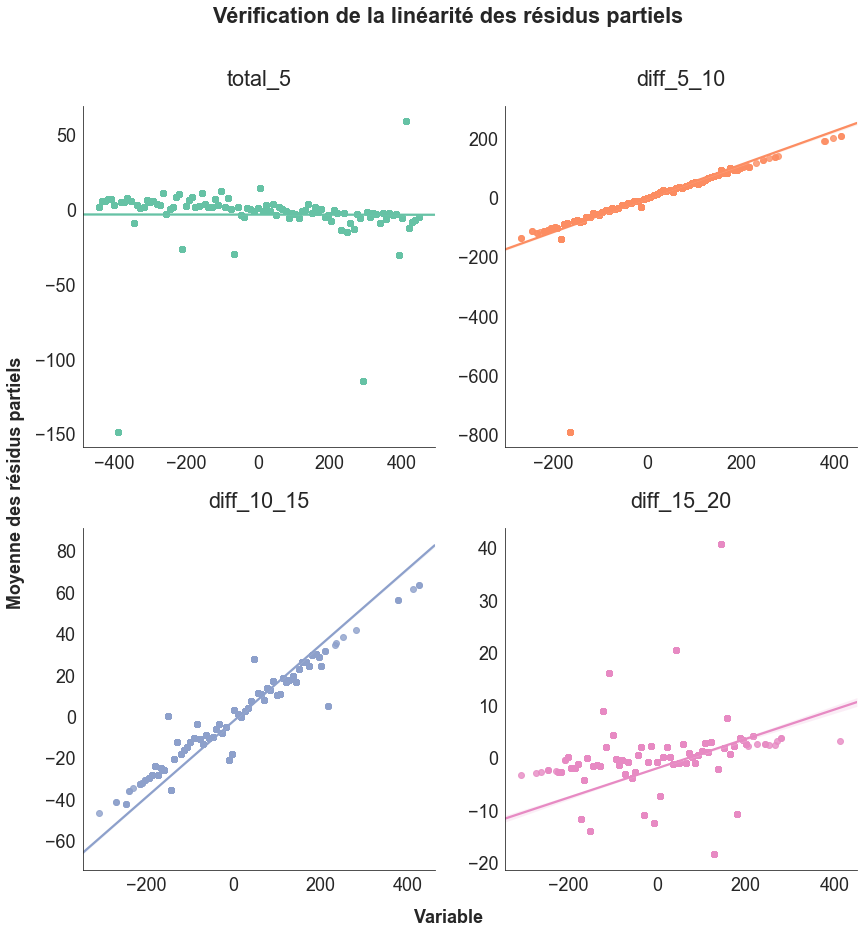

In [43]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=2, nbcol=2, is_mono=False)
cpt = 0
for variable in ["total_5","diff_5_10","diff_10_15","diff_15_20"]:
    residus_partiels = ((data_model.diff_0_5 - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()